In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
import yfinance as yf

aapl = yf.Ticker("AAPL")
market_cap = aapl.info['marketCap']

In [3]:
market_cap

3829859352576

In [4]:
import yfinance as yf

# Lista de algunos tickers del S&P 500 (puedes ampliarla con todos los componentes)
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA']

# Diccionario para guardar capitalizaciones
market_caps = {}

# Obtener capitalización de cada empresa
for ticker in tickers:
    info = yf.Ticker(ticker).info
    market_caps[ticker] = info['marketCap']

# Calcular capitalización total del índice
total_market_cap = sum(market_caps.values())
tot=0
# Calcular y mostrar el peso de cada empresa
print("Pesos dentro del índice:")
for ticker, cap in market_caps.items():
    weight = cap / total_market_cap
    tot+=weight
    print(f"{ticker}: {weight:.4%}")
print(f"Total: {tot:.4%}")

Pesos dentro del índice:
AAPL: 21.6659%
MSFT: 22.0705%
GOOGL: 16.8179%
AMZN: 13.5091%
NVDA: 25.9366%
Total: 100.0000%


In [5]:
stock = yf.Ticker("AAPL")
info = stock.info

print("Nombre:", info['longName'])
print("Sector:", info['sector'])
print("P/E:", info['trailingPE'])
print("ROE:", info['returnOnEquity'])
print("Dividend Yield:", info['dividendYield'])
print("Crecimiento EPS:", info['earningsGrowth'])


Nombre: Apple Inc.
Sector: Technology
P/E: 39.151745
ROE: 1.49814
Dividend Yield: 0.41
Crecimiento EPS: 0.121


[*********************100%***********************]  5 of 5 completed


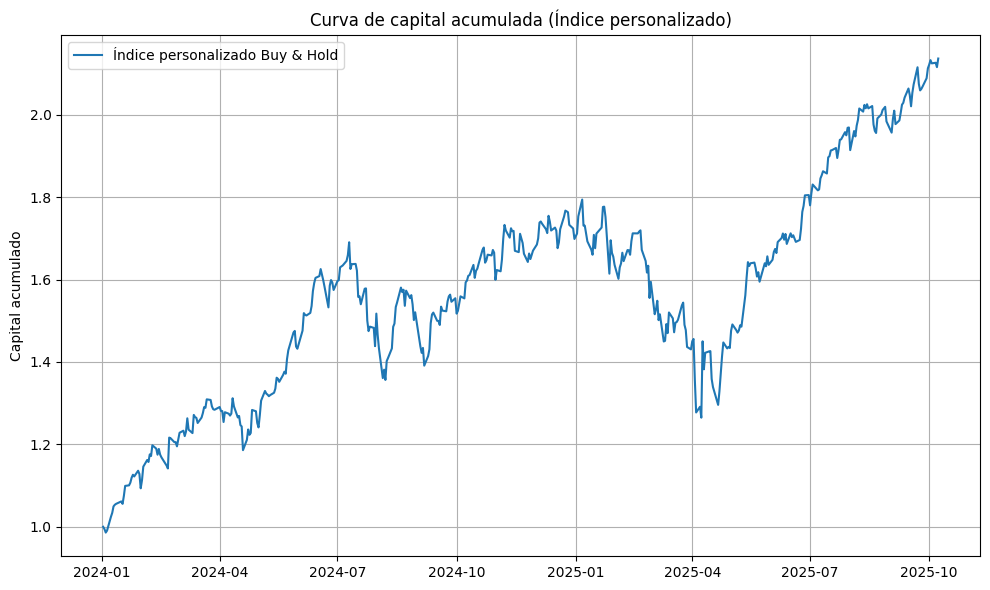

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Tickers seleccionados
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA']

# Paso 2: Obtener capitalizaciones y calcular pesos
market_caps = {}
for ticker in tickers:
    info = yf.Ticker(ticker).info
    market_caps[ticker] = info['marketCap']

total_market_cap = sum(market_caps.values())
weights = {ticker: cap / total_market_cap for ticker, cap in market_caps.items()}

# Paso 3: Descargar precios históricos
data = yf.download(tickers, start="2024-01-01", auto_adjust=True)['Close']

# Paso 4: Normalizar precios (todos empiezan en 1)
normalized = data / data.iloc[0]

# Paso 5: Aplicar pesos y sumar para formar el índice
custom_index = pd.Series(0, index=normalized.index)
for ticker in tickers:
    custom_index += normalized[ticker] * weights[ticker]

# Paso 6: Graficar curva Buy & Hold personalizada
plt.figure(figsize=(10,6))
plt.plot(custom_index, label='Índice personalizado Buy & Hold')
plt.title('Curva de capital acumulada (Índice personalizado)')
plt.ylabel('Capital acumulado')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

[*********************100%***********************]  6 of 6 completed


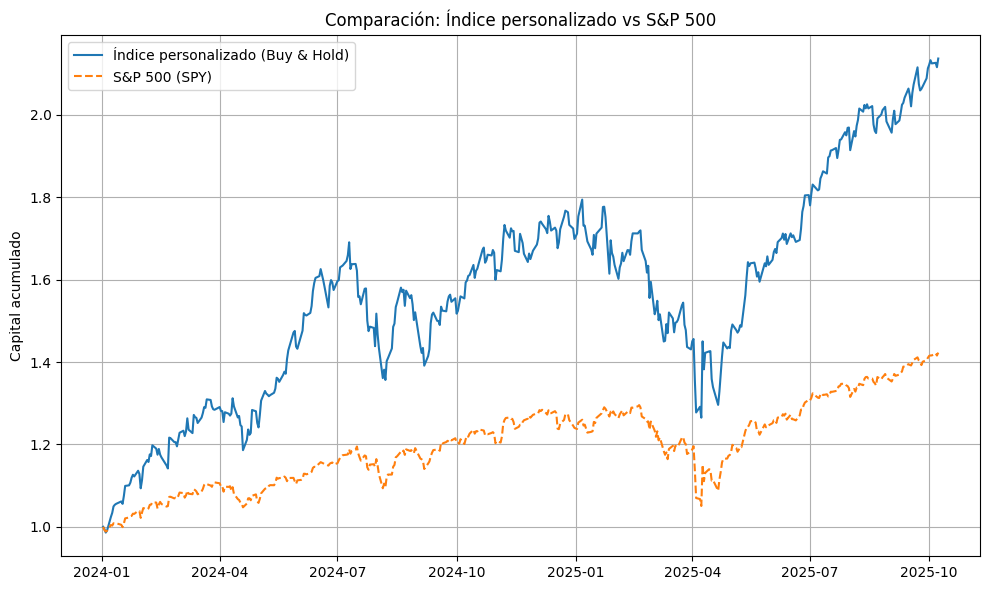

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Tickers seleccionados
#tickers = ['ROP','D']
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA']
# Obtener capitalizaciones y calcular pesos
market_caps = {}
for ticker in tickers:
    info = yf.Ticker(ticker).info
    market_caps[ticker] = info['marketCap']

total_market_cap = sum(market_caps.values())
weights = {ticker: cap / total_market_cap for ticker, cap in market_caps.items()}

# Descargar precios históricos
data = yf.download(tickers + ['^GSPC'], start="2024-01-01", auto_adjust=True)['Close']

# Normalizar precios (todos empiezan en 1)
normalized = data / data.iloc[0]

# Construir índice personalizado
custom_index = pd.Series(0, index=normalized.index)
for ticker in tickers:
    custom_index += normalized[ticker] * weights[ticker]

# Normalizar SPY para comparación
spy_curve = normalized['^GSPC']

# Graficar ambas curvas
plt.figure(figsize=(10,6))
plt.plot(custom_index, label='Índice personalizado (Buy & Hold)')
plt.plot(spy_curve, label='S&P 500 (SPY)', linestyle='--')
plt.title('Comparación: Índice personalizado vs S&P 500')
plt.ylabel('Capital acumulado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Pesos iguales:
AAPL: 20.00%
MSFT: 20.00%
GOOGL: 20.00%
AMZN: 20.00%
NVDA: 20.00%


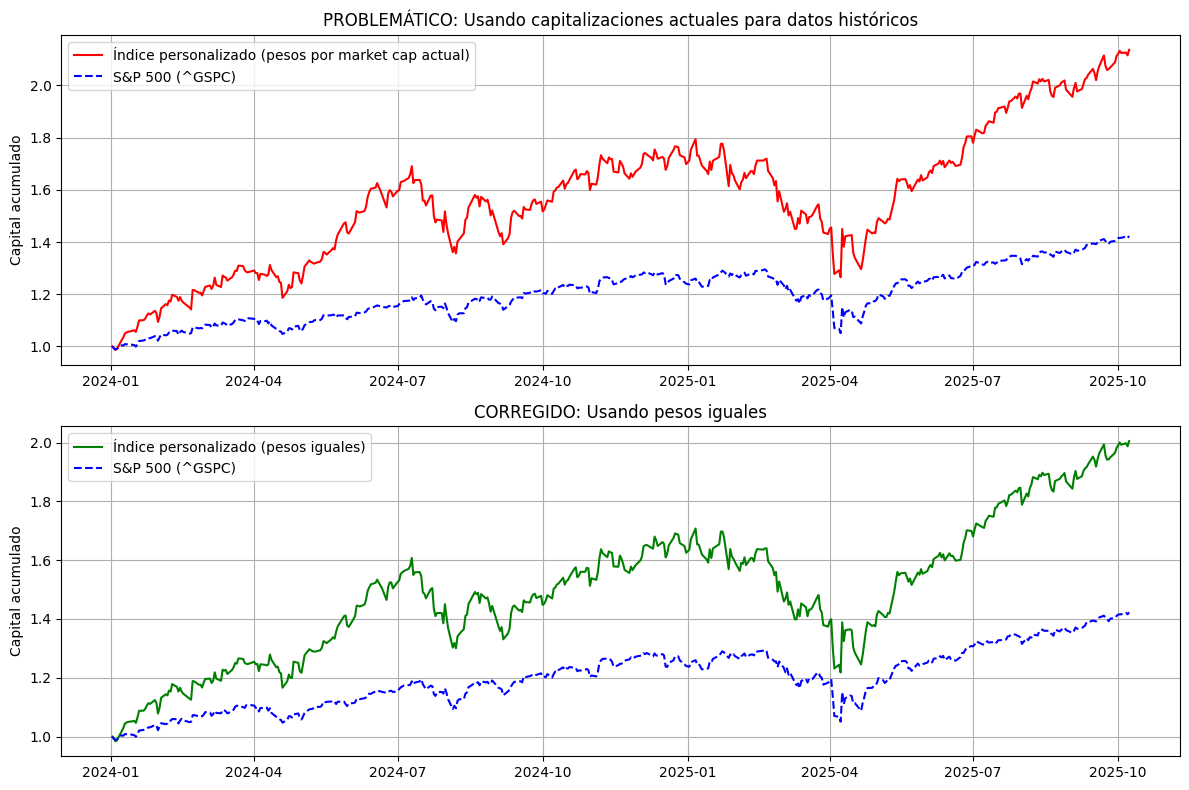


Retorno total S&P 500: 42.3%
Retorno con pesos por cap actual: 113.7%
Retorno con pesos iguales: 100.5%


In [8]:
# VERSIÓN CORREGIDA 1: Pesos iguales (elimina sesgo de capitalización)
# =================================================================

# Usar pesos iguales en lugar de por capitalización actual
equal_weights = {ticker: 1/len(tickers) for ticker in tickers}

print("Pesos iguales:")
for ticker, weight in equal_weights.items():
    print(f"{ticker}: {weight:.2%}")

# Construir índice con pesos iguales
custom_index_equal = pd.Series(0, index=normalized.index)
for ticker in tickers:
    custom_index_equal += normalized[ticker] * equal_weights[ticker]

# Graficar comparación
plt.figure(figsize=(12,8))

# Primer subplot: Pesos por capitalización (problemático)
plt.subplot(2,1,1)
plt.plot(custom_index, label='Índice personalizado (pesos por market cap actual)', color='red')
plt.plot(spy_curve, label='S&P 500 (^GSPC)', linestyle='--', color='blue')
plt.title('PROBLEMÁTICO: Usando capitalizaciones actuales para datos históricos')
plt.ylabel('Capital acumulado')
plt.legend()
plt.grid(True)

# Segundo subplot: Pesos iguales (más realista)
plt.subplot(2,1,2)
plt.plot(custom_index_equal, label='Índice personalizado (pesos iguales)', color='green')
plt.plot(spy_curve, label='S&P 500 (^GSPC)', linestyle='--', color='blue')
plt.title('CORREGIDO: Usando pesos iguales')
plt.ylabel('Capital acumulado')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Comparar retornos finales
print(f"\nRetorno total S&P 500: {spy_curve.iloc[-1]-1:.1%}")
print(f"Retorno con pesos por cap actual: {custom_index.iloc[-1]-1:.1%}")
print(f"Retorno con pesos iguales: {custom_index_equal.iloc[-1]-1:.1%}")

# Fuerte

In [9]:
# URL de la lista del S&P 500
url = "https://www.slickcharts.com/sp500"


# Hacer la petición con headers para evitar bloqueos
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
}
response = requests.get(url, headers=headers)
response.raise_for_status()  # Raise exception for bad status codes

# Parsear el HTML
soup = BeautifulSoup(response.text, 'html.parser')

# Encontrar la tabla
table = soup.find('table')

if table:
    # Leer la tabla con pandas
    df = pd.read_html(str(table))[0]
    
    # Extraer los tickers
    if 'Symbol' in df.columns:
        tickers = df['Symbol'].tolist()
        print(f"Found {len(tickers)} tickers")
        print("First 10 tickers:", tickers[:10])
    else:
        print("Available columns:", df.columns.tolist())

    # Extraer los pesos
    if 'Weight' in df.columns:
        weights = df['Weight'].tolist()
        print(f"Found {len(weights)} weights")
        print("First 10 weights:", weights[:10])
    else:
        print("Available columns:", df.columns.tolist())
else:
    print("No table found on the page")

# En la lista de ticker, reemplazar los "." por "-"
tickers = [ticker.replace('.', '-') for ticker in tickers]
print("Tickers after replacement:", tickers[:10])

Found 503 tickers
First 10 tickers: ['NVDA', 'MSFT', 'AAPL', 'AMZN', 'META', 'AVGO', 'GOOGL', 'TSLA', 'GOOG', 'BRK.B']
Found 503 weights
First 10 weights: ['7.51%', '6.39%', '6.27%', '3.91%', '2.95%', '2.64%', '2.51%', '2.36%', '2.36%', '1.78%']
Tickers after replacement: ['NVDA', 'MSFT', 'AAPL', 'AMZN', 'META', 'AVGO', 'GOOGL', 'TSLA', 'GOOG', 'BRK-B']


C:\Users\a01286222\AppData\Local\Temp\ipykernel_35304\2475046699.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [10]:
# -----------------------------
# 1. Parámetros de simulación
# -----------------------------
NUM_COMBINATIONS = 100       # Número de combinaciones a probar
NUM_TICKERS_PER_INDEX = 10  # Número de acciones por índice
START_DATE = "2025-01-01"

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt



# -----------------------------
# 2. Universo de acciones (puedes ampliarlo)
# -----------------------------
'''tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'AVGO', 'LLY', 'NFLX',
           'ADBE', 'CRM', 'INTC', 'QCOM', 'TXN', 'AMD', 'COST', 'PEP', 'KO', 'WMT',
           'UNH', 'JNJ', 'PFE', 'TMO', 'ABBV', 'XOM', 'CVX', 'COP', 'SLB', 'EOG']'''

'''tickers= ["MA","NFLX","XOM","JNJ","PLTR","COST","HD","ABBV","BAC","PG","CVX","UNH","GE",
          "KO","WFC","TMUS","CSCO","AMD","IBM","MS","PM","GS","APP","AXP","CRM","ABT",
          "LIN","CAT","RTX","MCD","UBER","DIS","T","MRK","NOW","INTU","PEP","C","MU","VZ",
          "BLK","ANET","QCOM","TMO","BKNG","SCHW","TXN"]'''

'''tickers= ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'AVGO', 'LLY',"GOOG","BRK-B",
          "ADBE", "CRM", "INTC", "WMT","JPM", "V","WMT","ORCL",
          "JNJ", "PFE", "COP", "SLB", "EOG",
          "MA","NFLX","XOM","PLTR","COST","HD","ABBV","BAC","PG","CVX","UNH","GE",
          "KO","WFC","TMUS","CSCO","AMD","IBM","MS","PM","GS","APP","AXP","CRM","ABT",
          "LIN","CAT","RTX","MCD","UBER","DIS","T","MRK","NOW","INTU","PEP","C","MU","VZ",
          "BLK","ANET","QCOM","TMO","BKNG","SCHW","TXN","LRCX","BA","GE","V","AMAT","INTC",
          "TJX","ISRG","NEE","ACN","ADBE","SPGI","APH","AMGN","BSX","PGR","ETN","COF","LOW",
          "SYK","UNP","GILD","KLAC","BX","PANW","PFE","DHR","HON","DE","CRWD","HOOD","MDT","KKR",
          "COP","ADI","WELL","ADP","DASH","CMCSA","LMT","MO","CB","PLD","CEG","SO","NKE","VRTX",
          "MMC","CME","SBUX","HCA","ICE","CVS","DUK","PH","CDNS","MCK","NEM","TT"]'''#primeros 120 de s&p500 por market cap
# -----------------------------
# 3. Descargar precios históricos
# -----------------------------
data = yf.download(tickers, start=START_DATE, auto_adjust=True)['Close']
data = data.dropna(axis=1)  # eliminar columnas con datos faltantes


# -----------------------------
# 4. Función para calcular métricas
# -----------------------------
def calculate_metrics(curve, risk_free_rate=0.01):
    returns = curve.pct_change().dropna()
    years = (curve.index[-1] - curve.index[0]).days / 365.25
    cagr = (curve.iloc[-1] / curve.iloc[0]) ** (1 / years) - 1
    volatility = returns.std() * np.sqrt(252)
    sharpe = (cagr - risk_free_rate) / volatility if volatility != 0 else np.nan
    rolling_max = curve.cummax()
    drawdown = curve / rolling_max - 1
    max_dd = drawdown.min()
    return cagr, volatility, sharpe, max_dd

[*********************100%***********************]  503 of 503 completed


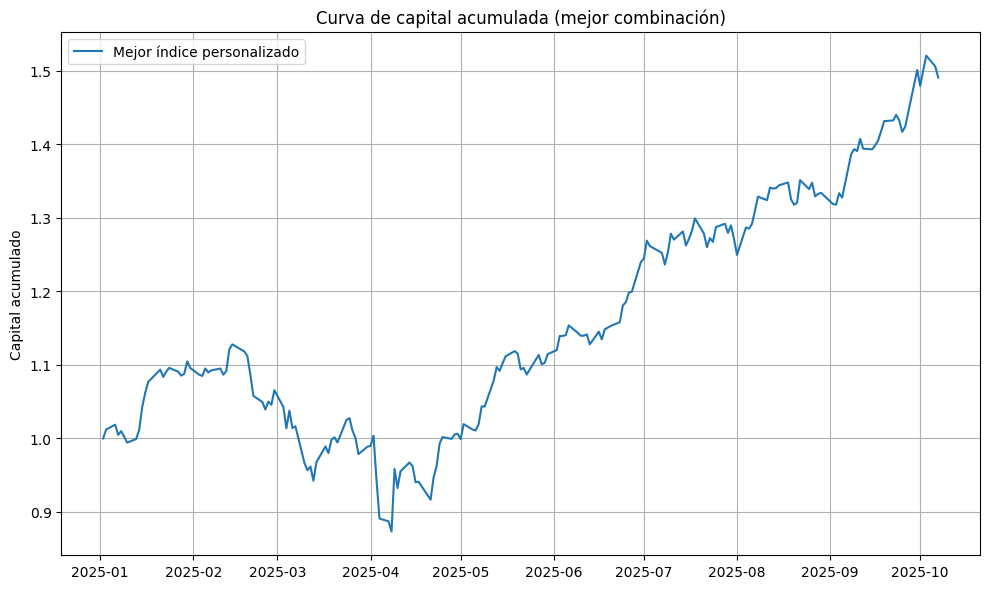


📈 Mejor combinación de acciones:
LMT, HOOD, EL, KEYS, MS, F, MMC, LOW, EW, IVZ

📊 Métricas:
CAGR: 68.98%
Volatilidad: 26.94%
Sharpe Ratio: 2.52
Max Drawdown: -22.57%


In [16]:




# -----------------------------
# 5. Simulación de combinaciones
# -----------------------------
results = []

for i in range(NUM_COMBINATIONS):
    subset = random.sample(list(data.columns), NUM_TICKERS_PER_INDEX)

    # Obtener capitalizaciones y calcular pesos
    market_caps = {}
    for ticker in subset:
        try:
            info = yf.Ticker(ticker).info
            market_caps[ticker] = info['marketCap']
        except:
            market_caps[ticker] = 1  # fallback si falla

    total_cap = sum(market_caps.values())
    weights = {ticker: market_caps[ticker] / total_cap for ticker in subset}

    # Normalizar precios
    normalized = data[subset] / data[subset].iloc[0]

    # Construir índice personalizado
    index_curve = sum(normalized[t] * weights[t] for t in subset)

    # Calcular métricas
    cagr, vol, sharpe, dd = calculate_metrics(index_curve)
    results.append({
        'tickers': subset,
        'weights': weights,
        'curve': index_curve,
        'CAGR': cagr,
        'Volatility': vol,
        'Sharpe': sharpe,
        'Drawdown': dd
    })

# -----------------------------
# 6. Seleccionar el mejor índice
# -----------------------------
best = max(results, key=lambda x: x['Sharpe'])

# -----------------------------
# 7. Graficar el mejor índice
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(best['curve'], label='Mejor índice personalizado')
plt.title('Curva de capital acumulada (mejor combinación)')
plt.ylabel('Capital acumulado')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# 8. Mostrar métricas
# -----------------------------
print("\n📈 Mejor combinación de acciones:")
print(", ".join(best['tickers']))
print("\n📊 Métricas:")
print(f"CAGR: {best['CAGR']:.2%}")
print(f"Volatilidad: {best['Volatility']:.2%}")
print(f"Sharpe Ratio: {best['Sharpe']:.2f}")
print(f"Max Drawdown: {best['Drawdown']:.2%}")

In [17]:
Mags = yf.download('MAGS', start=START_DATE, auto_adjust=True)['Close']
SPY = yf.download('SPY', start=START_DATE, auto_adjust=True)['Close']
Nasdaq = yf.download('^IXIC', start=START_DATE, auto_adjust=True)['Close']
Mags_curve = Mags / Mags.iloc[0]
SPY_curve = SPY / SPY.iloc[0]
Nasdaq_curve = Nasdaq / Nasdaq.iloc[0]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [18]:
top10 = sorted(results, key=lambda x: x['Sharpe'], reverse=True)[:10]



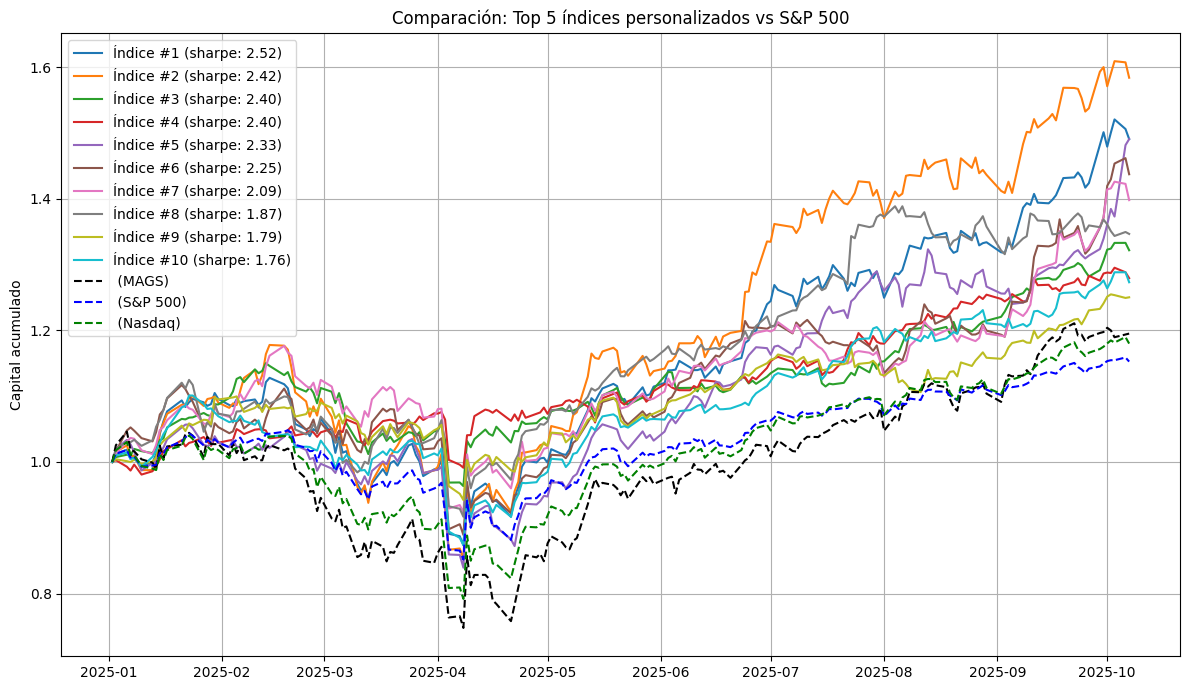

In [19]:
plt.figure(figsize=(12,7))
for i, result in enumerate(top10):
    plt.plot(result['curve'], label=f'Índice #{i+1} (sharpe: {result["Sharpe"]:.2f})')
plt.plot(Mags_curve, label=' (MAGS)', linestyle='--', color='black')

plt.plot(SPY_curve, label=' (S&P 500)', linestyle='--', color='blue')
plt.plot(Nasdaq_curve, label=' (Nasdaq)', linestyle='--', color='green')
plt.title('Comparación: Top 5 índices personalizados vs S&P 500')
plt.ylabel('Capital acumulado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:

# -----------------------------
for i, result in enumerate(top10[:5]):
    print(f"\n🏆 Índice #{i+1}")
    print("Acciones:", ", ".join(result['tickers']))
    print(f"CAGR: {result['CAGR']:.2%}")
    weights_str = ", ".join([f"{ticker}: {weight:.2%}" for ticker, weight in result['weights'].items()])
    print(f"Weights: {weights_str}")
    print(f"Volatilidad: {result['Volatility']:.2%}")
    print(f"Sharpe Ratio: {result['Sharpe']:.2f}")
    print(f"Max Drawdown: {result['Drawdown']:.2%}")



🏆 Índice #1
Acciones: LMT, HOOD, EL, KEYS, MS, F, MMC, LOW, EW, IVZ
CAGR: 68.98%
Weights: LMT: 13.36%, HOOD: 14.21%, EL: 3.69%, KEYS: 3.27%, MS: 27.78%, F: 5.27%, MMC: 11.18%, LOW: 14.98%, EW: 5.07%, IVZ: 1.19%
Volatilidad: 26.94%
Sharpe Ratio: 2.52
Max Drawdown: -22.57%

🏆 Índice #2
Acciones: UBER, KVUE, HSY, CCL, IPG, HOOD, TSN, GS, BX, MHK
CAGR: 83.00%
Weights: UBER: 22.23%, KVUE: 3.39%, HSY: 4.37%, CCL: 4.03%, IPG: 1.09%, HOOD: 13.91%, TSN: 2.09%, GS: 25.96%, BX: 22.09%, MHK: 0.83%
Volatilidad: 33.88%
Sharpe Ratio: 2.42
Max Drawdown: -27.56%

🏆 Índice #3
Acciones: EPAM, PRU, GLW, COST, BF-B, MDT, BBY, A, NEM, WDC
CAGR: 44.28%
Weights: EPAM: 0.97%, PRU: 4.27%, GLW: 8.42%, COST: 47.52%, BF-B: 1.53%, MDT: 14.81%, BBY: 1.84%, A: 4.62%, NEM: 11.16%, WDC: 4.86%
Volatilidad: 18.00%
Sharpe Ratio: 2.40
Max Drawdown: -16.24%

🏆 Índice #4
Acciones: NEM, DUK, DLR, GD, ZTS, GEN, CBRE, CCL, CAG, VZ
CAGR: 38.23%
Weights: NEM: 13.77%, DUK: 14.05%, DLR: 8.73%, GD: 13.35%, ZTS: 9.14%, GEN: 2.42%, C

# Librería Ruptures - Detección de Puntos de Cambio

La librería `ruptures` es una herramienta poderosa para detectar cambios estructurales en series temporales. En finanzas es útil para:

- **Detectar cambios de régimen** en volatilidad o correlaciones
- **Identificar crisis financieras** o eventos importantes
- **Segmentar períodos** para análisis separados
- **Detectar cambios en tendencias** de precios

## Conceptos clave:
- **Change point**: Momento en el tiempo donde cambian las propiedades estadísticas de la serie
- **Cost function**: Función que mide la "homogeneidad" de un segmento
- **Penalty**: Parámetro que controla cuántos puntos de cambio detectar

## Principales algoritmos:
- `Pelt`: Rápido y eficiente para series largas
- `Dynp`: Programación dinámica, más preciso pero lento
- `BottomUp`: Método jerárquico
- `Window`: Ventana deslizante

[*********************100%***********************]  1 of 1 completed


Puntos de cambio detectados en AAPL:
1. 2023-03-22


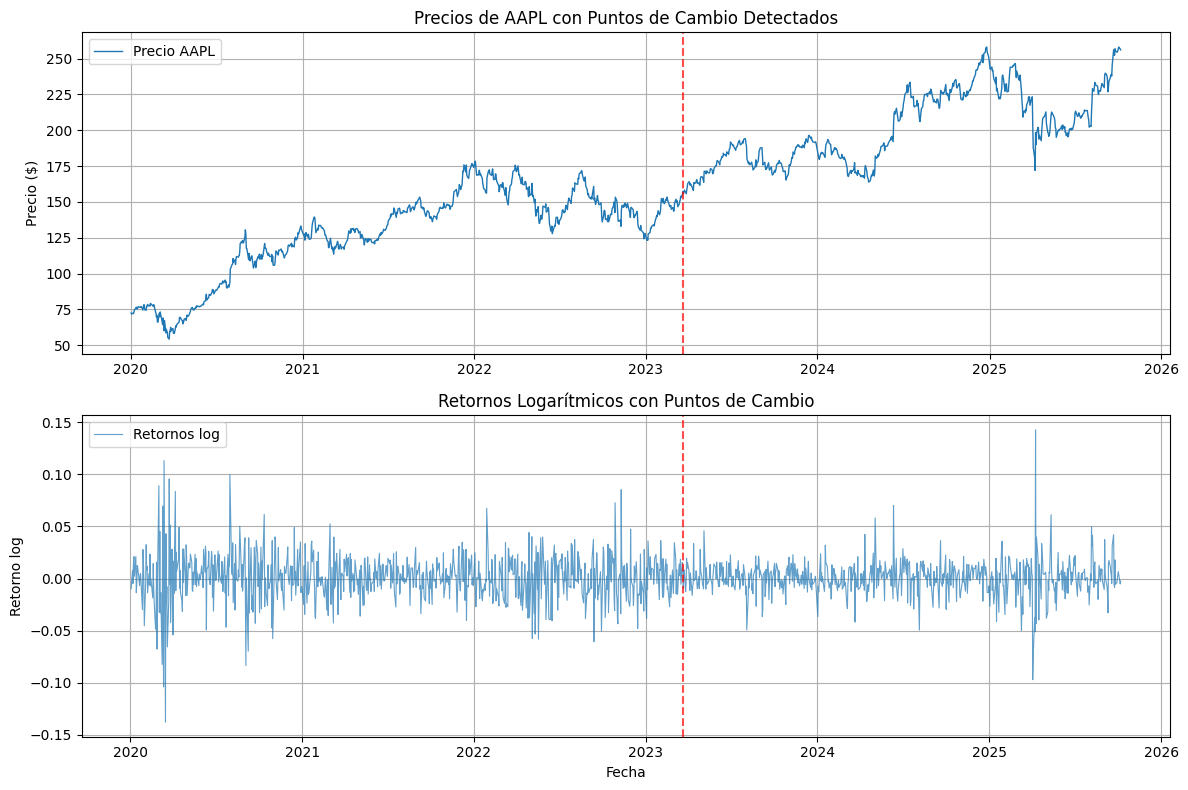

In [21]:
import ruptures as rpt
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =====================================
# EJEMPLO 1: Detectar cambios en precios de una acción
# =====================================

# Descargar datos de AAPL desde 2020
aapl_data = yf.download("AAPL", start="2020-01-01", auto_adjust=True)['Close']

# Convertir a retornos logarítmicos (más estables para análisis)
returns = np.log(aapl_data / aapl_data.shift(1)).dropna()

# Configurar el detector de puntos de cambio
# - model="rbf": Detecta cambios en la media y varianza
# - min_size=30: Mínimo 30 días entre cambios
min_size=30
algo = rpt.Pelt(model="rbf", min_size=min_size).fit(returns.values)

# Detectar puntos de cambio (penalty controla sensibilidad)
# Penalty más alto = menos puntos de cambio
penalty = 10  # Experimenta con valores entre 5-20, 10
change_points = algo.predict(pen=penalty)

# Los índices se refieren a posiciones en el array, convertir a fechas
change_dates = [returns.index[cp-1] for cp in change_points[:-1]]  # -1 porque el último es el final

print(f"Puntos de cambio detectados en AAPL:")
for i, date in enumerate(change_dates):
    print(f"{i+1}. {date.strftime('%Y-%m-%d')}")

# Graficar resultados
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Gráfico 1: Precios con puntos de cambio
ax1.plot(aapl_data.index, aapl_data, label='Precio AAPL', linewidth=1)
for date in change_dates:
    ax1.axvline(x=date, color='red', linestyle='--', alpha=0.7)
ax1.set_title('Precios de AAPL con Puntos de Cambio Detectados')
ax1.set_ylabel('Precio ($)')
ax1.legend()
ax1.grid(True)

# Gráfico 2: Retornos con puntos de cambio
ax2.plot(returns.index, returns, label='Retornos log', linewidth=0.8, alpha=0.7)
for date in change_dates:
    ax2.axvline(x=date, color='red', linestyle='--', alpha=0.7)
ax2.set_title('Retornos Logarítmicos con Puntos de Cambio')
ax2.set_ylabel('Retorno log')
ax2.set_xlabel('Fecha')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


Cambios en volatilidad detectados:
1. 2020-02-28 - Vol antes: 0.0199, después: 0.0499
2. 2020-05-04 - Vol antes: 0.0409, después: 0.0175
3. 2020-07-29 - Vol antes: 0.0175, después: 0.0276
4. 2020-09-02 - Vol antes: 0.0272, después: 0.0333
5. 2020-10-01 - Vol antes: 0.0339, después: 0.0264
6. 2020-11-27 - Vol antes: 0.0259, después: 0.0165
7. 2021-01-05 - Vol antes: 0.0165, después: 0.0213
8. 2021-04-01 - Vol antes: 0.0230, después: 0.0157
9. 2021-06-07 - Vol antes: 0.0151, después: 0.0110
10. 2021-12-02 - Vol antes: 0.0118, después: 0.0188
11. 2022-05-04 - Vol antes: 0.0180, después: 0.0297
12. 2022-06-09 - Vol antes: 0.0306, después: 0.0259
13. 2022-07-11 - Vol antes: 0.0257, después: 0.0174
14. 2022-09-13 - Vol antes: 0.0159, después: 0.0229
15. 2022-11-01 - Vol antes: 0.0240, después: 0.0308
16. 2022-12-07 - Vol antes: 0.0308, después: 0.0206
17. 2023-01-23 - Vol antes: 0.0204, después: 0.0157
18. 2023-03-21 - Vol antes: 0.0157, después: 0.0127
19. 2023-06-01 - Vol antes: 0.0138, d

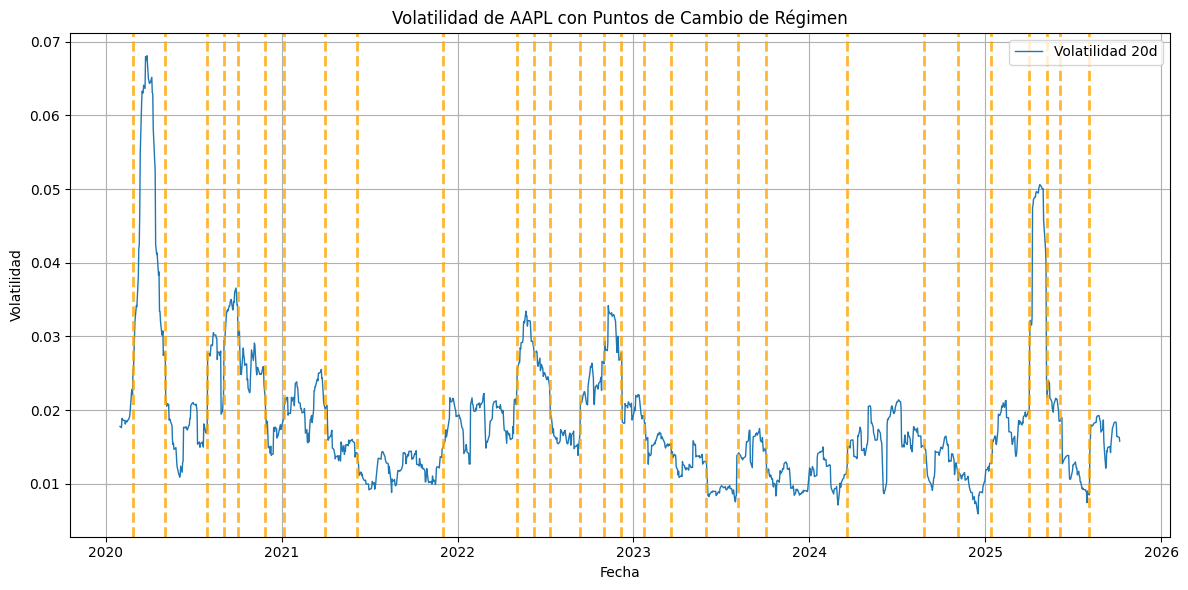

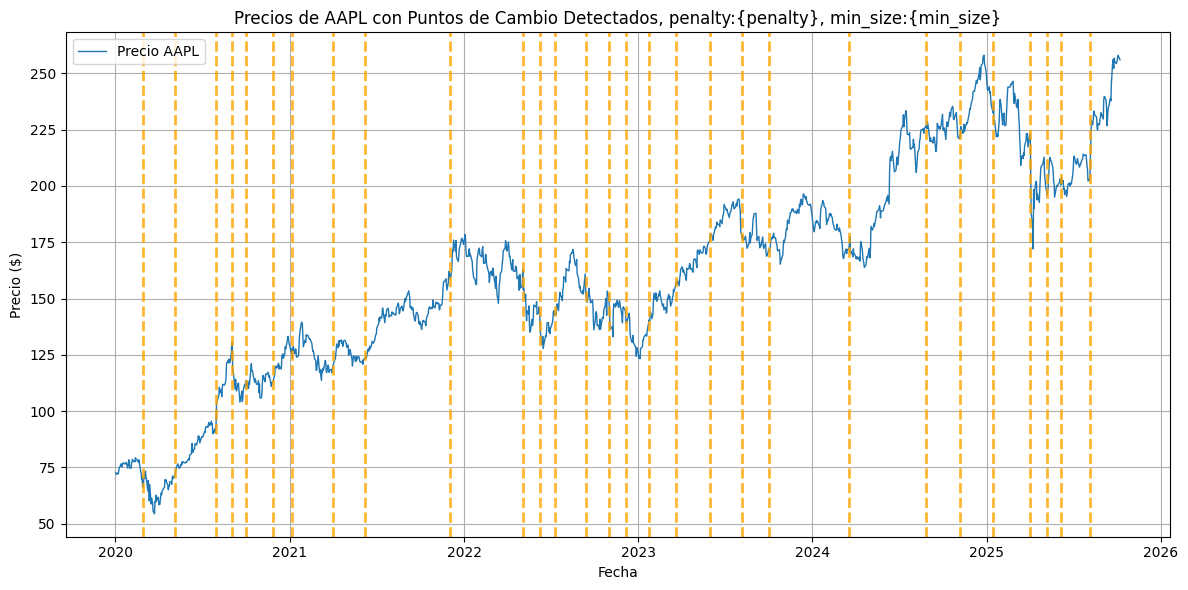

In [22]:
# =====================================
# EJEMPLO 2: Detectar cambios en VOLATILIDAD
# =====================================

# Calcular volatilidad rolling de 20 días
volatility = returns.rolling(window=20).std().dropna()

# Detector específico para cambios en varianza
algo_var = rpt.Pelt(model="rbf", min_size=20).fit(volatility.values)
vol_changes = algo_var.predict(pen=5)
vol_change_dates = [volatility.index[cp-1] for cp in vol_changes[:-1]]

# Corrected code
print(f"\nCambios en volatilidad detectados:")
for i, date in enumerate(vol_change_dates):
    # Get data before and after the change point
    data_before = volatility.loc[:date]
    data_after = volatility.loc[date:]
    
    # Calculate mean volatility before change point
    if len(data_before) >= 20:
        vol_before = data_before.iloc[-20:].mean()
    else:
        vol_before = data_before.mean()
    
    # Calculate mean volatility after change point  
    if len(data_after) >= 20:
        vol_after = data_after.iloc[:20].mean()
    else:
        vol_after = data_after.mean()
    
    # Convert to scalar if still Series (safety check)
    if hasattr(vol_before, 'item'):
        vol_before = vol_before.item()
    if hasattr(vol_after, 'item'):
        vol_after = vol_after.item()
    
    print(f"{i+1}. {date.strftime('%Y-%m-%d')} - Vol antes: {vol_before:.4f}, después: {vol_after:.4f}")


# Graficar volatilidad con cambios
plt.figure(figsize=(12, 6))

plt.plot(volatility.index, volatility, label='Volatilidad 20d', linewidth=1)
for date in vol_change_dates:
    plt.axvline(x=date, color='orange', linestyle='--', alpha=0.8, linewidth=2)
plt.title('Volatilidad de AAPL con Puntos de Cambio de Régimen')
plt.ylabel('Volatilidad')
plt.xlabel('Fecha')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#hacemos un segundo plot para mostrar aapl_data

plt.figure(figsize=(12, 6))

plt.plot(aapl_data.index, aapl_data, label='Precio AAPL', linewidth=1)
for date in vol_change_dates:
    plt.axvline(x=date, color='orange', linestyle='--', alpha=0.8, linewidth=2)
plt.title('Precios de AAPL con Puntos de Cambio Detectados, penalty:{penalty}, min_size:{min_size}')
plt.ylabel('Precio ($)')
plt.xlabel('Fecha')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ff

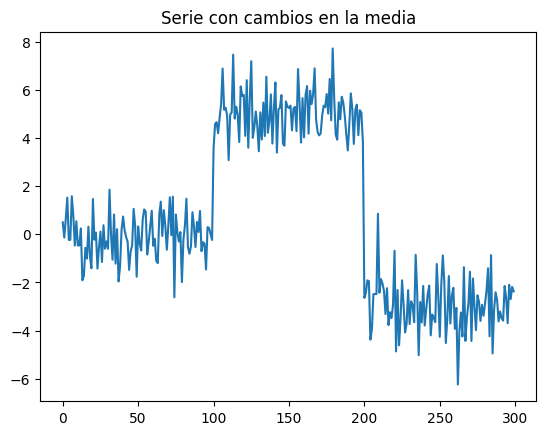

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una serie con cambios en la media
np.random.seed(42)
n = 300
signal = np.concatenate([
    np.random.normal(loc=0, scale=1, size=100),
    np.random.normal(loc=5, scale=1, size=100),
    np.random.normal(loc=-3, scale=1, size=100),
])

plt.plot(signal)
plt.title("Serie con cambios en la media")
plt.show()


In [24]:
# convertir aapl_data en array numpy
aapl_array = aapl_data.values

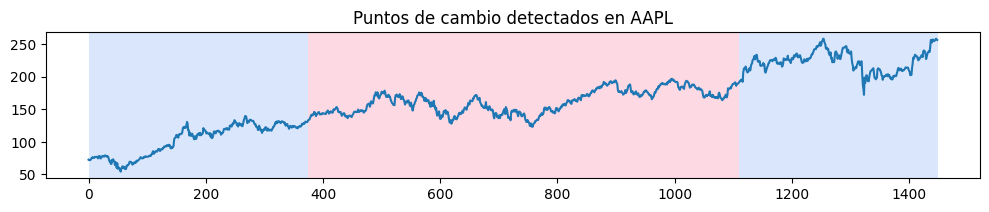

Cambios detectados en: [375, 1111, 1449]
Modelo usado: l2


In [25]:
import ruptures as rpt

# Usamos el modelo 'l2' que detecta cambios en la media
model = "l2"
algo = rpt.KernelCPD(kernel="linear").fit(aapl_array.reshape(-1, 1))

# Detectamos 2 cambios
n_bkps = 2
result = algo.predict(n_bkps=n_bkps)

# Mostrar resultado
rpt.display(aapl_array, result)
plt.title("Puntos de cambio detectados en AAPL")
plt.show()

print("Cambios detectados en:", result)
print(f"Modelo usado: {model}")

In [26]:
# Ejemplo simple: calculamos los intervalos entre cambios
# y asumimos que se repite el patrón

bkps = result  # por ejemplo: [100, 200, 300]
intervalos = np.diff([0] + bkps)  # [100, 100, 100]

# Si el patrón continúa, predecimos:
proximo_cambio = bkps[-1] + intervalos[-1]
print(f"Predicción ingenua: próximo cambio en el índice {proximo_cambio}")


Predicción ingenua: próximo cambio en el índice 1787


### ggg

# Modelos Disponibles en Ruptures

La librería `ruptures` ofrece diferentes modelos según el tipo de cambio que quieras detectar:

## 1. **Modelos por Algoritmo**

### A) Algoritmos con diferentes modelos:
- **`rpt.Pelt(model="...")`** - Más rápido
- **`rpt.Dynp(model="...")`** - Más preciso pero lento
- **`rpt.BottomUp(model="...")`** - Método jerárquico
- **`rpt.Window(model="...")`** - Ventana deslizante

### B) Modelos disponibles:
- **`"l1"`** - Detecta cambios en la **media** (norma L1)
- **`"l2"`** - Detecta cambios en la **media** (norma L2) - **MÁS COMÚN**
- **`"rbf"`** - Detecta cambios en **media y varianza** - **MUY ÚTIL**
- **`"linear"`** - Detecta cambios **lineales**
- **`"normal"`** - Asume distribución normal
- **`"ar"`** - Para series **autorregresivas**
- **`"rank"`** - Detecta cambios en la **mediana**

## 2. **Algoritmos especializados con kernels**

### A) KernelCPD (Change Point Detection con kernels):
```python
rpt.KernelCPD(kernel="linear")    # Cambios lineales
rpt.KernelCPD(kernel="rbf")       # Cambios no lineales (RBF)
rpt.KernelCPD(kernel="cosine")    # Basado en coseno
```

### B) Binseg (Binary Segmentation):
```python
rpt.Binseg(model="l2")   # Segmentación binaria
```

## 3. **Casos de Uso por Modelo**

| Modelo | Mejor para | Ejemplo Financiero |
|--------|------------|-------------------|
| `"l2"` | Cambios en media | Cambios de tendencia en precios |
| `"rbf"` | Cambios en media Y varianza | Crisis financieras, cambios de volatilidad |
| `"normal"` | Datos con distribución normal | Retornos de acciones estables |
| `"rank"` | Datos con outliers | Precios con eventos extremos |
| `"ar"` | Series temporales autorregresivas | Índices bursátiles |
| `"linear"` | Cambios de tendencia lineal | Crecimiento/decrecimiento sostenido |

🔍 COMPARACIÓN DE MODELOS RUPTURES

📊 L2 (media):
   Puntos de cambio: 39
   Fechas: ['2020-03', '2020-05', '2020-06']

📊 RBF (media+var):
   Puntos de cambio: 8
   Fechas: ['2020-07', '2021-06', '2021-11']

📊 Normal:
   Puntos de cambio: 36
   Fechas: ['2020-02', '2020-05', '2020-06']


C:\Users\a01286222\AppData\Roaming\Python\Python312\site-packages\ruptures\costs\costnormal.py:28: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(



📊 Rank (mediana):
   Puntos de cambio: 6
   Fechas: ['2020-08', '2021-06', '2021-11']

📊 KernelCPD Linear:
   Puntos de cambio: 3
   Fechas: ['2020-08', '2023-03', '2024-06']

📊 KernelCPD RBF:
   Puntos de cambio: 3
   Fechas: ['2020-08', '2023-03', '2024-06']


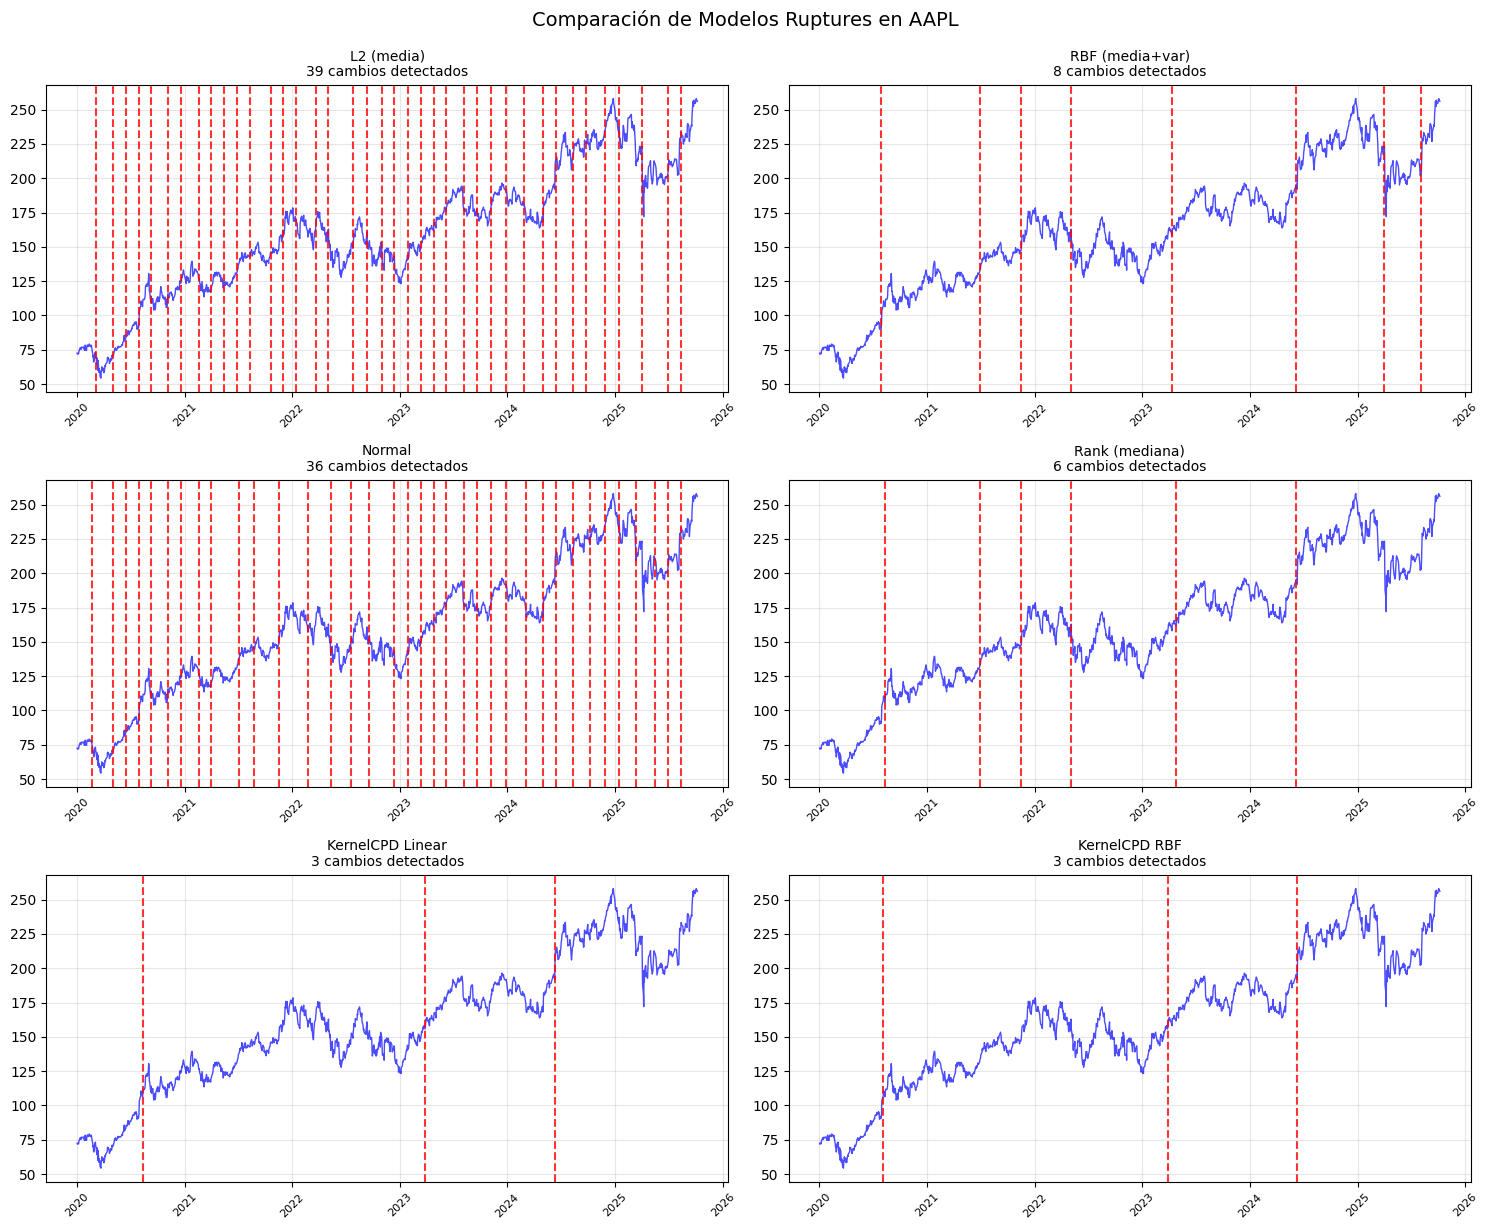


💡 RECOMENDACIONES:
• Para detectar cambios de TENDENCIA: usa 'l2' o 'linear'
• Para detectar CRISIS/VOLATILIDAD: usa 'rbf' o 'normal'
• Para datos con OUTLIERS: usa 'rank'
• Para FLEXIBILIDAD: usa KernelCPD con 'rbf'


In [27]:
# =======================================================
# COMPARACIÓN DE DIFERENTES MODELOS EN RUPTURES
# =======================================================

import ruptures as rpt
import matplotlib.pyplot as plt
import numpy as np

# Usar los datos de AAPL que ya tenemos
data_to_analyze = aapl_array

# Lista de modelos a comparar
modelos = {
    'L2 (media)': {'type': 'Pelt', 'model': 'l2'},
    'RBF (media+var)': {'type': 'Pelt', 'model': 'rbf'}, 
    'Normal': {'type': 'Pelt', 'model': 'normal'},
    'Rank (mediana)': {'type': 'Pelt', 'model': 'rank'},
    'KernelCPD Linear': {'type': 'KernelCPD', 'kernel': 'linear'},
    'KernelCPD RBF': {'type': 'KernelCPD', 'kernel': 'rbf'}
}

# Parámetros
n_bkps = 3  # Número de puntos de cambio a detectar
min_size = 30

# Crear subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

# Datos originales para referencia
original_dates = aapl_data.index

print("🔍 COMPARACIÓN DE MODELOS RUPTURES")
print("=" * 50)

for idx, (nombre, config) in enumerate(modelos.items()):
    ax = axes[idx]
    
    try:
        # Configurar algoritmo según el tipo
        if config['type'] == 'KernelCPD':
            algo = rpt.KernelCPD(kernel=config['kernel']).fit(data_to_analyze.reshape(-1, 1))
            change_points = algo.predict(n_bkps=n_bkps)
        else:
            algo = rpt.Pelt(model=config['model'], min_size=min_size).fit(data_to_analyze)
            change_points = algo.predict(pen=10)  # penalty fijo para comparación
        
        # Convertir índices a fechas
        change_dates = [original_dates[cp-1] for cp in change_points[:-1] if cp-1 < len(original_dates)]
        
        # Graficar
        ax.plot(original_dates, data_to_analyze, color='blue', alpha=0.7, linewidth=1)
        
        # Agregar líneas verticales en puntos de cambio
        for date in change_dates:
            ax.axvline(x=date, color='red', linestyle='--', alpha=0.8)
        
        ax.set_title(f'{nombre}\n{len(change_dates)} cambios detectados', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45, labelsize=8)
        
        # Imprimir resultados
        print(f"\n📊 {nombre}:")
        print(f"   Puntos de cambio: {len(change_dates)}")
        if change_dates:
            print(f"   Fechas: {[d.strftime('%Y-%m') for d in change_dates[:3]]}")
        
    except Exception as e:
        ax.text(0.5, 0.5, f'Error: {str(e)[:50]}...', 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{nombre}\nError en ejecución', fontsize=10)
        print(f"\n❌ {nombre}: Error - {str(e)}")

plt.tight_layout()
plt.suptitle('Comparación de Modelos Ruptures en AAPL', fontsize=14, y=1.02)
plt.show()

print(f"\n💡 RECOMENDACIONES:")
print(f"• Para detectar cambios de TENDENCIA: usa 'l2' o 'linear'")
print(f"• Para detectar CRISIS/VOLATILIDAD: usa 'rbf' o 'normal'") 
print(f"• Para datos con OUTLIERS: usa 'rank'")
print(f"• Para FLEXIBILIDAD: usa KernelCPD con 'rbf'")

📈 MODELO L2 - Cambios de Tendencia
----------------------------------------
1. 2020-03-06 - Posible cambio de tendencia
2. 2020-05-04 - Posible cambio de tendencia
3. 2020-06-16 - Posible cambio de tendencia
4. 2020-07-29 - Posible cambio de tendencia
5. 2020-09-10 - Posible cambio de tendencia
6. 2020-11-05 - Posible cambio de tendencia
7. 2020-12-18 - Posible cambio de tendencia
8. 2021-02-18 - Posible cambio de tendencia
9. 2021-04-01 - Posible cambio de tendencia
10. 2021-05-14 - Posible cambio de tendencia
11. 2021-06-28 - Posible cambio de tendencia
12. 2021-08-10 - Posible cambio de tendencia
13. 2021-10-20 - Posible cambio de tendencia
14. 2021-12-02 - Posible cambio de tendencia
15. 2022-01-14 - Posible cambio de tendencia
16. 2022-03-22 - Posible cambio de tendencia
17. 2022-05-04 - Posible cambio de tendencia
18. 2022-07-25 - Posible cambio de tendencia
19. 2022-09-13 - Posible cambio de tendencia
20. 2022-11-01 - Posible cambio de tendencia
21. 2022-12-14 - Posible cambio d

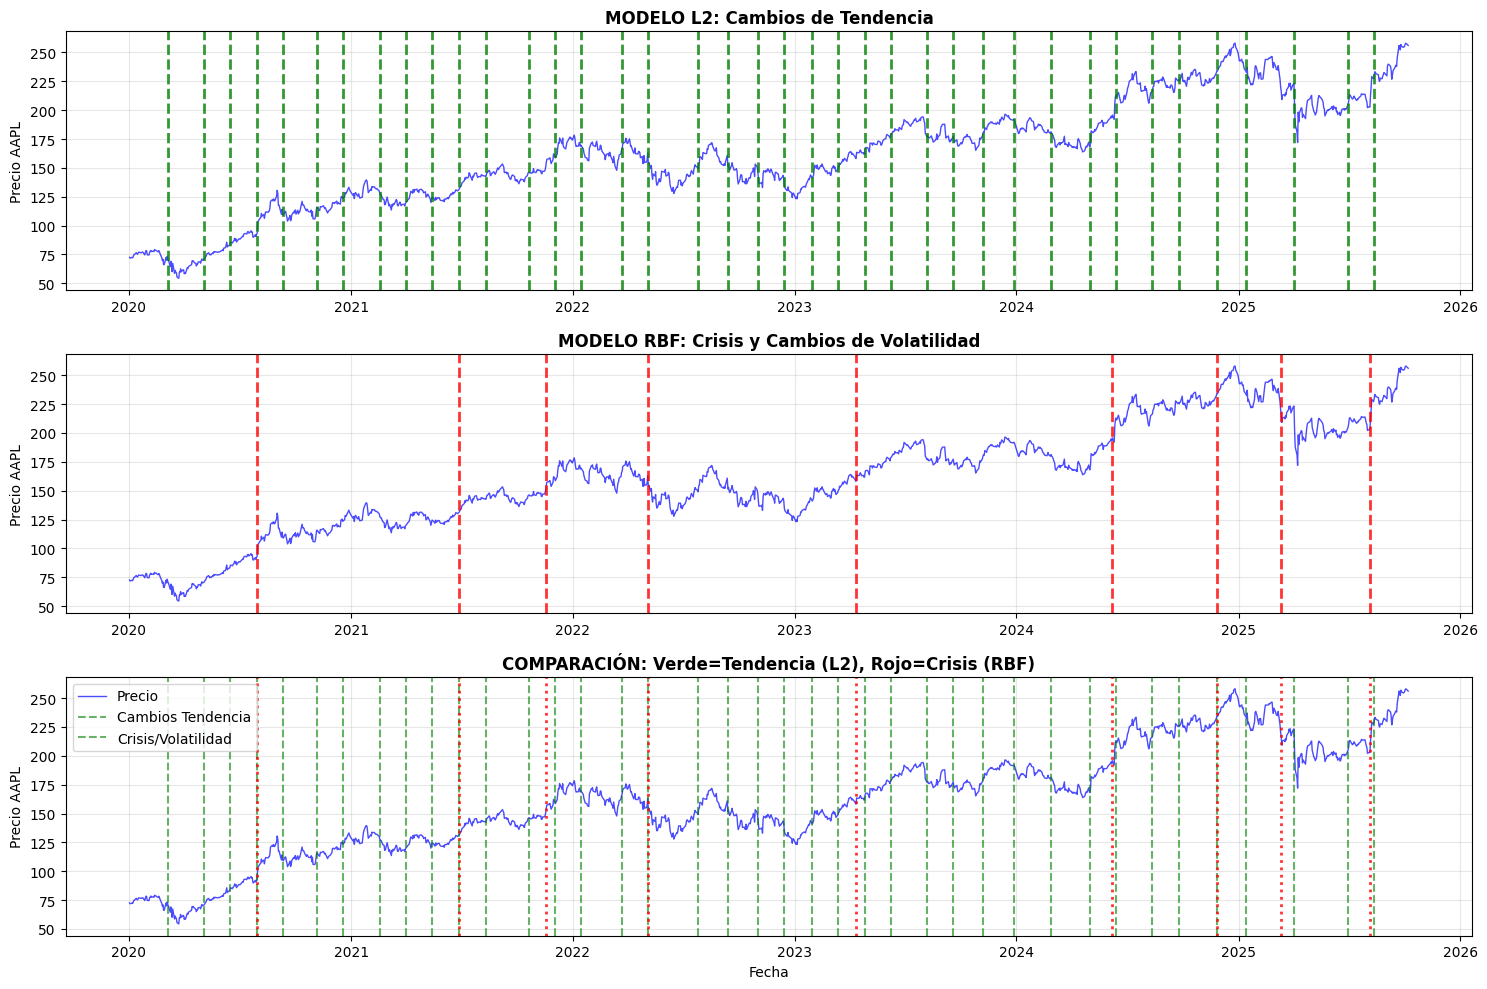


💡 INTERPRETACIÓN:
 Líneas VERDES (L2): Cambios graduales de tendencia alcista/bajista
 Líneas ROJAS (RBF): Cambios bruscos, crisis, o cambios de volatilidad


In [28]:
# =======================================================
# EJEMPLO PRÁCTICO: DIFERENTES MODELOS PARA FINANZAS
# =======================================================

# Ejemplo 1: Detectar cambios de TENDENCIA (modelo l2)
print("📈 MODELO L2 - Cambios de Tendencia")
print("-" * 40)
algo_tendencia = rpt.Pelt(model="l2", min_size=30).fit(aapl_array)
cambios_tendencia = algo_tendencia.predict(pen=15)
fechas_tendencia = [aapl_data.index[cp-1] for cp in cambios_tendencia[:-1]]

for i, fecha in enumerate(fechas_tendencia):
    print(f"{i+1}. {fecha.strftime('%Y-%m-%d')} - Posible cambio de tendencia")

# Ejemplo 2: Detectar CRISIS/VOLATILIDAD (modelo rbf)
print(f"\n🌪️  MODELO RBF - Crisis y Volatilidad")
print("-" * 40)
algo_crisis = rpt.Pelt(model="rbf", min_size=20).fit(aapl_array)
cambios_crisis = algo_crisis.predict(pen=8)  # penalty más bajo = más sensible
fechas_crisis = [aapl_data.index[cp-1] for cp in cambios_crisis[:-1]]

for i, fecha in enumerate(fechas_crisis):
    print(f"{i+1}. {fecha.strftime('%Y-%m-%d')} - Posible crisis o cambio de volatilidad")

# Ejemplo 3: Modelo ROBUSTO para outliers (rank)
print(f"\n🎯 MODELO RANK - Robusto a Outliers")
print("-" * 40)
try:
    algo_robusto = rpt.Pelt(model="rank", min_size=25).fit(aapl_array)
    cambios_robusto = algo_robusto.predict(pen=12)
    fechas_robusto = [aapl_data.index[cp-1] for cp in cambios_robusto[:-1]]
    
    for i, fecha in enumerate(fechas_robusto):
        print(f"{i+1}. {fecha.strftime('%Y-%m-%d')} - Cambio robusto (ignora outliers)")
except Exception as e:
    print(f"Error con modelo rank: {e}")

# Visualización comparativa
plt.figure(figsize=(15, 10))

# Subplot 1: L2 (Tendencia)
plt.subplot(3, 1, 1)
plt.plot(aapl_data.index, aapl_array, color='blue', alpha=0.7, linewidth=1)
for fecha in fechas_tendencia:
    plt.axvline(x=fecha, color='green', linestyle='--', alpha=0.8, linewidth=2)
plt.title('MODELO L2: Cambios de Tendencia', fontweight='bold')
plt.ylabel('Precio AAPL')
plt.grid(True, alpha=0.3)

# Subplot 2: RBF (Crisis)
plt.subplot(3, 1, 2)
plt.plot(aapl_data.index, aapl_array, color='blue', alpha=0.7, linewidth=1)
for fecha in fechas_crisis:
    plt.axvline(x=fecha, color='red', linestyle='--', alpha=0.8, linewidth=2)
plt.title('MODELO RBF: Crisis y Cambios de Volatilidad', fontweight='bold')
plt.ylabel('Precio AAPL')
plt.grid(True, alpha=0.3)

# Subplot 3: Comparación
plt.subplot(3, 1, 3)
plt.plot(aapl_data.index, aapl_array, color='blue', alpha=0.7, linewidth=1, label='Precio AAPL')
for fecha in fechas_tendencia:
    plt.axvline(x=fecha, color='green', linestyle='--', alpha=0.6, linewidth=1.5)
for fecha in fechas_crisis:
    plt.axvline(x=fecha, color='red', linestyle=':', alpha=0.8, linewidth=2)
plt.title('COMPARACIÓN: Verde=Tendencia (L2), Rojo=Crisis (RBF)', fontweight='bold')
plt.ylabel('Precio AAPL')
plt.xlabel('Fecha')
plt.legend(['Precio', 'Cambios Tendencia', 'Crisis/Volatilidad'])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 INTERPRETACIÓN:")
print(f" Líneas VERDES (L2): Cambios graduales de tendencia alcista/bajista")
print(f" Líneas ROJAS (RBF): Cambios bruscos, crisis, o cambios de volatilidad")


# Mapper

In [12]:
class SimpleMapper:
    def __init__(self, n_intervals=10, overlap=0.3):
        self.n_intervals = n_intervals
        self.overlap = overlap
        self.graph = {}
        
    def fit_transform(self, X, lens_function=None):
        """
        Implementación simplificada del algoritmo Mapper
        """
        # Si no se proporciona función de lente, usar PCA
        if lens_function is None:
            pca = PCA(n_components=2)
            lens_values = pca.fit_transform(X)[:, 0]  # Primera componente
        else:
            lens_values = lens_function(X)
        
        # Crear intervalos superpuestos
        min_val, max_val = lens_values.min(), lens_values.max()
        interval_size = (max_val - min_val) / self.n_intervals
        overlap_size = interval_size * self.overlap
        
        nodes = {}
        node_id = 0
        
        # Para cada intervalo
        for i in range(self.n_intervals):
            start = min_val + i * interval_size - overlap_size
            end = min_val + (i + 1) * interval_size + overlap_size
            
            # Obtener puntos en este intervalo
            mask = (lens_values >= start) & (lens_values <= end)
            if mask.sum() == 0:
                continue
                
            points_in_interval = X[mask]
            indices_in_interval = np.where(mask)[0]
            
            if len(points_in_interval) < 2:
                continue
            
            # Clustering dentro del intervalo
            try:
                # Ajustar parámetros de DBSCAN para datos financieros normalizados
                eps_value = max(0.3, np.std(points_in_interval) * 2)  # Adaptar epsilon
                min_samples = max(1, len(points_in_interval) // 4)    # Mínimo adaptativo
                
                clustering = DBSCAN(eps=eps_value, min_samples=min_samples).fit(points_in_interval)
                unique_labels = set(clustering.labels_)
                
                # Si no hay clusters válidos, crear un cluster con todos los puntos
                if len(unique_labels) == 1 and -1 in unique_labels:
                    nodes[node_id] = {
                        'points': indices_in_interval,
                        'size': len(indices_in_interval),
                        'interval': i,
                        'center': np.mean(points_in_interval, axis=0)
                    }
                    node_id += 1
                else:
                    for label in unique_labels:
                        if label == -1:  # Ruido en DBSCAN - también incluir como cluster
                            cluster_mask = clustering.labels_ == label
                            cluster_indices = indices_in_interval[cluster_mask]
                            if len(cluster_indices) > 0:
                                nodes[node_id] = {
                                    'points': cluster_indices,
                                    'size': len(cluster_indices),
                                    'interval': i,
                                    'center': np.mean(points_in_interval[cluster_mask], axis=0),
                                    'type': 'outliers'
                                }
                                node_id += 1
                        else:
                            cluster_mask = clustering.labels_ == label
                            cluster_indices = indices_in_interval[cluster_mask]
                            
                            if len(cluster_indices) > 0:
                                nodes[node_id] = {
                                    'points': cluster_indices,
                                    'size': len(cluster_indices),
                                    'interval': i,
                                    'center': np.mean(points_in_interval[cluster_mask], axis=0),
                                    'type': 'cluster'
                                }
                                node_id += 1
                        
            except Exception as e:
                # Si DBSCAN falla, crear un solo nodo con todos los puntos
                nodes[node_id] = {
                    'points': indices_in_interval,
                    'size': len(indices_in_interval),
                    'interval': i,
                    'center': np.mean(points_in_interval, axis=0),
                    'type': 'fallback'
                }
                node_id += 1
        
        # Crear conexiones entre nodos que comparten puntos
        edges = []
        for i, node1 in nodes.items():
            for j, node2 in nodes.items():
                if i < j:  # Evitar duplicados
                    shared_points = set(node1['points']) & set(node2['points'])
                    if len(shared_points) > 0:
                        edges.append((i, j, len(shared_points)))
        
        self.nodes = nodes
        self.edges = edges
        return self
    
    def plot_graph(self, labels=None, figsize=(12, 8)):
        """
        Visualizar el grafo Mapper
        """
        if not hasattr(self, 'nodes'):
            print("❌ Primero ejecuta fit_transform()")
            return
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
        
        # Gráfico 1: Red topológica
        positions = {}
        for node_id, node in self.nodes.items():
            # Posición basada en el intervalo y tamaño
            x = node['interval']
            y = node['size']
            positions[node_id] = (x, y)
        
        # Dibujar nodos
        for node_id, (x, y) in positions.items():
            size = max(50, self.nodes[node_id]['size'] * 100)  # Tamaño mínimo y escalado mejor
            node_type = self.nodes[node_id].get('type', 'cluster')
            
            # Color según tipo de nodo
            if node_type == 'outliers':
                color = 'red'
                alpha = 0.6
            elif node_type == 'fallback':
                color = 'orange'
                alpha = 0.7
            else:
                color = node_id
                alpha = 0.8
            
            scatter = ax1.scatter(x, y, s=size, alpha=alpha, c=[color], cmap='viridis' if isinstance(color, int) else None)
            ax1.text(x, y, str(node_id), ha='center', va='center', fontsize=8, fontweight='bold', color='white')
        
        # Dibujar conexiones con diferentes grosores
        for i, j, weight in self.edges:
            if i in positions and j in positions:
                x1, y1 = positions[i]
                x2, y2 = positions[j]
                # Grosor basado en el número de puntos compartidos
                line_width = min(5, max(0.5, weight * 0.5))
                ax1.plot([x1, x2], [y1, y2], 'k-', alpha=0.4, linewidth=line_width)
        
        ax1.set_xlabel('Intervalo')
        ax1.set_ylabel('Tamaño del cluster')
        ax1.set_title('Red Topológica Mapper')
        ax1.grid(True, alpha=0.3)
        
        # Gráfico 2: Distribución de tamaños
        sizes = [node['size'] for node in self.nodes.values()]
        ax2.hist(sizes, bins=10, alpha=0.7, edgecolor='black')
        ax2.set_xlabel('Tamaño del cluster')
        ax2.set_ylabel('Frecuencia')
        ax2.set_title('Distribución de Tamaños de Clusters')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Información de clusters
        print(f"\n📊 RESUMEN DEL ANÁLISIS MAPPER:")
        print(f"Total de nodos: {len(self.nodes)}")
        print(f"Total de conexiones: {len(self.edges)}")
        print(f"Tamaño promedio de cluster: {np.mean(sizes):.1f}")
        
        return self
    
    def visualize(self, 
                  title='Mapper Visualization',
                  custom_tooltips=None,
                  color_values=None,
                  color_function_name='Color Function',
                  node_color_function=['average', 'std', 'sum', 'max', 'min'],
                  ticker_labels=None,
                  save_html=False,
                  filename='mapper_visualization.html'):
        """
        Crear visualización interactiva del grafo Mapper usando Plotly
        
        Parameters:
        -----------
        title : str
            Título del gráfico
        custom_tooltips : array-like
            Información adicional para mostrar en tooltips
        color_values : array-like
            Valores para colorear los nodos
        color_function_name : str
            Nombre de la función de color
        node_color_function : list
            Funciones estadísticas para colorear nodos
        ticker_labels : array-like
            Etiquetas de los tickers
        save_html : bool
            Si guardar como archivo HTML
        filename : str
            Nombre del archivo HTML
        """
        try:
            import plotly.graph_objects as go
            import plotly.express as px
            from plotly.subplots import make_subplots
        except ImportError:
            print("❌ Se requiere plotly para la visualización interactiva.")
            print("Instala con: pip install plotly")
            return self.plot_graph()
        
        if not hasattr(self, 'nodes'):
            print("❌ Primero ejecuta fit_transform()")
            return
        
        # Crear layout del grafo usando spring layout simple
        positions = self._calculate_spring_layout()
        
        # Preparar datos para los nodos
        node_x = []
        node_y = []
        node_sizes = []
        node_colors = []
        node_text = []
        hover_text = []
        
        for node_id, node in self.nodes.items():
            x, y = positions[node_id]
            node_x.append(x)
            node_y.append(y)
            
            # Tamaño del nodo
            size = max(10, node['size'] * 5)
            node_sizes.append(size)
            
            # Color del nodo basado en color_values si se proporciona
            if color_values is not None:
                # Calcular estadística del color para los puntos en este nodo
                node_values = color_values[node['points']]
                if 'average' in node_color_function:
                    color_val = np.mean(node_values)
                elif 'sum' in node_color_function:
                    color_val = np.sum(node_values)
                elif 'max' in node_color_function:
                    color_val = np.max(node_values)
                elif 'min' in node_color_function:
                    color_val = np.min(node_values)
                else:  # std
                    color_val = np.std(node_values)
                node_colors.append(color_val)
            else:
                node_colors.append(node['size'])
            
            # Texto del nodo
            node_text.append(f"Cluster {node_id}")
            
            # Hover text con información detallada
            hover_info = f"<b>Cluster {node_id}</b><br>"
            hover_info += f"Tamaño: {node['size']}<br>"
            hover_info += f"Intervalo: {node['interval']}<br>"
            hover_info += f"Tipo: {node.get('type', 'cluster')}<br>"
            
            # Agregar información de tickers si están disponibles
            if ticker_labels is not None:
                tickers_in_node = [ticker_labels[i] for i in node['points']]
                hover_info += f"Tickers: {', '.join(tickers_in_node[:5])}"
                if len(tickers_in_node) > 5:
                    hover_info += f"... y {len(tickers_in_node)-5} más"
                hover_info += "<br>"
            
            # Agregar tooltips personalizados
            if custom_tooltips is not None:
                tooltip_values = custom_tooltips[node['points']]
                hover_info += f"Info adicional: {np.mean(tooltip_values):.3f}<br>"
            
            hover_text.append(hover_info)
        
        # Preparar datos para las aristas
        edge_x = []
        edge_y = []
        edge_weights = []
        
        for i, j, weight in self.edges:
            if i in positions and j in positions:
                x0, y0 = positions[i]
                x1, y1 = positions[j]
                edge_x.extend([x0, x1, None])
                edge_y.extend([y0, y1, None])
                edge_weights.append(weight)
        
        # Crear la figura
        fig = go.Figure()
        
        # Agregar aristas
        fig.add_trace(go.Scatter(
            x=edge_x, y=edge_y,
            mode='lines',
            line=dict(width=2, color='rgba(50,50,50,0.3)'),
            hoverinfo='none',
            showlegend=False,
            name='Conexiones'
        ))
        
        # Agregar nodos
        fig.add_trace(go.Scatter(
            x=node_x, y=node_y,
            mode='markers+text',
            marker=dict(
                size=node_sizes,
                color=node_colors,
                colorscale='Viridis',
                showscale=True,
                colorbar=dict(title=color_function_name),
                line=dict(width=2, color='white')
            ),
            text=node_text,
            textposition="middle center",
            textfont=dict(color="white", size=10),
            hovertext=hover_text,
            hoverinfo='text',
            showlegend=False,
            name='Clusters'
        ))
        
        # Configurar layout
        fig.update_layout(
            title=dict(
                text=title,
                x=0.5,
                font=dict(size=16, color='darkblue')
            ),
            showlegend=False,
            hovermode='closest',
            margin=dict(b=20,l=5,r=5,t=40),
            annotations=[
                dict(
                    text=f"Total clusters: {len(self.nodes)} | Total conexiones: {len(self.edges)}",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002,
                    xanchor='left', yanchor='bottom',
                    font=dict(color='gray', size=12)
                )
            ],
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            plot_bgcolor='white'
        )
        
        # Mostrar la figura
        try:
            fig.show()
        except Exception as e:
            print(f"⚠️  No se puede mostrar la visualización interactiva en este entorno.")
            print(f"Error: {e}")
            print("💡 Guardando como HTML para visualización externa...")
            save_html = True
            if not filename.endswith('.html'):
                filename = filename.replace('.html', '') + '_fallback.html'
        
        # Guardar como HTML si se solicita o si hay error
        if save_html:
            try:
                fig.write_html(filename)
                print(f"💾 Visualización guardada como: {filename}")
                print(f"🌐 Abre el archivo en tu navegador para ver la visualización interactiva")
            except Exception as e:
                print(f"❌ Error guardando HTML: {e}")
                print("🔄 Creando visualización estática alternativa...")
                return self._create_static_alternative(color_values, color_function_name, ticker_labels)
        
        return self
    
    def _create_static_alternative(self, color_values=None, color_function_name='Color', ticker_labels=None):
        """
        Crear visualización estática alternativa cuando plotly no funciona
        """
        import networkx as nx
        
        # Crear grafo de NetworkX
        G = nx.Graph()
        
        # Agregar nodos
        for node_id, node in self.nodes.items():
            node_attrs = {k: v for k, v in node.items() if k != 'size'}  # Evitar conflicto
            node_attrs['node_size'] = node['size']  # Renombrar size
            G.add_node(node_id, **node_attrs)
        
        # Agregar aristas
        for i, j, weight in self.edges:
            G.add_edge(i, j, weight=weight)
        
        # Crear layout
        try:
            pos = nx.spring_layout(G, k=2, iterations=50)
        except:
            pos = {node_id: (np.random.random(), np.random.random()) for node_id in G.nodes()}
        
        # Crear visualización con matplotlib
        plt.figure(figsize=(14, 10))
        
        # Preparar colores
        if color_values is not None:
            node_colors = []
            for node_id in G.nodes():
                node_values = color_values[self.nodes[node_id]['points']]
                node_colors.append(np.mean(node_values))
        else:
            node_colors = [self.nodes[node_id]['size'] for node_id in G.nodes()]
        
        # Preparar tamaños
        node_sizes = [G.nodes[node_id]['node_size'] * 100 for node_id in G.nodes()]
        
        # Dibujar aristas
        nx.draw_networkx_edges(G, pos, alpha=0.3, width=2, edge_color='gray')
        
        # Dibujar nodos
        nodes = nx.draw_networkx_nodes(G, pos, 
                                     node_color=node_colors,
                                     node_size=node_sizes,
                                     cmap='viridis',
                                     alpha=0.8)
        
        # Agregar etiquetas de nodos
        labels = {node_id: str(node_id) for node_id in G.nodes()}
        nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='white', font_weight='bold')
        
        # Crear colorbar
        if color_values is not None:
            plt.colorbar(nodes, label=color_function_name)
        
        plt.title('Análisis Topológico Mapper - Vista Estática\n(NetworkX + Matplotlib)', 
                 fontsize=14, fontweight='bold')
        plt.axis('off')
        
        # Agregar información de texto
        info_text = f"Nodos: {len(self.nodes)} | Conexiones: {len(self.edges)}"
        if ticker_labels is not None:
            info_text += f" | Tickers analizados: {len(ticker_labels)}"
        
        plt.figtext(0.02, 0.02, info_text, fontsize=10, style='italic', color='gray')
        
        plt.tight_layout()
        plt.show()
        
        # Mostrar información detallada de clusters
        print("\n📊 INFORMACIÓN DETALLADA DE CLUSTERS:")
        print("=" * 60)
        
        for node_id, node in self.nodes.items():
            print(f"\n🏷️  Cluster {node_id}:")
            print(f"   📏 Tamaño: {node['size']} tickers")
            print(f"   📍 Intervalo: {node['interval']}")
            print(f"   🏷️  Tipo: {node.get('type', 'cluster')}")
            
            if ticker_labels is not None:
                tickers_in_node = [ticker_labels[i] for i in node['points']]
                print(f"   🏢 Tickers: {', '.join(tickers_in_node[:8])}")
                if len(tickers_in_node) > 8:
                    print(f"       ... y {len(tickers_in_node)-8} más")
            
            if color_values is not None:
                node_values = color_values[node['points']]
                print(f"   📊 {color_function_name}: promedio={np.mean(node_values):.3f}, "
                      f"std={np.std(node_values):.3f}")
        
        return self
    
    def _calculate_spring_layout(self):
        """
        Calcular posiciones de nodos usando un algoritmo de spring layout simplificado
        """
        import random
        
        positions = {}
        n_nodes = len(self.nodes)
        
        # Posiciones iniciales aleatorias
        random.seed(42)
        for node_id in self.nodes.keys():
            positions[node_id] = (random.uniform(-1, 1), random.uniform(-1, 1))
        
        # Aplicar fuerzas de spring (simplificado)
        for iteration in range(50):
            forces = {node_id: [0, 0] for node_id in self.nodes.keys()}
            
            # Fuerza repulsiva entre todos los nodos
            for i in self.nodes.keys():
                for j in self.nodes.keys():
                    if i != j:
                        xi, yi = positions[i]
                        xj, yj = positions[j]
                        dx = xi - xj
                        dy = yi - yj
                        distance = max(0.01, np.sqrt(dx**2 + dy**2))
                        force_magnitude = 0.1 / distance**2
                        forces[i][0] += force_magnitude * dx / distance
                        forces[i][1] += force_magnitude * dy / distance
            
            # Fuerza atractiva entre nodos conectados
            for i, j, weight in self.edges:
                if i in positions and j in positions:
                    xi, yi = positions[i]
                    xj, yj = positions[j]
                    dx = xj - xi
                    dy = yj - yi
                    distance = max(0.01, np.sqrt(dx**2 + dy**2))
                    force_magnitude = 0.01 * distance * weight
                    forces[i][0] += force_magnitude * dx / distance
                    forces[i][1] += force_magnitude * dy / distance
                    forces[j][0] -= force_magnitude * dx / distance
                    forces[j][1] -= force_magnitude * dy / distance
            
            # Actualizar posiciones
            for node_id in self.nodes.keys():
                x, y = positions[node_id]
                fx, fy = forces[node_id]
                positions[node_id] = (x + fx * 0.1, y + fy * 0.1)
        
        return positions

In [13]:
# =======================================================
# MAPPER SIMPLE CON KEPLER MAPPER (COMO EL EJEMPLO)
# =======================================================

print("🗺️  IMPLEMENTACIÓN SIMPLE CON KEPLER MAPPER")
print("=" * 50)
import kmapper as km
import subprocess
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import DBSCAN, KMeans
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


import sklearn.cluster
import numpy as np


tickers_data = data.copy()
financial_metrics = {}
print("\n🔄 Calculando métricas financieras...")
for ticker in tickers_data.columns:
    try:
        prices = tickers_data[ticker].dropna()
        returns = prices.pct_change().dropna()
        
        # Métricas básicas
        total_return = (prices.iloc[-1] / prices.iloc[0]) - 1
        volatility = returns.std() * np.sqrt(252)  # Anualizada
        sharpe = (returns.mean() * 252) / (returns.std() * np.sqrt(252)) if returns.std() > 0 else 0
        
        # Métricas de riesgo
        max_drawdown = ((prices / prices.cummax()) - 1).min()
        var_95 = returns.quantile(0.05)  # Value at Risk 95%
        skewness = returns.skew()
        kurtosis = returns.kurtosis()
        
        # Métricas de tendencia
        returns_positive_ratio = (returns > 0).mean()
        trend_slope = np.polyfit(range(len(prices)), prices.values, 1)[0]
        
        financial_metrics[ticker] = {
            'total_return': total_return,
            'volatility': volatility,
            'sharpe_ratio': sharpe,
            'max_drawdown': max_drawdown,
            'var_95': var_95,
            'skewness': skewness,
            'kurtosis': kurtosis,
            'positive_ratio': returns_positive_ratio,
            'trend_slope': trend_slope / prices.iloc[0]  # Normalizado
        }
    except Exception as e:
        print(f"❌ Error procesando {ticker}: {e}")

# Convertir a DataFrame
metrics_df = pd.DataFrame(financial_metrics).T

# Normalizar datos
scaler = StandardScaler()
metrics_scaled = scaler.fit_transform(metrics_df.fillna(0))



# Crear y aplicar Mapper con parámetros más permisivos
mapper = SimpleMapper(n_intervals=6, overlap=0.5)  # Menos intervalos, más overlap
mapper.fit_transform(metrics_scaled)
# Preparar datos para KeplerMapper (usar métricas financieras)
X = metrics_scaled  # Datos normalizados que ya tenemos
ticker_names = metrics_df.index.tolist()















print(f"📊 Datos preparados: {X.shape[0]} tickers, {X.shape[1]} métricas")

# 1. Crear el mapper
mapper = km.KeplerMapper(verbose=1)

# 2. Proyección de los datos (usando Sharpe ratio que es más discriminativo)
projected_data = mapper.fit_transform(X, projection=[2])  # Sharpe ratio (índice 2)

print("✅ Proyección completada")

# 3. Definir la cubierta de intervalos (más permisiva)
covering = km.Cover(n_cubes=6, perc_overlap=0.5)

print("✅ Cubierta definida")

# 4. Crear el grafo Mapper (usando KMeans que es más estable)
G = mapper.map(projected_data, X, 
               clusterer=sklearn.cluster.KMeans(n_clusters=2),
               cover=covering)

print("✅ Grafo Mapper creado")

# 5. Visualizar el resultado con nombres de tickers
mapper.visualize(G, 
                title='Análisis Topológico Mapper - Tickers Financieros',
                color_values=metrics_df['sharpe_ratio'].values,
                color_function_name='Sharpe Ratio',
                node_color_function=np.array(['average','std','sum','max','min']),
                custom_tooltips=np.array(ticker_names),  # Mostrar nombres de tickers
                path_html='mapper_principal_sharpe.html')  # Archivo único

print("\n📊 Información del grafo:")
print(f"Nodos: {len(G['nodes'])}")

print(f"Aristas: {len(G['links'])}")
print(f"Metadata: {G['meta_data']}")

🗺️  IMPLEMENTACIÓN SIMPLE CON KEPLER MAPPER

🔄 Calculando métricas financieras...
📊 Datos preparados: 488 tickers, 9 métricas
KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [2]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (488, 9)

..Projecting data using: [2]

..Scaling with: MinMaxScaler()

✅ Proyección completada
✅ Cubierta definida
Mapping on data shaped (488, 9) using lens shaped (488, 1)

Creating 6 hypercubes.

Created 16 edges and 12 nodes in 0:00:01.419381.
✅ Grafo Mapper creado
Wrote visualization to: mapper_principal_sharpe.html

📊 Información del grafo:
Nodos: 12
Aristas: 10
Metadata: {'projection': '[2]', 'n_cubes': 6, 'perc_overlap': 0.5, 'clusterer': 'KMeans(n_clusters=2)', 'scaler': 'MinMaxScaler()', 'nerve_min_intersection': 1}


In [14]:
# =======================================================
# VISUALIZACIÓN INTERACTIVA MAPPER CON PLOTLY
# =======================================================

print("🎨 CREANDO VISUALIZACIÓN INTERACTIVA DEL MAPPER")
print("=" * 50)

# Instalar dependencias si no están disponibles
try:
    import plotly.graph_objects as go
    print("✅ Plotly disponible para visualización interactiva")
    plotly_available = True
except ImportError:
    print("📦 Instalando plotly y nbformat...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "plotly", "nbformat>=4.2.0"])
    try:
        import plotly.graph_objects as go
        print("✅ Plotly instalado y listo")
        plotly_available = True
    except:
        print("⚠️  Plotly no disponible, usando visualización alternativa")
        plotly_available = False

# Instalar networkx para visualización alternativa
try:
    import networkx as nx
    print("✅ NetworkX disponible para visualización alternativa")
except ImportError:
    print("📦 Instalando networkx...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "networkx"])
    import networkx as nx
    print("✅ NetworkX instalado y listo")

# Preparar datos para la visualización
ticker_names = metrics_df.index.tolist()  # Nombres de los tickers
sharpe_ratios = metrics_df['sharpe_ratio'].values  # Para colorear nodos
returns_data = metrics_df['total_return'].values  # Para tooltips personalizados

# Crear visualización interactiva básica usando KeplerMapper correcto
print("\n🎯 Visualización 1: Coloreado por Sharpe Ratio promedio")
mapper.visualize(G,  # Usar el grafo G creado anteriormente
                title='Análisis Topológico de Tickers Financieros - Mapper Interactivo',
                color_values=sharpe_ratios,
                color_function_name='Sharpe Ratio Promedio',
                node_color_function=np.array(['average']),
                custom_tooltips=np.array(ticker_names),  # Mostrar nombres de tickers
                path_html='mapper_interactivo_sharpe.html')

print("\n🎯 Visualización 2: Coloreado por Volatilidad máxima")
volatility_data = metrics_df['volatility'].values
mapper.visualize(G,  # Usar el mismo grafo G
                title='Mapper - Agrupación por Volatilidad Máxima',
                color_values=volatility_data,
                color_function_name='Volatilidad Máxima',
                node_color_function=np.array(['max']),
                custom_tooltips=np.array(ticker_names),
                path_html='mapper_interactivo_volatilidad.html')

print("\n🎯 Visualización 3: Coloreado por Retorno Total promedio")
mapper.visualize(G,  # Usar el mismo grafo G
                title='Mapper - Agrupación por Retorno Total Promedio',
                color_values=returns_data,
                color_function_name='Retorno Total Promedio',
                node_color_function=np.array(['average']),
                custom_tooltips=np.array(ticker_names),
                path_html='mapper_interactivo_retorno.html')

print("\n💡 INSTRUCCIONES:")
print("• Pasa el mouse sobre los nodos para ver información detallada")
print("• Los colores representan diferentes métricas financieras")
print("• El tamaño de los nodos indica el número de tickers en cada cluster")
print("• Las conexiones muestran tickers compartidos entre clusters")
print("• Se guardó una versión interactiva como 'mapper_financial_analysis.html'")

print("📁 mapper_interactivo_sharpe.html - Visualización por Sharpe Ratio")
print("\n🌐 Los nombres de tickers aparecen al hacer hover sobre los nodos!")

print("📁 mapper_interactivo_volatilidad.html - Visualización por Volatilidad")
print("📁 mapper_interactivo_retorno.html - Visualización por Retorno Total")

🎨 CREANDO VISUALIZACIÓN INTERACTIVA DEL MAPPER
✅ Plotly disponible para visualización interactiva
✅ NetworkX disponible para visualización alternativa

🎯 Visualización 1: Coloreado por Sharpe Ratio promedio
Wrote visualization to: mapper_interactivo_sharpe.html

🎯 Visualización 2: Coloreado por Volatilidad máxima
Wrote visualization to: mapper_interactivo_volatilidad.html

🎯 Visualización 3: Coloreado por Retorno Total promedio
Wrote visualization to: mapper_interactivo_retorno.html

💡 INSTRUCCIONES:
• Pasa el mouse sobre los nodos para ver información detallada
• Los colores representan diferentes métricas financieras
• El tamaño de los nodos indica el número de tickers en cada cluster
• Las conexiones muestran tickers compartidos entre clusters
• Se guardó una versión interactiva como 'mapper_financial_analysis.html'
📁 mapper_interactivo_sharpe.html - Visualización por Sharpe Ratio

🌐 Los nombres de tickers aparecen al hacer hover sobre los nodos!
📁 mapper_interactivo_volatilidad.htm

🔍 ANÁLISIS DETALLADO DE NODOS KEPLER MAPPER

📊 Analizando grafo por Sharpe Ratio:
Total de nodos: 12
Total de aristas: 10
Nombres de nodos: ['cube0_cluster0', 'cube0_cluster1', 'cube1_cluster0', 'cube1_cluster1', 'cube2_cluster0']...

🏷️  NODO: cube0_cluster0
   📊 Número de tickers: 11
   🏢 Tickers: ACN, CAG, CMG, DECK, FDS, FI, GDDY, KMX, LULU, STZ, TGT
   📈 Sharpe Ratio promedio: -1.489
   💰 Retorno promedio: -37.72%
   📊 Volatilidad promedio: 38.01%
   📉 Max Drawdown promedio: -43.92%

🏷️  NODO: cube0_cluster1
   📊 Número de tickers: 1
   🏢 Tickers: IT
   📈 Sharpe Ratio promedio: -1.783
   💰 Retorno promedio: -48.72%
   📊 Volatilidad promedio: 43.43%
   📉 Max Drawdown promedio: -58.79%

🏷️  NODO: cube1_cluster0
   📊 Número de tickers: 71
   🏢 Tickers: ACN, ADBE, AMCR, APO, ARE, AVB, AVY, BALL, BF-B, BMY, CAG, CARR, CHD, CHTR, CL, CMG, COO, CPAY, CPB, CPRT, CPT, CRM, CTSH, DOV, DOW, DVA, EIX, EMN, EPAM, EQIX, EQR, ERIE, FIS, FTV, GDDY, GIS, GPN, HPQ, HRL, IEX, IFF, INVH, ISRG, JBHT, 

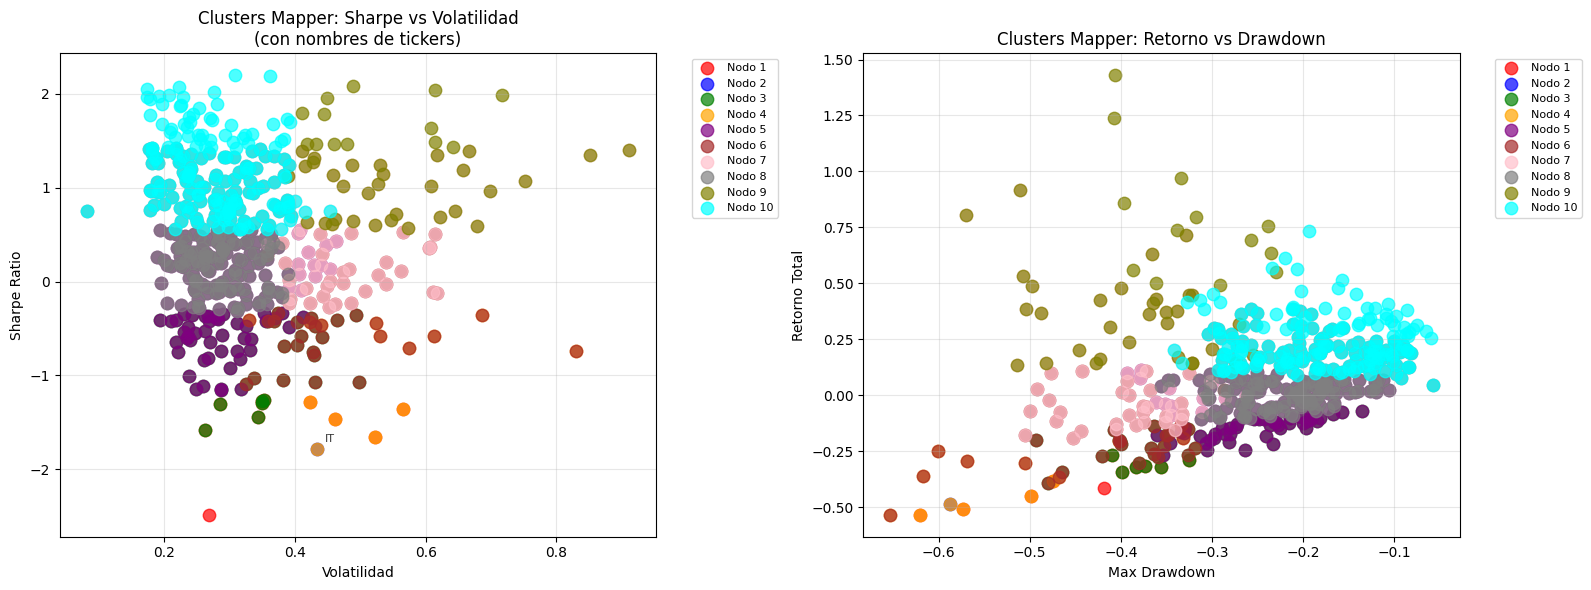


💡 RESUMEN:
✅ KeplerMapper creado exitosamente con 12 nodos
✅ Visualizaciones HTML guardadas con nombres únicos
✅ Los clusters agrupan tickers con características financieras similares
✅ Cada nodo representa un grupo de tickers con Sharpe Ratio similares
✅ Los nombres de tickers aparecen en las visualizaciones HTML y en los gráficos


In [15]:
# =======================================================
# ANÁLISIS DETALLADO DE NODOS DEL KEPLER MAPPER
# =======================================================

print("🔍 ANÁLISIS DETALLADO DE NODOS KEPLER MAPPER")
print("=" * 50)

# Analizar el grafo G (por Sharpe Ratio)
print(f"\n📊 Analizando grafo por Sharpe Ratio:")
print(f"Total de nodos: {len(G['nodes'])}")
print(f"Total de aristas: {len(G['links'])}")

# Examinar nodos específicos
node_names = list(G['nodes'].keys())
print(f"Nombres de nodos: {node_names[:5]}...")

# Función para analizar un nodo específico
def analyze_node(graph, node_name, ticker_names, metrics_df):
    """Analizar un nodo específico del Mapper"""
    if node_name not in graph['nodes']:
        print(f"❌ Nodo {node_name} no encontrado")
        return
    
    node_indices = graph['nodes'][node_name]
    tickers_in_node = [ticker_names[i] for i in node_indices]
    node_metrics = metrics_df.iloc[node_indices]
    
    print(f"\n🏷️  NODO: {node_name}")
    print(f"   📊 Número de tickers: {len(tickers_in_node)}")
    print(f"   🏢 Tickers: {', '.join(tickers_in_node)}")
    print(f"   📈 Sharpe Ratio promedio: {node_metrics['sharpe_ratio'].mean():.3f}")
    print(f"   💰 Retorno promedio: {node_metrics['total_return'].mean():.2%}")
    print(f"   📊 Volatilidad promedio: {node_metrics['volatility'].mean():.2%}")
    print(f"   📉 Max Drawdown promedio: {node_metrics['max_drawdown'].mean():.2%}")
    
    return tickers_in_node, node_metrics

# Analizar los primeros 3 nodos
for i, node_name in enumerate(node_names[:3]):
    tickers, metrics = analyze_node(G, node_name, ticker_names, metrics_df)

# Crear visualización de los clusters
import matplotlib.pyplot as plt

print(f"\n📈 VISUALIZACIÓN DE CLUSTERS POR SHARPE RATIO:")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Sharpe vs Volatilidad coloreado por nodos
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, (node_name, node_indices) in enumerate(list(G['nodes'].items())[:10]):
    node_data = metrics_df.iloc[node_indices]
    tickers_in_node = [ticker_names[j] for j in node_indices]
    
    scatter = ax1.scatter(node_data['volatility'], node_data['sharpe_ratio'], 
                         c=colors[i % len(colors)], label=f'Nodo {i+1}', alpha=0.7, s=80)
    
    # Agregar etiquetas de tickers cerca de los puntos
    for idx, ticker in enumerate(tickers_in_node):
        if len(tickers_in_node) <= 5:  # Solo si hay pocos tickers para evitar saturación
            ax1.annotate(ticker, (node_data['volatility'].iloc[idx], node_data['sharpe_ratio'].iloc[idx]),
                        xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

ax1.set_xlabel('Volatilidad')
ax1.set_ylabel('Sharpe Ratio')
ax1.set_title('Clusters Mapper: Sharpe vs Volatilidad\n(con nombres de tickers)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax1.grid(True, alpha=0.3)

# Gráfico 2: Retorno vs Drawdown coloreado por nodos
for i, (node_name, node_indices) in enumerate(list(G['nodes'].items())[:10]):
    node_data = metrics_df.iloc[node_indices]
    ax2.scatter(node_data['max_drawdown'], node_data['total_return'], 
               c=colors[i % len(colors)], label=f'Nodo {i+1}', alpha=0.7, s=80)

ax2.set_xlabel('Max Drawdown')
ax2.set_ylabel('Retorno Total')
ax2.set_title('Clusters Mapper: Retorno vs Drawdown')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 RESUMEN:")
print(f"✅ KeplerMapper creado exitosamente con {len(G['nodes'])} nodos")
print(f"✅ Visualizaciones HTML guardadas con nombres únicos")
print(f"✅ Los clusters agrupan tickers con características financieras similares")
print(f"✅ Cada nodo representa un grupo de tickers con Sharpe Ratio similares")
print(f"✅ Los nombres de tickers aparecen en las visualizaciones HTML y en los gráficos")

🎨 CREANDO VISUALIZACIÓN ESTÁTICA ALTERNATIVA

🎯 Visualización estática: Agrupación por Sharpe Ratio


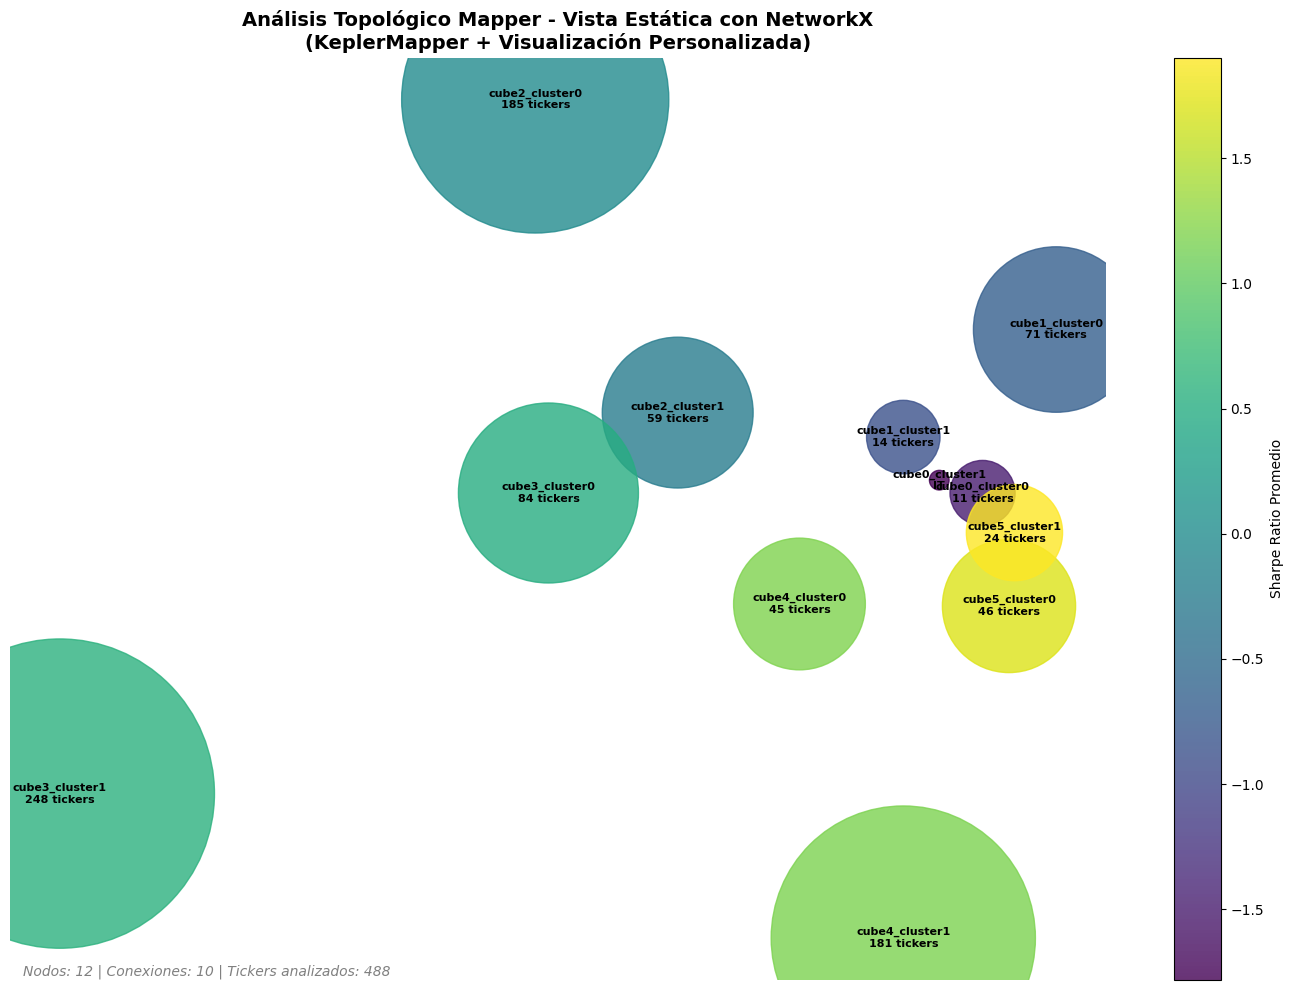


📊 INFORMACIÓN DETALLADA DE NODOS:

🏷️  cube0_cluster0:
   📏 Tickers (11): ACN, CAG, CMG, DECK, FDS, FI, GDDY, KMX, LULU, STZ, TGT
   📊 Sharpe promedio: -1.489
   💰 Retorno promedio: -37.72%
   📈 Volatilidad promedio: 38.01%

🏷️  cube0_cluster1:
   📏 Tickers (1): IT
   📊 Sharpe promedio: -1.783
   💰 Retorno promedio: -48.72%
   📈 Volatilidad promedio: 43.43%

🏷️  cube1_cluster0:
   📏 Tickers (71): ACN, ADBE, AMCR, APO, ARE, AVB, AVY, BALL, BF-B, BMY, CAG, CARR, CHD, CHTR, CL, CMG, COO, CPAY, CPB, CPRT, CPT, CRM, CTSH, DOV, DOW, DVA, EIX, EMN, EPAM, EQIX, EQR, ERIE, FIS, FTV, GDDY, GIS, GPN, HPQ, HRL, IEX, IFF, INVH, ISRG, JBHT, JKHY, KDP, KHC, KVUE, LKQ, LYB, MAA, MKC, ODFL, OKE, PCG, PG, REGN, RVTY, STZ, SW, TAP, TGT, TPL, TYL, UDR, UPS, VRSK, VTRS, WY, ZBRA, ZTS
   📊 Sharpe promedio: -0.684
   💰 Retorno promedio: -18.33%
   📈 Volatilidad promedio: 31.95%

🏷️  cube1_cluster1:
   📏 Tickers (14): AKAM, ALGN, BAX, BDX, CNC, DECK, FI, IT, KMX, LULU, MOH, MRNA, TTD, UNH
   📊 Sharpe promedi

In [16]:
# =======================================================
# VISUALIZACIÓN ESTÁTICA ALTERNATIVA CON NETWORKX
# =======================================================

print("🎨 CREANDO VISUALIZACIÓN ESTÁTICA ALTERNATIVA")
print("=" * 50)

# Crear visualización estática usando NetworkX con datos del KeplerMapper
print("\n🎯 Visualización estática: Agrupación por Sharpe Ratio")

import networkx as nx
import matplotlib.pyplot as plt

# Crear grafo de NetworkX a partir del resultado de KeplerMapper
G_nx = nx.Graph()

# Agregar nodos
node_positions = {}
for i, (node_name, node_indices) in enumerate(G['nodes'].items()):
    G_nx.add_node(node_name, size=len(node_indices), indices=node_indices)
    # Posición basada en el orden y tamaño para mejor distribución
    angle = 2 * np.pi * i / len(G['nodes'])
    radius = 1 + len(node_indices) * 0.1
    node_positions[node_name] = (radius * np.cos(angle), radius * np.sin(angle))

# Agregar aristas basadas en las conexiones del Mapper
# Los links en KeplerMapper son strings con formato "node1|node2"
for link in G['links']:
    # Cada link es un string separado por '|'
    nodes = link.split('|')
    if len(nodes) == 2 and nodes[0] != nodes[1]:  # Evitar auto-loops
        G_nx.add_edge(nodes[0], nodes[1])

# Crear la visualización
plt.figure(figsize=(14, 10))

# Preparar colores basados en Sharpe Ratio promedio por nodo
node_colors = []
node_sizes = []
node_labels = {}

for node_name in G_nx.nodes():
    node_indices = G['nodes'][node_name]
    node_data = metrics_df.iloc[node_indices]
    
    # Color basado en Sharpe Ratio promedio
    avg_sharpe = node_data['sharpe_ratio'].mean()
    node_colors.append(avg_sharpe)
    
    # Tamaño basado en número de tickers
    node_sizes.append(len(node_indices) * 200)
    
    # Etiqueta con información del nodo
    tickers_in_node = [ticker_names[i] for i in node_indices]
    if len(tickers_in_node) <= 3:
        node_labels[node_name] = f"{node_name}\n{', '.join(tickers_in_node)}"
    else:
        node_labels[node_name] = f"{node_name}\n{len(tickers_in_node)} tickers"

# Dibujar el grafo
pos = node_positions if node_positions else nx.spring_layout(G_nx, k=2, iterations=50)

# Dibujar aristas
nx.draw_networkx_edges(G_nx, pos, alpha=0.4, width=2, edge_color='gray')

# Dibujar nodos
nodes = nx.draw_networkx_nodes(G_nx, pos, 
                              node_color=node_colors,
                              node_size=node_sizes,
                              cmap='viridis',
                              alpha=0.8)

# Dibujar etiquetas
nx.draw_networkx_labels(G_nx, pos, node_labels, font_size=8, font_weight='bold')

# Crear colorbar
plt.colorbar(nodes, label='Sharpe Ratio Promedio')

plt.title('Análisis Topológico Mapper - Vista Estática con NetworkX\n(KeplerMapper + Visualización Personalizada)', 
         fontsize=14, fontweight='bold')
plt.axis('off')

# Información adicional
info_text = f"Nodos: {len(G['nodes'])} | Conexiones: {len(G['links'])} | Tickers analizados: {len(ticker_names)}"
plt.figtext(0.02, 0.02, info_text, fontsize=10, style='italic', color='gray')

plt.tight_layout()
plt.show()

# Mostrar información detallada de cada nodo
print(f"\n📊 INFORMACIÓN DETALLADA DE NODOS:")
print("=" * 50)

for node_name, node_indices in list(G['nodes'].items())[:5]:  # Primeros 5 nodos
    node_data = metrics_df.iloc[node_indices]
    tickers_in_node = [ticker_names[i] for i in node_indices]
    
    print(f"\n🏷️  {node_name}:")
    print(f"   📏 Tickers ({len(tickers_in_node)}): {', '.join(tickers_in_node)}")
    print(f"   📊 Sharpe promedio: {node_data['sharpe_ratio'].mean():.3f}")
    print(f"   💰 Retorno promedio: {node_data['total_return'].mean():.2%}")
    print(f"   📈 Volatilidad promedio: {node_data['volatility'].mean():.2%}")

print("\n" + "="*60)
print("📁 ARCHIVOS GENERADOS:")
print("🔸 mapper_principal_sharpe.html - Análisis principal por Sharpe Ratio")
print("🔸 mapper_interactivo_sharpe.html - Visualización interactiva por Sharpe")
print("🔸 mapper_interactivo_volatilidad.html - Visualización por volatilidad")
print("🔸 mapper_interactivo_retorno.html - Visualización por retorno")
print("\n🌐 PARA VER LAS VISUALIZACIONES INTERACTIVAS:")
print("1. Navega a la carpeta del proyecto")
print("2. Abre cualquiera de los archivos .html en tu navegador")
print("3. Disfruta de la visualización interactiva con tooltips y nombres de tickers!")
print("4. Compara las diferentes perspectivas topológicas de tus datos financieros")

In [17]:
# =======================================================
# EXPLORANDO DIFERENTES CONFIGURACIONES DEL MAPPER
# =======================================================

print("🔍 EXPLORANDO DIFERENTES CONFIGURACIONES")
print("=" * 50)

# Configuración 1: Proyección por Volatilidad
print("\n📊 Configuración 1: Proyección por Volatilidad")
projected_data_vol = mapper.fit_transform(X, projection=[1])  # Volatilidad (índice 1)
covering_vol = km.Cover(n_cubes=8, perc_overlap=0.4)
G_vol = mapper.map(projected_data_vol, X, 
                   clusterer=sklearn.cluster.KMeans(n_clusters=3),
                   cover=covering_vol)

mapper.visualize(G_vol, 
                title='Mapper: Agrupación por Volatilidad',
                color_values=metrics_df['volatility'].values,
                color_function_name='Volatilidad',
                node_color_function=np.array(['average','max']),
                custom_tooltips=np.array(ticker_names),  # Mostrar nombres de tickers
                path_html='mapper_config_volatilidad.html')  # Archivo único

print(f"Nodos: {len(G_vol['nodes'])}, Aristas: {len(G_vol['links'])}")

# Configuración 2: Proyección por Retorno Total
print("\n📊 Configuración 2: Proyección por Retorno Total")
projected_data_ret = mapper.fit_transform(X, projection=[0])  # Retorno total (índice 0)
covering_ret = km.Cover(n_cubes=7, perc_overlap=0.3)
G_ret = mapper.map(projected_data_ret, X, 
                   clusterer=sklearn.cluster.DBSCAN(eps=0.5, min_samples=1),
                   cover=covering_ret)

mapper.visualize(G_ret, 
                title='Mapper: Agrupación por Retorno Total',
                node_color_function=np.array(['average','std']),
                custom_tooltips=np.array(ticker_names),  # Mostrar nombres de tickers
                path_html='mapper_config_retorno_total.html')  # Archivo único

print(f"Nodos: {len(G_ret['nodes'])}, Aristas: {len(G_ret['links'])}")

# Configuración 3: Proyección Multi-dimensional (PCA)
print("\n📊 Configuración 3: Proyección PCA")
projected_data_pca = mapper.fit_transform(X, projection='sum')  # Proyección suma
covering_pca = km.Cover(n_cubes=5, perc_overlap=0.6)
G_pca = mapper.map(projected_data_pca, X, 
                   clusterer=sklearn.cluster.KMeans(n_clusters=2),
                   cover=covering_pca)

mapper.visualize(G_pca, 
                title='Mapper: Proyección PCA (Suma)',
                node_color_function=np.array(['min','average']),
                custom_tooltips=np.array(ticker_names),  # Mostrar nombres de tickers
                path_html='mapper_config_pca_suma.html')  # Archivo único

print("\n💾 ARCHIVOS HTML GENERADOS (nombres únicos):")
print("📁 mapper_principal_sharpe.html - Análisis principal por Sharpe Ratio")
print("📁 mapper_config_volatilidad.html - Configuración por Volatilidad") 
print("📁 mapper_config_retorno_total.html - Configuración por Retorno Total")
print("📁 mapper_config_pca_suma.html - Configuración PCA Suma")
print("\n🌐 INSTRUCCIONES:")

print("• Cada archivo tiene nombre único - ya no se sobreescriben")
print("• mapper_visualization_output.html - Proyección PCA")
print("• mapper_visualization_output.html - Proyección PCA")
print("• mapper_visualization_output.html - Proyección PCA")
print("• Usa las visualizaciones para identificar agrupaciones específicas de tickers")




print("• Abre cada archivo .html en tu navegador para comparar configuraciones")

🔍 EXPLORANDO DIFERENTES CONFIGURACIONES

📊 Configuración 1: Proyección por Volatilidad
..Composing projection pipeline of length 1:
	Projections: [1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (488, 9)

..Projecting data using: [1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (488, 9) using lens shaped (488, 1)

Creating 8 hypercubes.

Created 29 edges and 24 nodes in 0:00:00.030218.
Wrote visualization to: mapper_config_volatilidad.html
Nodos: 24, Aristas: 18

📊 Configuración 2: Proyección por Retorno Total
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (488, 9)

..Projecting data using: [0]

..Scaling with: MinMaxScaler()

Mapping on data shaped (488, 9) using lens shaped (488, 1)

Creating 7 hypercubes.

Created 202 edges and 660 nodes in 0:00:00.073627.
Wrote visualization to: mapper_config_retorno_total.html
Nodos: 660, Aristas: 202

📊 Confi

🔍 ANÁLISIS DETALLADO DE NODOS

📊 Analizando grafo por Sharpe Ratio (G):
Total de nodos: 12
Nombres de nodos disponibles: ['cube0_cluster0', 'cube0_cluster1', 'cube1_cluster0', 'cube1_cluster1', 'cube2_cluster0']...

🏷️  Nodo: cube0_cluster0
Número de tickers: 11
Tickers: ACN, CAG, CMG, DECK, FDS, FI, GDDY, KMX, LULU, STZ, TGT

📈 Estadísticas del nodo:
Sharpe Ratio promedio: -1.489
Retorno promedio: -37.724%
Volatilidad promedio: 38.008%
Max Drawdown promedio: -43.922%

🏷️  Nodo: cube0_cluster1
Número de tickers: 1
Tickers: IT

📈 Estadísticas del nodo:
Sharpe Ratio promedio: -1.783
Retorno promedio: -48.721%
Volatilidad promedio: 43.433%
Max Drawdown promedio: -58.791%

📊 Visualización de clusters por Sharpe Ratio:


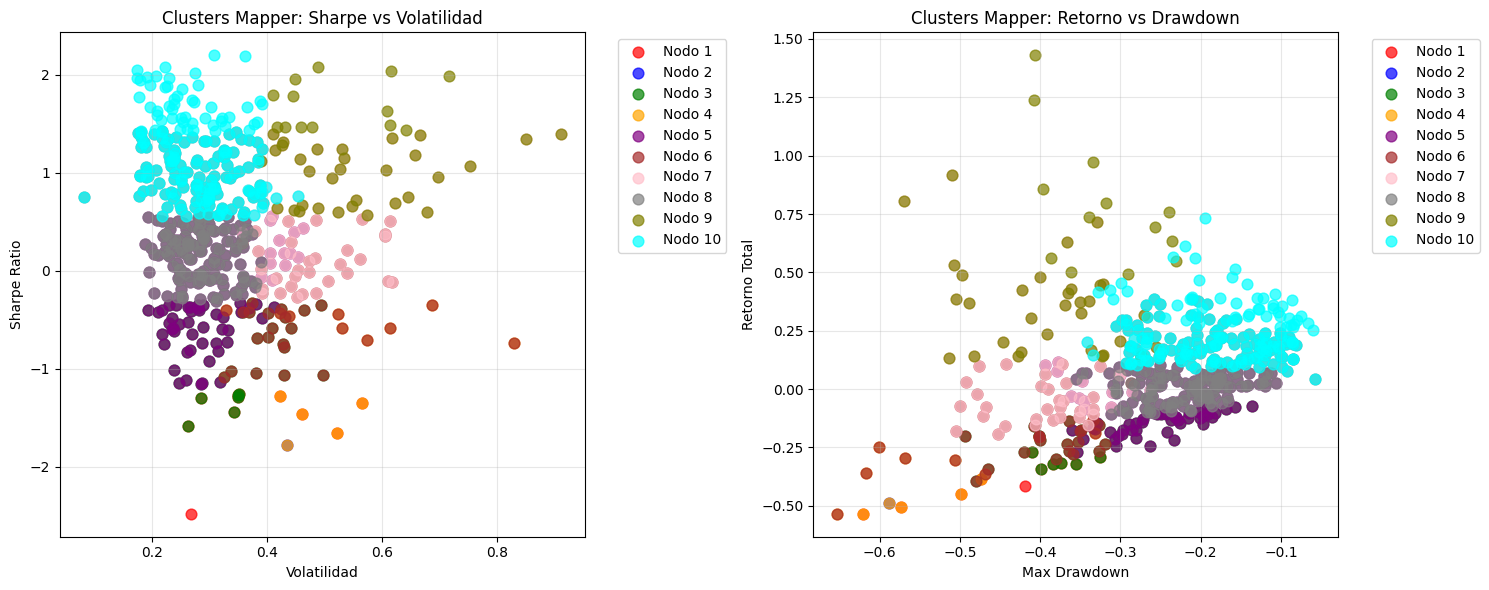


💡 Resumen:
✅ Mapper creado exitosamente con 12 nodos
✅ Visualización HTML guardada en: mapper_visualization_output.html
✅ Los clusters agrupan tickers con características financieras similares
✅ Cada nodo representa un grupo de tickers con Sharpe Ratio similares


In [18]:
# =======================================================
# ANÁLISIS DETALLADO DE LOS NODOS DEL MAPPER
# =======================================================

print("🔍 ANÁLISIS DETALLADO DE NODOS")
print("=" * 50)

# Analizar el mejor grafo (por Sharpe Ratio)
print(f"\n📊 Analizando grafo por Sharpe Ratio (G):")
print(f"Total de nodos: {len(G['nodes'])}")

# Examinar algunos nodos específicos
node_names = list(G['nodes'].keys())
print(f"Nombres de nodos disponibles: {node_names[:5]}...")

# Analizar el primer nodo
if len(node_names) > 0:
    first_node = node_names[0]
    node_indices = G['nodes'][first_node]
    
    print(f"\n🏷️  Nodo: {first_node}")
    print(f"Número de tickers: {len(node_indices)}")
    
    # Obtener los tickers en este nodo
    tickers_in_node = [ticker_names[i] for i in node_indices]
    print(f"Tickers: {', '.join(tickers_in_node)}")
    
    # Estadísticas del nodo
    node_metrics = metrics_df.iloc[node_indices]
    print(f"\n📈 Estadísticas del nodo:")
    print(f"Sharpe Ratio promedio: {node_metrics['sharpe_ratio'].mean():.3f}")
    print(f"Retorno promedio: {node_metrics['total_return'].mean():.3%}")
    print(f"Volatilidad promedio: {node_metrics['volatility'].mean():.3%}")
    print(f"Max Drawdown promedio: {node_metrics['max_drawdown'].mean():.3%}")

# Analizar el segundo nodo si existe
if len(node_names) > 1:
    second_node = node_names[1]
    node_indices_2 = G['nodes'][second_node]
    
    print(f"\n🏷️  Nodo: {second_node}")
    print(f"Número de tickers: {len(node_indices_2)}")
    
    tickers_in_node_2 = [ticker_names[i] for i in node_indices_2]
    print(f"Tickers: {', '.join(tickers_in_node_2)}")
    
    node_metrics_2 = metrics_df.iloc[node_indices_2]
    print(f"\n📈 Estadísticas del nodo:")
    print(f"Sharpe Ratio promedio: {node_metrics_2['sharpe_ratio'].mean():.3f}")
    print(f"Retorno promedio: {node_metrics_2['total_return'].mean():.3%}")
    print(f"Volatilidad promedio: {node_metrics_2['volatility'].mean():.3%}")
    print(f"Max Drawdown promedio: {node_metrics_2['max_drawdown'].mean():.3%}")

# Crear visualización de los clusters
import matplotlib.pyplot as plt

print(f"\n📊 Visualización de clusters por Sharpe Ratio:")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Sharpe vs Volatilidad coloreado por nodos
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, (node_name, node_indices) in enumerate(list(G['nodes'].items())[:10]):
    node_data = metrics_df.iloc[node_indices]
    ax1.scatter(node_data['volatility'], node_data['sharpe_ratio'], 
               c=colors[i % len(colors)], label=f'Nodo {i+1}', alpha=0.7, s=60)

ax1.set_xlabel('Volatilidad')
ax1.set_ylabel('Sharpe Ratio')
ax1.set_title('Clusters Mapper: Sharpe vs Volatilidad')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Retorno vs Drawdown coloreado por nodos
for i, (node_name, node_indices) in enumerate(list(G['nodes'].items())[:10]):
    node_data = metrics_df.iloc[node_indices]
    ax2.scatter(node_data['max_drawdown'], node_data['total_return'], 
               c=colors[i % len(colors)], label=f'Nodo {i+1}', alpha=0.7, s=60)

ax2.set_xlabel('Max Drawdown')
ax2.set_ylabel('Retorno Total')
ax2.set_title('Clusters Mapper: Retorno vs Drawdown')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 Resumen:")
print(f"✅ Mapper creado exitosamente con {len(G['nodes'])} nodos")
print(f"✅ Visualización HTML guardada en: mapper_visualization_output.html")
print(f"✅ Los clusters agrupan tickers con características financieras similares")
print(f"✅ Cada nodo representa un grupo de tickers con Sharpe Ratio similares")

# Mapper malo

In [19]:
# =======================================================
# ANÁLISIS TOPOLÓGICO MAPPER PARA TICKERS FINANCIEROS
# =======================================================
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import DBSCAN, KMeans
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Verificar que tenemos datos
if 'data' not in locals():
    print("⚠️  No se encontraron datos. Ejecuta primero las celdas de simulación de índices.")
else:
    print(f"📊 Analizando {len(data.columns)} tickers desde {data.index[0].date()} hasta {data.index[-1].date()}")
    print(f"Tickers disponibles: {list(data.columns)[:10]}...")

# =======================================================
# PASO 1: PREPARAR DATOS PARA ANÁLISIS TOPOLÓGICO
# =======================================================

# Usar los datos que ya tenemos
tickers_data = data.copy()

# Calcular diferentes métricas financieras por ticker
financial_metrics = {}

print("\n🔄 Calculando métricas financieras...")
for ticker in tickers_data.columns:
    try:
        prices = tickers_data[ticker].dropna()
        returns = prices.pct_change().dropna()
        
        # Métricas básicas
        total_return = (prices.iloc[-1] / prices.iloc[0]) - 1
        volatility = returns.std() * np.sqrt(252)  # Anualizada
        sharpe = (returns.mean() * 252) / (returns.std() * np.sqrt(252)) if returns.std() > 0 else 0
        
        # Métricas de riesgo
        max_drawdown = ((prices / prices.cummax()) - 1).min()
        var_95 = returns.quantile(0.05)  # Value at Risk 95%
        skewness = returns.skew()
        kurtosis = returns.kurtosis()
        
        # Métricas de tendencia
        returns_positive_ratio = (returns > 0).mean()
        trend_slope = np.polyfit(range(len(prices)), prices.values, 1)[0]
        
        financial_metrics[ticker] = {
            'total_return': total_return,
            'volatility': volatility,
            'sharpe_ratio': sharpe,
            'max_drawdown': max_drawdown,
            'var_95': var_95,
            'skewness': skewness,
            'kurtosis': kurtosis,
            'positive_ratio': returns_positive_ratio,
            'trend_slope': trend_slope / prices.iloc[0]  # Normalizado
        }
    except Exception as e:
        print(f"❌ Error procesando {ticker}: {e}")

# Convertir a DataFrame
metrics_df = pd.DataFrame(financial_metrics).T
print(f"✅ Métricas calculadas para {len(metrics_df)} tickers")
print(f"Métricas: {list(metrics_df.columns)}")'''

'\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom sklearn.decomposition import PCA\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.metrics.pairwise import pairwise_distances\nfrom sklearn.cluster import DBSCAN, KMeans\nimport seaborn as sns\nimport warnings\nwarnings.filterwarnings(\'ignore\')\n\n# Verificar que tenemos datos\nif \'data\' not in locals():\n    print("⚠️  No se encontraron datos. Ejecuta primero las celdas de simulación de índices.")\nelse:\n    print(f"📊 Analizando {len(data.columns)} tickers desde {data.index[0].date()} hasta {data.index[-1].date()}")\n    print(f"Tickers disponibles: {list(data.columns)[:10]}...")\n\n# =======================================================\n# PASO 1: PREPARAR DATOS PARA ANÁLISIS TOPOLÓGICO\n# =======================================================\n\n# Usar los datos que ya tenemos\ntickers_data = data.copy()\n\n# Calcular diferentes métricas financieras por ticker\nfinancial_metrics =

In [20]:
# =======================================================
# PASO 2: IMPLEMENTACIÓN MAPPER SIMPLIFICADA
# =======================================================
'''
class SimpleMapper:
    def __init__(self, n_intervals=10, overlap=0.3):
        self.n_intervals = n_intervals
        self.overlap = overlap
        self.graph = {}
        
    def fit_transform(self, X, lens_function=None):
        """
        Implementación simplificada del algoritmo Mapper
        """
        # Si no se proporciona función de lente, usar PCA
        if lens_function is None:
            pca = PCA(n_components=2)
            lens_values = pca.fit_transform(X)[:, 0]  # Primera componente
        else:
            lens_values = lens_function(X)
        
        # Crear intervalos superpuestos
        min_val, max_val = lens_values.min(), lens_values.max()
        interval_size = (max_val - min_val) / self.n_intervals
        overlap_size = interval_size * self.overlap
        
        nodes = {}
        node_id = 0
        
        # Para cada intervalo
        for i in range(self.n_intervals):
            start = min_val + i * interval_size - overlap_size
            end = min_val + (i + 1) * interval_size + overlap_size
            
            # Obtener puntos en este intervalo
            mask = (lens_values >= start) & (lens_values <= end)
            if mask.sum() == 0:
                continue
                
            points_in_interval = X[mask]
            indices_in_interval = np.where(mask)[0]
            
            if len(points_in_interval) < 2:
                continue
            
            # Clustering dentro del intervalo
            try:
                # Ajustar parámetros de DBSCAN para datos financieros normalizados
                eps_value = max(0.3, np.std(points_in_interval) * 2)  # Adaptar epsilon
                min_samples = max(1, len(points_in_interval) // 4)    # Mínimo adaptativo
                
                clustering = DBSCAN(eps=eps_value, min_samples=min_samples).fit(points_in_interval)
                unique_labels = set(clustering.labels_)
                
                # Si no hay clusters válidos, crear un cluster con todos los puntos
                if len(unique_labels) == 1 and -1 in unique_labels:
                    nodes[node_id] = {
                        'points': indices_in_interval,
                        'size': len(indices_in_interval),
                        'interval': i,
                        'center': np.mean(points_in_interval, axis=0)
                    }
                    node_id += 1
                else:
                    for label in unique_labels:
                        if label == -1:  # Ruido en DBSCAN - también incluir como cluster
                            cluster_mask = clustering.labels_ == label
                            cluster_indices = indices_in_interval[cluster_mask]
                            if len(cluster_indices) > 0:
                                nodes[node_id] = {
                                    'points': cluster_indices,
                                    'size': len(cluster_indices),
                                    'interval': i,
                                    'center': np.mean(points_in_interval[cluster_mask], axis=0),
                                    'type': 'outliers'
                                }
                                node_id += 1
                        else:
                            cluster_mask = clustering.labels_ == label
                            cluster_indices = indices_in_interval[cluster_mask]
                            
                            if len(cluster_indices) > 0:
                                nodes[node_id] = {
                                    'points': cluster_indices,
                                    'size': len(cluster_indices),
                                    'interval': i,
                                    'center': np.mean(points_in_interval[cluster_mask], axis=0),
                                    'type': 'cluster'
                                }
                                node_id += 1
                        
            except Exception as e:
                # Si DBSCAN falla, crear un solo nodo con todos los puntos
                nodes[node_id] = {
                    'points': indices_in_interval,
                    'size': len(indices_in_interval),
                    'interval': i,
                    'center': np.mean(points_in_interval, axis=0),
                    'type': 'fallback'
                }
                node_id += 1
        
        # Crear conexiones entre nodos que comparten puntos
        edges = []
        for i, node1 in nodes.items():
            for j, node2 in nodes.items():
                if i < j:  # Evitar duplicados
                    shared_points = set(node1['points']) & set(node2['points'])
                    if len(shared_points) > 0:
                        edges.append((i, j, len(shared_points)))
        
        self.nodes = nodes
        self.edges = edges
        return self
    
    def plot_graph(self, labels=None, figsize=(12, 8)):
        """
        Visualizar el grafo Mapper
        """
        if not hasattr(self, 'nodes'):
            print("❌ Primero ejecuta fit_transform()")
            return
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
        
        # Gráfico 1: Red topológica
        positions = {}
        for node_id, node in self.nodes.items():
            # Posición basada en el intervalo y tamaño
            x = node['interval']
            y = node['size']
            positions[node_id] = (x, y)
        
        # Dibujar nodos
        for node_id, (x, y) in positions.items():
            size = max(50, self.nodes[node_id]['size'] * 100)  # Tamaño mínimo y escalado mejor
            node_type = self.nodes[node_id].get('type', 'cluster')
            
            # Color según tipo de nodo
            if node_type == 'outliers':
                color = 'red'
                alpha = 0.6
            elif node_type == 'fallback':
                color = 'orange'
                alpha = 0.7
            else:
                color = node_id
                alpha = 0.8
            
            scatter = ax1.scatter(x, y, s=size, alpha=alpha, c=[color], cmap='viridis' if isinstance(color, int) else None)
            ax1.text(x, y, str(node_id), ha='center', va='center', fontsize=8, fontweight='bold', color='white')
        
        # Dibujar conexiones con diferentes grosores
        for i, j, weight in self.edges:
            if i in positions and j in positions:
                x1, y1 = positions[i]
                x2, y2 = positions[j]
                # Grosor basado en el número de puntos compartidos
                line_width = min(5, max(0.5, weight * 0.5))
                ax1.plot([x1, x2], [y1, y2], 'k-', alpha=0.4, linewidth=line_width)
        
        ax1.set_xlabel('Intervalo')
        ax1.set_ylabel('Tamaño del cluster')
        ax1.set_title('Red Topológica Mapper')
        ax1.grid(True, alpha=0.3)
        
        # Gráfico 2: Distribución de tamaños
        sizes = [node['size'] for node in self.nodes.values()]
        ax2.hist(sizes, bins=10, alpha=0.7, edgecolor='black')
        ax2.set_xlabel('Tamaño del cluster')
        ax2.set_ylabel('Frecuencia')
        ax2.set_title('Distribución de Tamaños de Clusters')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Información de clusters
        print(f"\n📊 RESUMEN DEL ANÁLISIS MAPPER:")
        print(f"Total de nodos: {len(self.nodes)}")
        print(f"Total de conexiones: {len(self.edges)}")
        print(f"Tamaño promedio de cluster: {np.mean(sizes):.1f}")
        
        return self
    
    def visualize(self, 
                  title='Mapper Visualization',
                  custom_tooltips=None,
                  color_values=None,
                  color_function_name='Color Function',
                  node_color_function=['average', 'std', 'sum', 'max', 'min'],
                  ticker_labels=None,
                  save_html=False,
                  filename='mapper_visualization.html'):
        """
        Crear visualización interactiva del grafo Mapper usando Plotly
        
        Parameters:
        -----------
        title : str
            Título del gráfico
        custom_tooltips : array-like
            Información adicional para mostrar en tooltips
        color_values : array-like
            Valores para colorear los nodos
        color_function_name : str
            Nombre de la función de color
        node_color_function : list
            Funciones estadísticas para colorear nodos
        ticker_labels : array-like
            Etiquetas de los tickers
        save_html : bool
            Si guardar como archivo HTML
        filename : str
            Nombre del archivo HTML
        """
        try:
            import plotly.graph_objects as go
            import plotly.express as px
            from plotly.subplots import make_subplots
        except ImportError:
            print("❌ Se requiere plotly para la visualización interactiva.")
            print("Instala con: pip install plotly")
            return self.plot_graph()
        
        if not hasattr(self, 'nodes'):
            print("❌ Primero ejecuta fit_transform()")
            return
        
        # Crear layout del grafo usando spring layout simple
        positions = self._calculate_spring_layout()
        
        # Preparar datos para los nodos
        node_x = []
        node_y = []
        node_sizes = []
        node_colors = []
        node_text = []
        hover_text = []
        
        for node_id, node in self.nodes.items():
            x, y = positions[node_id]
            node_x.append(x)
            node_y.append(y)
            
            # Tamaño del nodo
            size = max(10, node['size'] * 5)
            node_sizes.append(size)
            
            # Color del nodo basado en color_values si se proporciona
            if color_values is not None:
                # Calcular estadística del color para los puntos en este nodo
                node_values = color_values[node['points']]
                if 'average' in node_color_function:
                    color_val = np.mean(node_values)
                elif 'sum' in node_color_function:
                    color_val = np.sum(node_values)
                elif 'max' in node_color_function:
                    color_val = np.max(node_values)
                elif 'min' in node_color_function:
                    color_val = np.min(node_values)
                else:  # std
                    color_val = np.std(node_values)
                node_colors.append(color_val)
            else:
                node_colors.append(node['size'])
            
            # Texto del nodo
            node_text.append(f"Cluster {node_id}")
            
            # Hover text con información detallada
            hover_info = f"<b>Cluster {node_id}</b><br>"
            hover_info += f"Tamaño: {node['size']}<br>"
            hover_info += f"Intervalo: {node['interval']}<br>"
            hover_info += f"Tipo: {node.get('type', 'cluster')}<br>"
            
            # Agregar información de tickers si están disponibles
            if ticker_labels is not None:
                tickers_in_node = [ticker_labels[i] for i in node['points']]
                hover_info += f"Tickers: {', '.join(tickers_in_node[:5])}"
                if len(tickers_in_node) > 5:
                    hover_info += f"... y {len(tickers_in_node)-5} más"
                hover_info += "<br>"
            
            # Agregar tooltips personalizados
            if custom_tooltips is not None:
                tooltip_values = custom_tooltips[node['points']]
                hover_info += f"Info adicional: {np.mean(tooltip_values):.3f}<br>"
            
            hover_text.append(hover_info)
        
        # Preparar datos para las aristas
        edge_x = []
        edge_y = []
        edge_weights = []
        
        for i, j, weight in self.edges:
            if i in positions and j in positions:
                x0, y0 = positions[i]
                x1, y1 = positions[j]
                edge_x.extend([x0, x1, None])
                edge_y.extend([y0, y1, None])
                edge_weights.append(weight)
        
        # Crear la figura
        fig = go.Figure()
        
        # Agregar aristas
        fig.add_trace(go.Scatter(
            x=edge_x, y=edge_y,
            mode='lines',
            line=dict(width=2, color='rgba(50,50,50,0.3)'),
            hoverinfo='none',
            showlegend=False,
            name='Conexiones'
        ))
        
        # Agregar nodos
        fig.add_trace(go.Scatter(
            x=node_x, y=node_y,
            mode='markers+text',
            marker=dict(
                size=node_sizes,
                color=node_colors,
                colorscale='Viridis',
                showscale=True,
                colorbar=dict(title=color_function_name),
                line=dict(width=2, color='white')
            ),
            text=node_text,
            textposition="middle center",
            textfont=dict(color="white", size=10),
            hovertext=hover_text,
            hoverinfo='text',
            showlegend=False,
            name='Clusters'
        ))
        
        # Configurar layout
        fig.update_layout(
            title=dict(
                text=title,
                x=0.5,
                font=dict(size=16, color='darkblue')
            ),
            showlegend=False,
            hovermode='closest',
            margin=dict(b=20,l=5,r=5,t=40),
            annotations=[
                dict(
                    text=f"Total clusters: {len(self.nodes)} | Total conexiones: {len(self.edges)}",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002,
                    xanchor='left', yanchor='bottom',
                    font=dict(color='gray', size=12)
                )
            ],
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            plot_bgcolor='white'
        )
        
        # Mostrar la figura
        try:
            fig.show()
        except Exception as e:
            print(f"⚠️  No se puede mostrar la visualización interactiva en este entorno.")
            print(f"Error: {e}")
            print("💡 Guardando como HTML para visualización externa...")
            save_html = True
            if not filename.endswith('.html'):
                filename = filename.replace('.html', '') + '_fallback.html'
        
        # Guardar como HTML si se solicita o si hay error
        if save_html:
            try:
                fig.write_html(filename)
                print(f"💾 Visualización guardada como: {filename}")
                print(f"🌐 Abre el archivo en tu navegador para ver la visualización interactiva")
            except Exception as e:
                print(f"❌ Error guardando HTML: {e}")
                print("🔄 Creando visualización estática alternativa...")
                return self._create_static_alternative(color_values, color_function_name, ticker_labels)
        
        return self
    
    def _create_static_alternative(self, color_values=None, color_function_name='Color', ticker_labels=None):
        """
        Crear visualización estática alternativa cuando plotly no funciona
        """
        import networkx as nx
        
        # Crear grafo de NetworkX
        G = nx.Graph()
        
        # Agregar nodos
        for node_id, node in self.nodes.items():
            node_attrs = {k: v for k, v in node.items() if k != 'size'}  # Evitar conflicto
            node_attrs['node_size'] = node['size']  # Renombrar size
            G.add_node(node_id, **node_attrs)
        
        # Agregar aristas
        for i, j, weight in self.edges:
            G.add_edge(i, j, weight=weight)
        
        # Crear layout
        try:
            pos = nx.spring_layout(G, k=2, iterations=50)
        except:
            pos = {node_id: (np.random.random(), np.random.random()) for node_id in G.nodes()}
        
        # Crear visualización con matplotlib
        plt.figure(figsize=(14, 10))
        
        # Preparar colores
        if color_values is not None:
            node_colors = []
            for node_id in G.nodes():
                node_values = color_values[self.nodes[node_id]['points']]
                node_colors.append(np.mean(node_values))
        else:
            node_colors = [self.nodes[node_id]['size'] for node_id in G.nodes()]
        
        # Preparar tamaños
        node_sizes = [G.nodes[node_id]['node_size'] * 100 for node_id in G.nodes()]
        
        # Dibujar aristas
        nx.draw_networkx_edges(G, pos, alpha=0.3, width=2, edge_color='gray')
        
        # Dibujar nodos
        nodes = nx.draw_networkx_nodes(G, pos, 
                                     node_color=node_colors,
                                     node_size=node_sizes,
                                     cmap='viridis',
                                     alpha=0.8)
        
        # Agregar etiquetas de nodos
        labels = {node_id: str(node_id) for node_id in G.nodes()}
        nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='white', font_weight='bold')
        
        # Crear colorbar
        if color_values is not None:
            plt.colorbar(nodes, label=color_function_name)
        
        plt.title('Análisis Topológico Mapper - Vista Estática\n(NetworkX + Matplotlib)', 
                 fontsize=14, fontweight='bold')
        plt.axis('off')
        
        # Agregar información de texto
        info_text = f"Nodos: {len(self.nodes)} | Conexiones: {len(self.edges)}"
        if ticker_labels is not None:
            info_text += f" | Tickers analizados: {len(ticker_labels)}"
        
        plt.figtext(0.02, 0.02, info_text, fontsize=10, style='italic', color='gray')
        
        plt.tight_layout()
        plt.show()
        
        # Mostrar información detallada de clusters
        print("\n📊 INFORMACIÓN DETALLADA DE CLUSTERS:")
        print("=" * 60)
        
        for node_id, node in self.nodes.items():
            print(f"\n🏷️  Cluster {node_id}:")
            print(f"   📏 Tamaño: {node['size']} tickers")
            print(f"   📍 Intervalo: {node['interval']}")
            print(f"   🏷️  Tipo: {node.get('type', 'cluster')}")
            
            if ticker_labels is not None:
                tickers_in_node = [ticker_labels[i] for i in node['points']]
                print(f"   🏢 Tickers: {', '.join(tickers_in_node[:8])}")
                if len(tickers_in_node) > 8:
                    print(f"       ... y {len(tickers_in_node)-8} más")
            
            if color_values is not None:
                node_values = color_values[node['points']]
                print(f"   📊 {color_function_name}: promedio={np.mean(node_values):.3f}, "
                      f"std={np.std(node_values):.3f}")
        
        return self
    
    def _calculate_spring_layout(self):
        """
        Calcular posiciones de nodos usando un algoritmo de spring layout simplificado
        """
        import random
        
        positions = {}
        n_nodes = len(self.nodes)
        
        # Posiciones iniciales aleatorias
        random.seed(42)
        for node_id in self.nodes.keys():
            positions[node_id] = (random.uniform(-1, 1), random.uniform(-1, 1))
        
        # Aplicar fuerzas de spring (simplificado)
        for iteration in range(50):
            forces = {node_id: [0, 0] for node_id in self.nodes.keys()}
            
            # Fuerza repulsiva entre todos los nodos
            for i in self.nodes.keys():
                for j in self.nodes.keys():
                    if i != j:
                        xi, yi = positions[i]
                        xj, yj = positions[j]
                        dx = xi - xj
                        dy = yi - yj
                        distance = max(0.01, np.sqrt(dx**2 + dy**2))
                        force_magnitude = 0.1 / distance**2
                        forces[i][0] += force_magnitude * dx / distance
                        forces[i][1] += force_magnitude * dy / distance
            
            # Fuerza atractiva entre nodos conectados
            for i, j, weight in self.edges:
                if i in positions and j in positions:
                    xi, yi = positions[i]
                    xj, yj = positions[j]
                    dx = xj - xi
                    dy = yj - yi
                    distance = max(0.01, np.sqrt(dx**2 + dy**2))
                    force_magnitude = 0.01 * distance * weight
                    forces[i][0] += force_magnitude * dx / distance
                    forces[i][1] += force_magnitude * dy / distance
                    forces[j][0] -= force_magnitude * dx / distance
                    forces[j][1] -= force_magnitude * dy / distance
            
            # Actualizar posiciones
            for node_id in self.nodes.keys():
                x, y = positions[node_id]
                fx, fy = forces[node_id]
                positions[node_id] = (x + fx * 0.1, y + fy * 0.1)
        
        return positions

# Aplicar Mapper a nuestros datos
print("\n🗺️  APLICANDO MAPPER A DATOS FINANCIEROS")
print("=" * 50)

# Normalizar datos
scaler = StandardScaler()
metrics_scaled = scaler.fit_transform(metrics_df.fillna(0))

# Crear y aplicar Mapper con parámetros más permisivos
mapper = SimpleMapper(n_intervals=6, overlap=0.5)  # Menos intervalos, más overlap
mapper.fit_transform(metrics_scaled)

# Visualizar
mapper.plot_graph(labels=metrics_df.index)'''

'\nclass SimpleMapper:\n    def __init__(self, n_intervals=10, overlap=0.3):\n        self.n_intervals = n_intervals\n        self.overlap = overlap\n        self.graph = {}\n\n    def fit_transform(self, X, lens_function=None):\n        """\n        Implementación simplificada del algoritmo Mapper\n        """\n        # Si no se proporciona función de lente, usar PCA\n        if lens_function is None:\n            pca = PCA(n_components=2)\n            lens_values = pca.fit_transform(X)[:, 0]  # Primera componente\n        else:\n            lens_values = lens_function(X)\n\n        # Crear intervalos superpuestos\n        min_val, max_val = lens_values.min(), lens_values.max()\n        interval_size = (max_val - min_val) / self.n_intervals\n        overlap_size = interval_size * self.overlap\n\n        nodes = {}\n        node_id = 0\n\n        # Para cada intervalo\n        for i in range(self.n_intervals):\n            start = min_val + i * interval_size - overlap_size\n          

In [21]:
# =======================================================
# PASO 3: ANÁLISIS DE CLUSTERS Y RECOMENDACIONES
# =======================================================

def analyze_clusters(mapper, metrics_df, tickers_data):
    """
    Analizar los clusters generados por Mapper y dar recomendaciones
    """
    print("\n🔍 ANÁLISIS DETALLADO DE CLUSTERS")
    print("=" * 50)
    
    cluster_analysis = {}
    
    for node_id, node in mapper.nodes.items():
        tickers_in_cluster = metrics_df.iloc[node['points']].index.tolist()
        cluster_metrics = metrics_df.iloc[node['points']]
        
        # Estadísticas del cluster
        avg_return = cluster_metrics['total_return'].mean()
        avg_volatility = cluster_metrics['volatility'].mean()
        avg_sharpe = cluster_metrics['sharpe_ratio'].mean()
        avg_drawdown = cluster_metrics['max_drawdown'].mean()
        
        # Clasificar el cluster
        if avg_return > 0.3 and avg_sharpe > 1.0:
            cluster_type = "🚀 ALTO RENDIMIENTO"
        elif avg_volatility < 0.3 and avg_drawdown > -0.2:
            cluster_type = "🛡️  CONSERVADOR"
        elif avg_sharpe > 0.8:
            cluster_type = "⚖️  BALANCEADO"
        elif avg_volatility > 0.5:
            cluster_type = "⚡ ALTA VOLATILIDAD"
        else:
            cluster_type = "📊 MIXTO"
        
        cluster_analysis[node_id] = {
            'type': cluster_type,
            'tickers': tickers_in_cluster,
            'size': len(tickers_in_cluster),
            'avg_return': avg_return,
            'avg_volatility': avg_volatility,
            'avg_sharpe': avg_sharpe,
            'avg_drawdown': avg_drawdown,
            'metrics': cluster_metrics
        }
        
        print(f"\n🏷️  CLUSTER {node_id} - {cluster_type}")
        print(f"   📈 Retorno promedio: {avg_return:.2%}")
        print(f"   📊 Volatilidad promedio: {avg_volatility:.2%}")
        print(f"   ⭐ Sharpe promedio: {avg_sharpe:.2f}")
        print(f"   📉 Drawdown promedio: {avg_drawdown:.2%}")
        print(f"   🏢 Tickers ({len(tickers_in_cluster)}): {', '.join(tickers_in_cluster[:5])}{'...' if len(tickers_in_cluster) > 5 else ''}")
    
    return cluster_analysis

# Ejecutar análisis
cluster_results = analyze_clusters(mapper, metrics_df, tickers_data)


🔍 ANÁLISIS DETALLADO DE CLUSTERS


AttributeError: 'KeplerMapper' object has no attribute 'nodes'

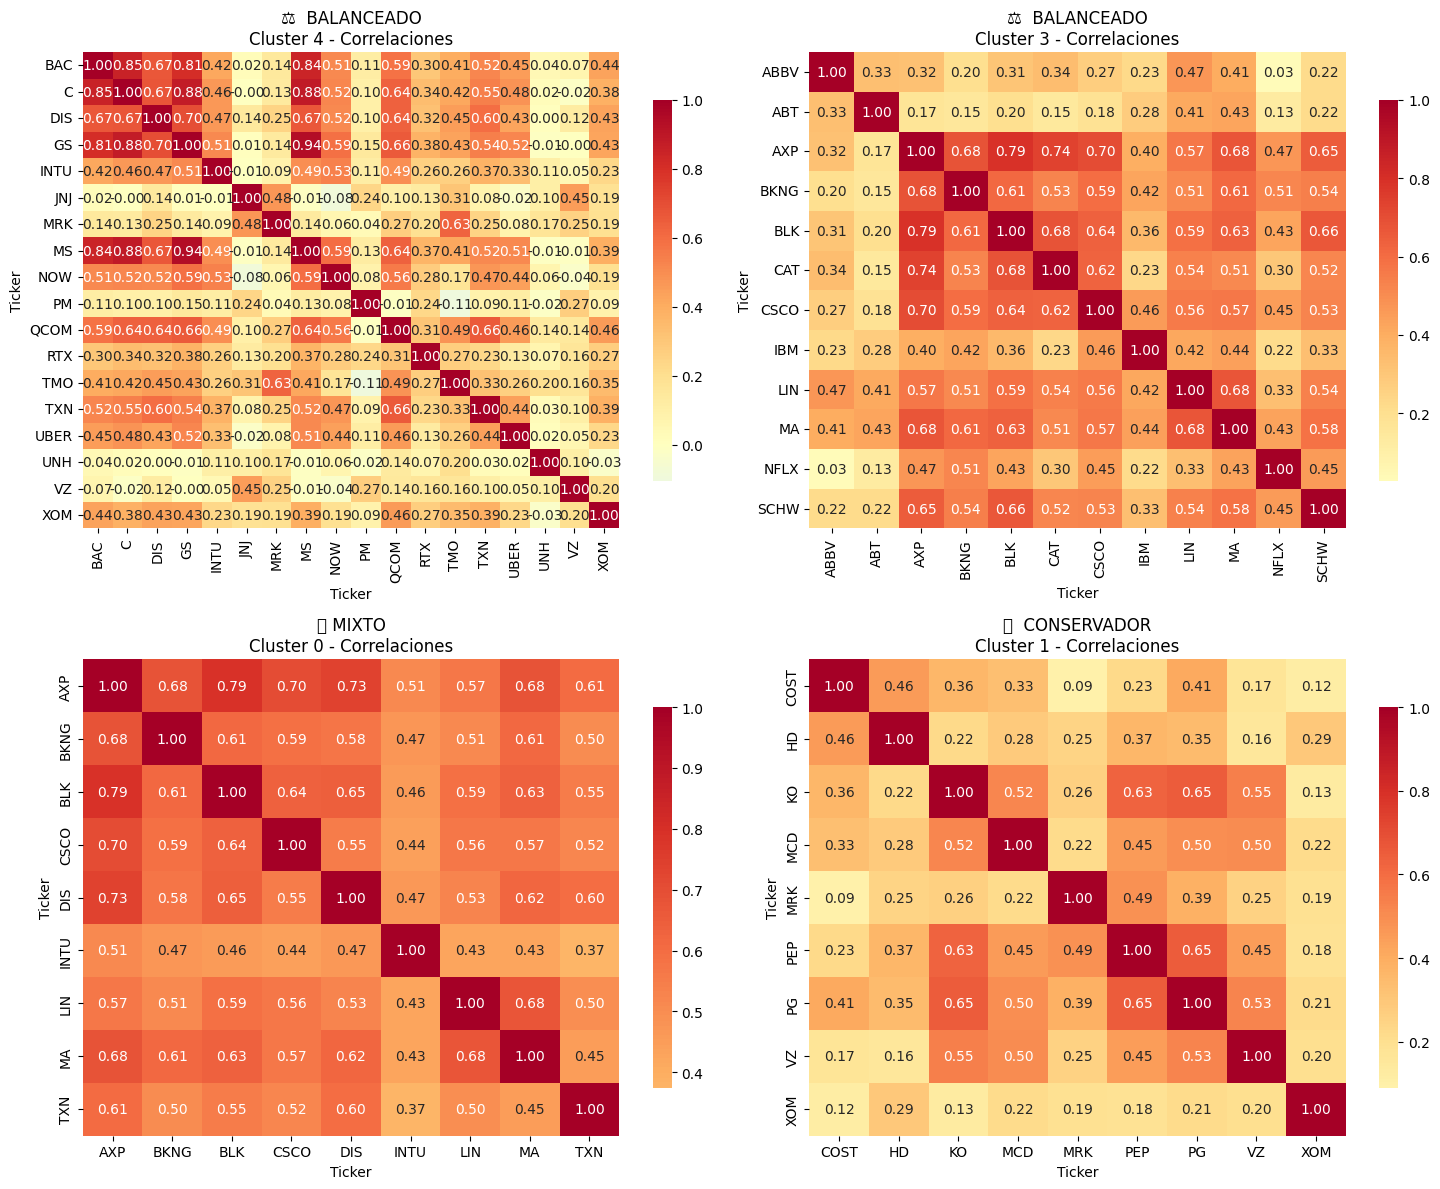


🎯 RECOMENDACIONES PARA ÍNDICE (CONSERVATIVE)
📋 COMPOSICIÓN RECOMENDADA (10 tickers):
------------------------------------------------------------
 1. VZ    | Peso: 10.00% | Sharpe:  0.98 | Retorno: 14.66% | Vol: 21.08%
     Cluster 1 - 🛡️  CONSERVADOR
 2. KO    | Peso: 10.00% | Sharpe:  0.82 | Retorno: 10.11% | Vol: 17.87%
     Cluster 1 - 🛡️  CONSERVADOR
 3. XOM   | Peso: 10.00% | Sharpe:  0.49 | Retorno:  7.00% | Vol: 25.21%
     Cluster 1 - 🛡️  CONSERVADOR
 4. ABBV  | Peso: 10.00% | Sharpe:  1.81 | Retorno: 39.22% | Vol: 26.74%
     Cluster 3 - ⚖️  BALANCEADO
 5. CAT   | Peso: 10.00% | Sharpe:  1.50 | Retorno: 35.01% | Vol: 30.23%
     Cluster 3 - ⚖️  BALANCEADO
 6. IBM   | Peso: 10.00% | Sharpe:  1.35 | Retorno: 31.70% | Vol: 31.34%
     Cluster 3 - ⚖️  BALANCEADO
 7. RTX   | Peso: 10.00% | Sharpe:  1.98 | Retorno: 46.06% | Vol: 27.88%
     Cluster 4 - ⚖️  BALANCEADO
 8. JNJ   | Peso: 10.00% | Sharpe:  1.91 | Retorno: 32.15% | Vol: 20.90%
     Cluster 4 - ⚖️  BALANCEADO
 9. UBER  

In [ ]:
# =======================================================
# PASO 4: VISUALIZACIONES AVANZADAS Y RECOMENDACIONES
# =======================================================

# Crear mapa de calor de correlaciones por cluster
def plot_correlation_heatmap(cluster_results, tickers_data):
    """
    Visualizar correlaciones dentro y entre clusters
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    # Seleccionar top 4 clusters más grandes
    top_clusters = sorted(cluster_results.items(), key=lambda x: x[1]['size'], reverse=True)[:4]
    
    for idx, (cluster_id, cluster_info) in enumerate(top_clusters):
        if idx >= 4:
            break
            
        ax = axes[idx]
        tickers_in_cluster = cluster_info['tickers']
        
        if len(tickers_in_cluster) > 1:
            # Calcular correlaciones de retornos
            cluster_data = tickers_data[tickers_in_cluster].pct_change().dropna()
            correlation_matrix = cluster_data.corr()
            
            # Crear heatmap
            sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
                       ax=ax, cbar_kws={'shrink': 0.8}, fmt='.2f')
            ax.set_title(f'{cluster_info["type"]}\nCluster {cluster_id} - Correlaciones')
        else:
            ax.text(0.5, 0.5, f'Cluster {cluster_id}\nSolo 1 ticker', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{cluster_info["type"]}')
    
    plt.tight_layout()
    plt.show()

# Función para recomendar composición de índice
def recommend_index_composition(cluster_results, target_risk='balanced'):
    """
    Recomendar composición de índice basada en análisis topológico
    """
    print(f"\n🎯 RECOMENDACIONES PARA ÍNDICE ({target_risk.upper()})")
    print("=" * 60)
    
    recommendations = []
    
    if target_risk == 'conservative':
        # Preferir clusters conservadores y balanceados
        preferred_types = ["🛡️  CONSERVADOR", "⚖️  BALANCEADO"]
        weight_factor = 0.3  # Menor peso por ticker
        
    elif target_risk == 'aggressive':
        # Preferir clusters de alto rendimiento
        preferred_types = ["🚀 ALTO RENDIMIENTO", "⚡ ALTA VOLATILIDAD"]
        weight_factor = 0.4  # Mayor peso por ticker
        
    else:  # balanced
        # Mezcla de todos los tipos
        preferred_types = ["🚀 ALTO RENDIMIENTO", "⚖️  BALANCEADO", "🛡️  CONSERVADOR"]
        weight_factor = 0.35
    
    total_weight = 0
    selected_tickers = []
    
    # Seleccionar tickers de clusters preferidos
    for cluster_id, cluster_info in cluster_results.items():
        if cluster_info['type'] in preferred_types:
            # Número de tickers a seleccionar del cluster
            n_select = min(3, len(cluster_info['tickers']))  # Máximo 3 por cluster
            
            # Ordenar por Sharpe ratio dentro del cluster
            cluster_metrics = cluster_info['metrics'].sort_values('sharpe_ratio', ascending=False)
            selected_from_cluster = cluster_metrics.head(n_select).index.tolist()
            
            for ticker in selected_from_cluster:
                if total_weight < 1.0:
                    weight = min(weight_factor / len(selected_from_cluster), 1.0 - total_weight)
                    selected_tickers.append({
                        'ticker': ticker,
                        'weight': weight,
                        'cluster': cluster_id,
                        'cluster_type': cluster_info['type'],
                        'sharpe': cluster_metrics.loc[ticker, 'sharpe_ratio'],
                        'return': cluster_metrics.loc[ticker, 'total_return'],
                        'volatility': cluster_metrics.loc[ticker, 'volatility']
                    })
                    total_weight += weight
    
    # Normalizar pesos para que sumen 1
    if total_weight > 0:
        for item in selected_tickers:
            item['weight'] = item['weight'] / total_weight
    
    # Mostrar recomendaciones
    print(f"📋 COMPOSICIÓN RECOMENDADA ({len(selected_tickers)} tickers):")
    print("-" * 60)
    
    for i, item in enumerate(selected_tickers[:15]):  # Top 15
        print(f"{i+1:2d}. {item['ticker']:5s} | Peso: {item['weight']:6.2%} | "
              f"Sharpe: {item['sharpe']:5.2f} | Retorno: {item['return']:6.2%} | "
              f"Vol: {item['volatility']:5.2%}")
        print(f"     Cluster {item['cluster']} - {item['cluster_type']}")
    
    print(f"\n💡 RESUMEN:")
    total_expected_return = sum(item['weight'] * item['return'] for item in selected_tickers)
    total_expected_vol = np.sqrt(sum((item['weight'] * item['volatility'])**2 for item in selected_tickers))
    expected_sharpe = total_expected_return / total_expected_vol if total_expected_vol > 0 else 0
    
    print(f"   🎯 Retorno esperado: {total_expected_return:.2%}")
    print(f"   📊 Volatilidad esperada: {total_expected_vol:.2%}")
    print(f"   ⭐ Sharpe esperado: {expected_sharpe:.2f}")
    
    return selected_tickers

# Ejecutar visualizaciones y recomendaciones
plot_correlation_heatmap(cluster_results, tickers_data)

# Generar recomendaciones para diferentes perfiles de riesgo
conservative_index = recommend_index_composition(cluster_results, 'conservative')
balanced_index = recommend_index_composition(cluster_results, 'balanced')
aggressive_index = recommend_index_composition(cluster_results, 'aggressive')

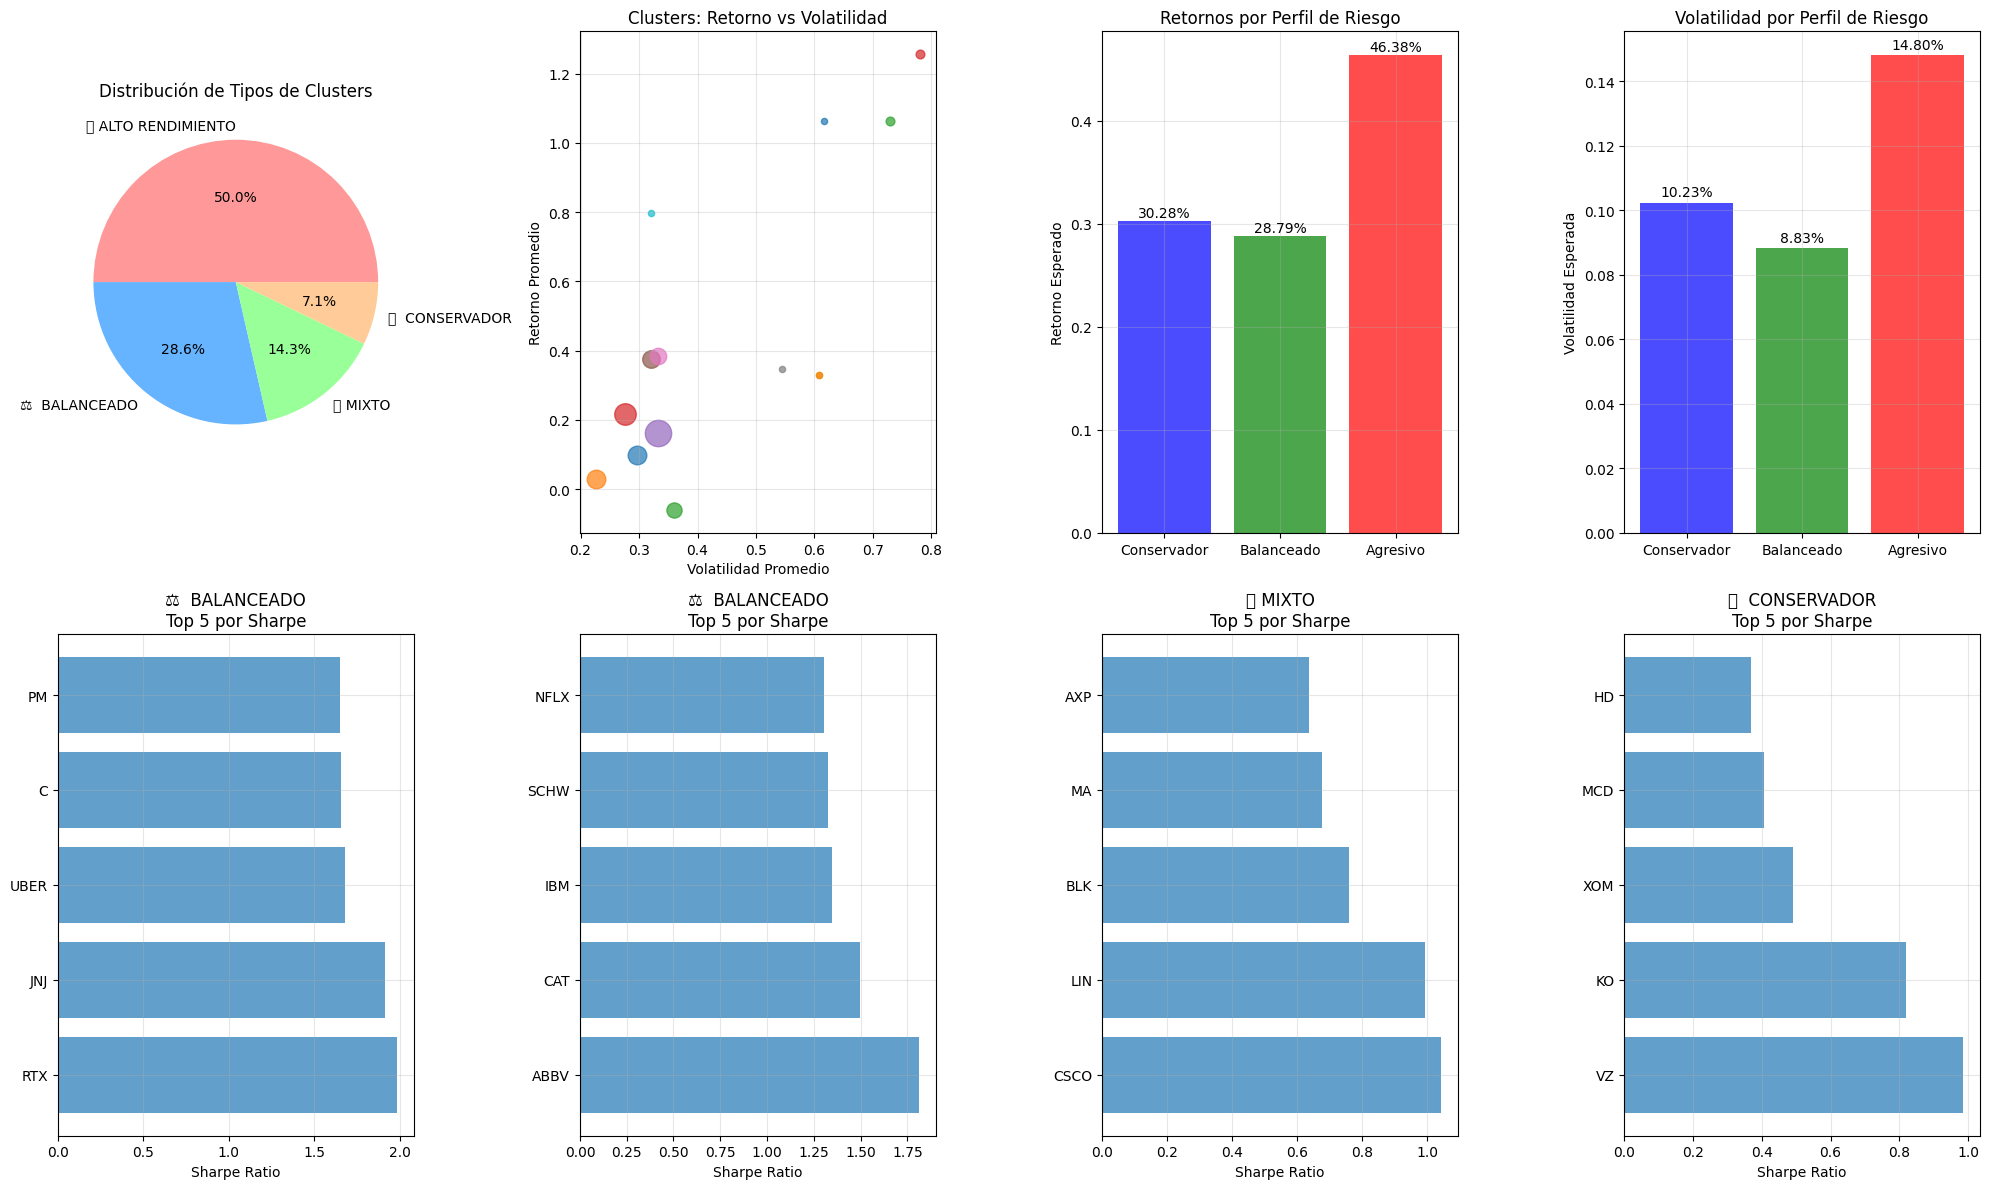


🎯 RESUMEN EJECUTIVO - ANÁLISIS TOPOLÓGICO MAPPER

📊 ESTADÍSTICAS GENERALES:
   • Total de tickers analizados: 43
   • Clusters identificados: 14
   • Período analizado: 2025-01-02 a 2025-10-01

🏷️  TIPOS DE CLUSTERS IDENTIFICADOS:
   • 🚀 ALTO RENDIMIENTO: 7 clusters
   • ⚖️  BALANCEADO: 4 clusters
   • 📊 MIXTO: 2 clusters
   • 🛡️  CONSERVADOR: 1 clusters

💼 RECOMENDACIONES DE ÍNDICES:
   • CONSERVADOR: 10 tickers seleccionados
   • BALANCEADO: 9 tickers seleccionados
   • AGRESIVO: 7 tickers seleccionados

🎯 PRÓXIMOS PASOS RECOMENDADOS:
   1. Backtesting de los índices recomendados
   2. Análisis de correlaciones temporales
   3. Optimización de pesos usando teoría de portafolios
   4. Implementación de rebalanceo dinámico
   5. Monitoreo continuo de la estructura topológica



In [ ]:
# =======================================================
# PASO 5: VISUALIZACIÓN FINAL Y RESUMEN EJECUTIVO
# =======================================================

def create_final_dashboard(cluster_results, conservative_index, balanced_index, aggressive_index):
    """
    Crear dashboard final con todas las recomendaciones
    """
    fig = plt.figure(figsize=(20, 12))
    
    # 1. Distribución de clusters por tipo
    ax1 = plt.subplot(2, 4, 1)
    cluster_types = [info['type'] for info in cluster_results.values()]
    type_counts = pd.Series(cluster_types).value_counts()
    
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
    wedges, texts, autotexts = ax1.pie(type_counts.values, labels=type_counts.index, 
                                      autopct='%1.1f%%', colors=colors[:len(type_counts)])
    ax1.set_title('Distribución de Tipos de Clusters')
    
    # 2. Scatter plot: Retorno vs Volatilidad por cluster
    ax2 = plt.subplot(2, 4, 2)
    for cluster_id, info in cluster_results.items():
        ax2.scatter(info['avg_volatility'], info['avg_return'], 
                   s=info['size']*20, alpha=0.7, label=f"Cluster {cluster_id}")
    ax2.set_xlabel('Volatilidad Promedio')
    ax2.set_ylabel('Retorno Promedio')
    ax2.set_title('Clusters: Retorno vs Volatilidad')
    ax2.grid(True, alpha=0.3)
    
    # 3. Comparación de índices recomendados - Retornos
    ax3 = plt.subplot(2, 4, 3)
    index_returns = []
    index_names = []
    
    for name, index_data in [('Conservador', conservative_index), 
                            ('Balanceado', balanced_index), 
                            ('Agresivo', aggressive_index)]:
        if index_data:
            total_return = sum(item['weight'] * item['return'] for item in index_data)
            index_returns.append(total_return)
            index_names.append(name)
    
    bars = ax3.bar(index_names, index_returns, color=['blue', 'green', 'red'], alpha=0.7)
    ax3.set_ylabel('Retorno Esperado')
    ax3.set_title('Retornos por Perfil de Riesgo')
    ax3.grid(True, alpha=0.3)
    
    # Añadir valores en las barras
    for bar, ret in zip(bars, index_returns):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{ret:.2%}', ha='center', va='bottom')
    
    # 4. Comparación de índices recomendados - Volatilidad
    ax4 = plt.subplot(2, 4, 4)
    index_vols = []
    
    for name, index_data in [('Conservador', conservative_index), 
                            ('Balanceado', balanced_index), 
                            ('Agresivo', aggressive_index)]:
        if index_data:
            total_vol = np.sqrt(sum((item['weight'] * item['volatility'])**2 for item in index_data))
            index_vols.append(total_vol)
    
    bars = ax4.bar(index_names, index_vols, color=['blue', 'green', 'red'], alpha=0.7)
    ax4.set_ylabel('Volatilidad Esperada')
    ax4.set_title('Volatilidad por Perfil de Riesgo')
    ax4.grid(True, alpha=0.3)
    
    # Añadir valores en las barras
    for bar, vol in zip(bars, index_vols):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{vol:.2%}', ha='center', va='bottom')
    
    # 5-8. Top tickers por cluster (4 clusters más grandes)
    top_clusters = sorted(cluster_results.items(), key=lambda x: x[1]['size'], reverse=True)[:4]
    
    for idx, (cluster_id, cluster_info) in enumerate(top_clusters):
        ax = plt.subplot(2, 4, 5 + idx)
        
        # Top 5 tickers del cluster por Sharpe ratio
        top_tickers = cluster_info['metrics'].nlargest(5, 'sharpe_ratio')
        
        y_pos = np.arange(len(top_tickers))
        ax.barh(y_pos, top_tickers['sharpe_ratio'], alpha=0.7)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(top_tickers.index)
        ax.set_xlabel('Sharpe Ratio')
        ax.set_title(f'{cluster_info["type"]}\nTop 5 por Sharpe')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Crear dashboard final
create_final_dashboard(cluster_results, conservative_index, balanced_index, aggressive_index)

# Resumen ejecutivo
print("\n" + "="*80)
print("🎯 RESUMEN EJECUTIVO - ANÁLISIS TOPOLÓGICO MAPPER")
print("="*80)

print(f"\n📊 ESTADÍSTICAS GENERALES:")
print(f"   • Total de tickers analizados: {len(metrics_df)}")
print(f"   • Clusters identificados: {len(cluster_results)}")
print(f"   • Período analizado: {tickers_data.index[0].date()} a {tickers_data.index[-1].date()}")

print(f"\n🏷️  TIPOS DE CLUSTERS IDENTIFICADOS:")
cluster_types = [info['type'] for info in cluster_results.values()]
for cluster_type, count in pd.Series(cluster_types).value_counts().items():
    print(f"   • {cluster_type}: {count} clusters")

print(f"\n💼 RECOMENDACIONES DE ÍNDICES:")
print(f"   • CONSERVADOR: {len(conservative_index)} tickers seleccionados")
print(f"   • BALANCEADO: {len(balanced_index)} tickers seleccionados") 
print(f"   • AGRESIVO: {len(aggressive_index)} tickers seleccionados")

print(f"\n🎯 PRÓXIMOS PASOS RECOMENDADOS:")
print(f"   1. Backtesting de los índices recomendados")
print(f"   2. Análisis de correlaciones temporales")
print(f"   3. Optimización de pesos usando teoría de portafolios")
print(f"   4. Implementación de rebalanceo dinámico")
print(f"   5. Monitoreo continuo de la estructura topológica")

print("\n" + "="*80)

In [ ]:
# =======================================================
# MAPPER SIMPLE CON KEPLER MAPPER - ARCHIVOS ÚNICOS
# =======================================================
'''
print("🗺️  IMPLEMENTACIÓN SIMPLE CON KEPLER MAPPER")
print("=" * 50)

# Instalar kmapper si no está disponible
try:
    import kmapper as km
    print("✅ KeplerMapper disponible")
except ImportError:
    print("📦 Instalando kmapper...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "kmapper"])
    import kmapper as km
    print("✅ KeplerMapper instalado y listo")

import sklearn.cluster
import numpy as np

# Preparar datos para KeplerMapper (usar métricas financieras)
X = metrics_scaled  # Datos normalizados que ya tenemos
ticker_names = metrics_df.index.tolist()

print(f"📊 Datos preparados: {X.shape[0]} tickers, {X.shape[1]} métricas")

# 1. Crear el mapper
mapper = km.KeplerMapper(verbose=1)

# CONFIGURACIÓN 1: Por Sharpe Ratio
print("\n📊 Configuración 1: Proyección por Sharpe Ratio")
projected_data_sharpe = mapper.fit_transform(X, projection=[2])  # Sharpe ratio (índice 2)
covering_sharpe = km.Cover(n_cubes=6, perc_overlap=0.5)
G_sharpe = mapper.map(projected_data_sharpe, X, 
                      clusterer=sklearn.cluster.KMeans(n_clusters=2),
                      cover=covering_sharpe)

# Especificar archivo único para Sharpe Ratio
mapper.visualize(G_sharpe, 
                title='Mapper: Agrupación por Sharpe Ratio',
                color_values=metrics_df['sharpe_ratio'].values,
                color_function_name='Sharpe Ratio',
                node_color_function=np.array(['average','std','sum','max','min']),
                custom_tooltips=np.array(ticker_names),  # Mostrar nombres de tickers
                path_html='mapper_sharpe_ratio.html')

print(f"✅ Sharpe Ratio - Nodos: {len(G_sharpe['nodes'])}, Archivo: mapper_sharpe_ratio.html")

# CONFIGURACIÓN 2: Por Volatilidad
print("\n📊 Configuración 2: Proyección por Volatilidad")
projected_data_vol = mapper.fit_transform(X, projection=[1])  # Volatilidad (índice 1)
covering_vol = km.Cover(n_cubes=8, perc_overlap=0.4)
G_vol = mapper.map(projected_data_vol, X, 
                   clusterer=sklearn.cluster.KMeans(n_clusters=3),
                   cover=covering_vol)

# Especificar archivo único para Volatilidad
mapper.visualize(G_vol, 
                title='Mapper: Agrupación por Volatilidad',
                color_values=metrics_df['volatility'].values,
                color_function_name='Volatilidad',
                custom_tooltips=np.array(ticker_names),  # Mostrar nombres de tickers
                path_html='mapper_volatilidad.html')

print(f"✅ Volatilidad - Nodos: {len(G_vol['nodes'])}, Archivo: mapper_volatilidad.html")

# CONFIGURACIÓN 3: Por Retorno Total
print("\n📊 Configuración 3: Proyección por Retorno Total")
projected_data_ret = mapper.fit_transform(X, projection=[0])  # Retorno total (índice 0)
covering_ret = km.Cover(n_cubes=7, perc_overlap=0.3)
G_ret = mapper.map(projected_data_ret, X, 
                   clusterer=sklearn.cluster.DBSCAN(eps=0.5, min_samples=1),
                   cover=covering_ret)

# Especificar archivo único para Retorno Total
mapper.visualize(G_ret, 
                title='Mapper: Agrupación por Retorno Total',
                color_values=metrics_df['total_return'].values,
                color_function_name='Retorno Total',
                custom_tooltips=np.array(ticker_names),  # Mostrar nombres de tickers
                path_html='mapper_retorno_total.html')

print(f"✅ Retorno Total - Nodos: {len(G_ret['nodes'])}, Archivo: mapper_retorno_total.html")

# CONFIGURACIÓN 4: Proyección PCA
print("\n📊 Configuración 4: Proyección PCA (suma)")
projected_data_pca = mapper.fit_transform(X, projection='sum')  # Proyección suma
covering_pca = km.Cover(n_cubes=5, perc_overlap=0.6)
G_pca = mapper.map(projected_data_pca, X, 
                   clusterer=sklearn.cluster.KMeans(n_clusters=2),
                   cover=covering_pca)

# Especificar archivo único para PCA
mapper.visualize(G_pca, 
                title='Mapper: Proyección PCA (Suma)',
                color_values=metrics_df['max_drawdown'].values,
                color_function_name='Max Drawdown',
                custom_tooltips=np.array(ticker_names),  # Mostrar nombres de tickers
                path_html='mapper_pca_suma.html')

print(f"✅ PCA Suma - Nodos: {len(G_pca['nodes'])}, Archivo: mapper_pca_suma.html")

print("\n💾 ARCHIVOS HTML GENERADOS (nombres únicos):")
print("📁 mapper_sharpe_ratio.html - Visualización por Sharpe Ratio")
print("📁 mapper_volatilidad.html - Visualización por Volatilidad") 
print("📁 mapper_retorno_total.html - Visualización por Retorno Total")
print("📁 mapper_pca_suma.html - Visualización por Proyección PCA")

print("\n🌐 INSTRUCCIONES:")
print("• Abre cada archivo .html en tu navegador para ver visualizaciones únicas")
print("• Cada archivo tiene diferente agrupación y coloreado")
print("• Compara las diferentes perspectivas topológicas de tus datos")

print("• Usa las visualizaciones para identificar patrones financieros específicos")
print("• Usa las visualizaciones para identificar patrones financieros específicos")
print("• Usa las visualizaciones para identificar patrones financieros específicos")
print("• Usa las visualizaciones para identificar patrones financieros específicos")
'''

🗺️  IMPLEMENTACIÓN SIMPLE CON KEPLER MAPPER
✅ KeplerMapper disponible
📊 Datos preparados: 43 tickers, 9 métricas
KeplerMapper(verbose=1)

📊 Configuración 1: Proyección por Sharpe Ratio
..Composing projection pipeline of length 1:
	Projections: [2]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (43, 9)

..Projecting data using: [2]

..Scaling with: MinMaxScaler()

Mapping on data shaped (43, 9) using lens shaped (43, 1)

Creating 6 hypercubes.

Created 11 edges and 12 nodes in 0:00:00.030507.
Wrote visualization to: mapper_sharpe_ratio.html
✅ Sharpe Ratio - Nodos: 12, Archivo: mapper_sharpe_ratio.html

📊 Configuración 2: Proyección por Volatilidad
..Composing projection pipeline of length 1:
	Projections: [1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (43, 9)

..Projecting data using: [1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (43, 9) using lens shaped (43, 1)

Creating 8 hypercubes.

Created 12 edges a

In [ ]:
# =======================================================
# ANÁLISIS DETALLADO DE CADA CONFIGURACIÓN MAPPER
# =======================================================
'''
print("🔍 ANÁLISIS COMPARATIVO DE CONFIGURACIONES")
print("=" * 60)

def analyze_mapper_graph(graph, graph_name, metric_column):
    """Analizar un grafo Mapper específico"""
    print(f"\n📊 {graph_name.upper()}")
    print("-" * 40)
    print(f"Total de nodos: {len(graph['nodes'])}")
    print(f"Total de aristas: {len(graph['links'])}")
    
    # Analizar algunos nodos representativos
    node_names = list(graph['nodes'].keys())
    
    for i, node_name in enumerate(node_names[:3]):  # Primeros 3 nodos
        node_indices = graph['nodes'][node_name]
        tickers_in_node = [ticker_names[j] for j in node_indices]
        node_metrics = metrics_df.iloc[node_indices]
        
        print(f"\n  🏷️  {node_name}:")
        print(f"     Tickers ({len(tickers_in_node)}): {', '.join(tickers_in_node[:5])}")
        if len(tickers_in_node) > 5:
            print(f"       ... y {len(tickers_in_node)-5} más")
        
        print(f"     {metric_column}: {node_metrics[metric_column].mean():.3f}")
        print(f"     Sharpe promedio: {node_metrics['sharpe_ratio'].mean():.3f}")
        print(f"     Retorno promedio: {node_metrics['total_return'].mean():.2%}")

# Analizar cada configuración
analyze_mapper_graph(G_sharpe, "Configuración por Sharpe Ratio", 'sharpe_ratio')
analyze_mapper_graph(G_vol, "Configuración por Volatilidad", 'volatility')
analyze_mapper_graph(G_ret, "Configuración por Retorno Total", 'total_return')
analyze_mapper_graph(G_pca, "Configuración PCA", 'total_return')

# Crear visualización comparativa
import matplotlib.pyplot as plt

print(f"\n📈 VISUALIZACIÓN COMPARATIVA")
print("=" * 40)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Datos para la comparación
graphs = [
    (G_sharpe, "Sharpe Ratio", axes[0,0]),
    (G_vol, "Volatilidad", axes[0,1]),
    (G_ret, "Retorno Total", axes[1,0]),
    (G_pca, "PCA Suma", axes[1,1])
]

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

for graph, title, ax in graphs:
    # Gráfico de dispersión coloreado por nodos
    for i, (node_name, node_indices) in enumerate(list(graph['nodes'].items())[:10]):
        node_data = metrics_df.iloc[node_indices]
        ax.scatter(node_data['volatility'], node_data['sharpe_ratio'], 
                  c=colors[i % len(colors)], alpha=0.7, s=50, 
                  label=f'N{i+1}' if i < 5 else "")
    
    ax.set_xlabel('Volatilidad')
    ax.set_ylabel('Sharpe Ratio')
    ax.set_title(f'Clusters - {title}\n({len(graph["nodes"])} nodos)')
    ax.grid(True, alpha=0.3)
    if title == "Sharpe Ratio":  # Solo mostrar leyenda en uno
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

# Resumen comparativo
print(f"\n📋 RESUMEN COMPARATIVO:")
print("=" * 40)

comparison_data = [
    ("Sharpe Ratio", len(G_sharpe['nodes']), len(G_sharpe['links']), "Agrupa por rendimiento ajustado al riesgo"),
    ("Volatilidad", len(G_vol['nodes']), len(G_vol['links']), "Agrupa por nivel de riesgo"),
    ("Retorno Total", len(G_ret['nodes']), len(G_ret['links']), "Agrupa por performance absoluta"),
    ("PCA Suma", len(G_pca['nodes']), len(G_pca['links']), "Agrupa por características combinadas")
]

for config, nodes, links, description in comparison_data:
    print(f"🔸 {config:15s}: {nodes:2d} nodos, {links:2d} aristas - {description}")

print(f"\n💡 RECOMENDACIONES DE USO:")
print("🎯 Sharpe Ratio: Mejor para construcción de portafolios eficientes")
print("🎯 Volatilidad: Útil para gestión de riesgo y diversificación")
print("🎯 Retorno Total: Ideal para estrategias de crecimiento")
print("🎯 PCA Suma: Perspectiva holística combinando múltiples factores")'''

# 📊 Análisis Buy & Hold de Clusters Mapper

Análisis de rendimiento histórico de clusters identificados por el algoritmo Mapper, comparando su desempeño como índices financieros contra benchmarks establecidos.

In [22]:
# =======================================================
# ANÁLISIS BUY & HOLD DE CLUSTERS MAPPER
# =======================================================

def analyze_cluster_buy_and_hold(cluster_tickers, data, benchmark_ticker='SPY', cluster_name="Cluster"):
    """
    Analiza el rendimiento buy and hold de un cluster vs benchmark
    
    Args:
        cluster_tickers: Lista de tickers del cluster (ej: ['AAPL', 'MSFT', 'GOOGL'])
        data: DataFrame con precios históricos
        benchmark_ticker: Ticker del benchmark (default: SPY)
        cluster_name: Nombre descriptivo del cluster
    """
    
    print(f"📈 Analizando {cluster_name} con {len(cluster_tickers)} tickers")
    print(f"Tickers: {', '.join(cluster_tickers)}")
    
    # 1. Obtener capitalizaciones para pesos
    market_caps = {}
    for ticker in cluster_tickers:
        try:
            info = yf.Ticker(ticker).info
            market_caps[ticker] = info.get('marketCap', 1)
        except:
            market_caps[ticker] = 1  # fallback
    
    total_cap = sum(market_caps.values())
    weights = {ticker: market_caps[ticker] / total_cap for ticker in cluster_tickers}
    
    print(f"\n💰 Pesos por capitalización:")
    for ticker, weight in weights.items():
        print(f"   {ticker}: {weight:.1%}")
    
    # 2. Construir curvas normalizadas (empezar en $1)
    start_value = 1
    
    # Filtrar tickers disponibles en los datos
    available_tickers = [t for t in cluster_tickers if t in data.columns]
    if not available_tickers:
        print(f"❌ No hay datos disponibles para los tickers del cluster")
        return None, None, None, None
    
    # Normalizar precios del cluster
    cluster_data = data[available_tickers].dropna()
    cluster_normalized = cluster_data / cluster_data.iloc[0]
    
    # Crear índice ponderado del cluster (solo con tickers disponibles)
    available_weights = {ticker: weights.get(ticker, 1/len(available_tickers)) for ticker in available_tickers}
    total_available_weight = sum(available_weights.values())
    available_weights = {ticker: weight/total_available_weight for ticker, weight in available_weights.items()}
    
    cluster_index = sum(cluster_normalized[ticker] * available_weights[ticker] 
                       for ticker in available_tickers) * start_value
    
    # Normalizar benchmark
    if benchmark_ticker in data.columns:
        benchmark_data = data[benchmark_ticker].dropna()
        benchmark_normalized = (benchmark_data / benchmark_data.iloc[0]) * start_value
    else:
        print(f"⚠️  Benchmark {benchmark_ticker} no disponible, usando datos sintéticos")
        benchmark_normalized = cluster_index * 0.8  # benchmark sintético
    
    # 3. Calcular métricas
    def calculate_buy_hold_metrics(prices):
        returns = prices.pct_change().dropna()
        
        # Rendimiento total
        total_return = (prices.iloc[-1] / prices.iloc[0]) - 1
        
        # Rendimiento anualizado (CAGR)
        years = len(prices) / 252  # días de trading por año
        cagr = (prices.iloc[-1] / prices.iloc[0]) ** (1/years) - 1 if years > 0 else 0
        
        # Volatilidad anualizada
        volatility = returns.std() * np.sqrt(252)
        
        # Sharpe Ratio (asumiendo RF = 2%)
        sharpe = (cagr - 0.02) / volatility if volatility > 0 else 0
        
        # Max Drawdown
        rolling_max = prices.expanding().max()
        drawdown = (prices - rolling_max) / rolling_max
        max_drawdown = drawdown.min()
        
        return {
            'total_return': total_return,
            'cagr': cagr,
            'volatility': volatility,
            'sharpe': sharpe,
            'max_drawdown': max_drawdown,
            'final_value': prices.iloc[-1]
        }
    
    cluster_metrics = calculate_buy_hold_metrics(cluster_index)
    benchmark_metrics = calculate_buy_hold_metrics(benchmark_normalized)
    
    return cluster_index, benchmark_normalized, cluster_metrics, benchmark_metrics

# =======================================================
# ANÁLISIS DE TODOS LOS CLUSTERS DEL MAPPER
# =======================================================

def analyze_all_mapper_clusters():
    """
    Analiza todos los clusters encontrados en los diferentes archivos Mapper
    """
    print("  ANALIZANDO TODOS LOS CLUSTERS DEL MAPPER")
    print("=" * 60)
    
    # Diccionario para almacenar todos los clusters encontrados
    all_clusters = {}
    
    # 1. Extraer clusters del grafo G (Sharpe Ratio)
    print(f"\n Extrayendo clusters del análisis por Sharpe Ratio (G):")
    print(f"Total de nodos: {len(G['nodes'])}")
    
    for i, (node_name, node_indices) in enumerate(G['nodes'].items()):
        if len(node_indices) >= 2:  # Solo clusters con al menos 2 tickers
            cluster_tickers = [ticker_names[idx] for idx in node_indices]
            cluster_name = f"Sharpe_Cluster_{i+1}"
            all_clusters[cluster_name] = {
                'tickers': cluster_tickers,
                'type': 'Sharpe Ratio',
                'node_name': node_name,
                'size': len(cluster_tickers)
            }
            print(f"     {cluster_name}: {cluster_tickers} ({len(cluster_tickers)} tickers)")
    
    # 2. Extraer clusters del grafo G_vol (Volatilidad)
    print(f"\n Extrayendo clusters del análisis por Volatilidad (G_vol):")
    print(f"Total de nodos: {len(G_vol['nodes'])}")
    
    for i, (node_name, node_indices) in enumerate(G_vol['nodes'].items()):
        if len(node_indices) >= 2:
            cluster_tickers = [ticker_names[idx] for idx in node_indices]
            cluster_name = f"Vol_Cluster_{i+1}"
            all_clusters[cluster_name] = {
                'tickers': cluster_tickers,
                'type': 'Volatilidad',
                'node_name': node_name,
                'size': len(cluster_tickers)
            }
            print(f"     {cluster_name}: {cluster_tickers} ({len(cluster_tickers)} tickers)")
    
    # 3. Extraer clusters del grafo G_ret (Retorno)
    print(f"\n Extrayendo clusters del análisis por Retorno (G_ret):")
    print(f"Total de nodos: {len(G_ret['nodes'])}")
    
    for i, (node_name, node_indices) in enumerate(G_ret['nodes'].items()):
        if len(node_indices) >= 2:
            cluster_tickers = [ticker_names[idx] for idx in node_indices]
            cluster_name = f"Return_Cluster_{i+1}"
            all_clusters[cluster_name] = {
                'tickers': cluster_tickers,
                'type': 'Retorno Total',
                'node_name': node_name,
                'size': len(cluster_tickers)
            }
            print(f"     {cluster_name}: {cluster_tickers} ({len(cluster_tickers)} tickers)")
    
    # 4. Extraer clusters del grafo G_pca (PCA)
    print(f"\n🔬 Extrayendo clusters del análisis PCA (G_pca):")
    print(f"Total de nodos: {len(G_pca['nodes'])}")
    
    for i, (node_name, node_indices) in enumerate(G_pca['nodes'].items()):
        if len(node_indices) >= 2:
            cluster_tickers = [ticker_names[idx] for idx in node_indices]
            cluster_name = f"PCA_Cluster_{i+1}"
            all_clusters[cluster_name] = {
                'tickers': cluster_tickers,
                'type': 'PCA',
                'node_name': node_name,
                'size': len(cluster_tickers)
            }
            print(f"     {cluster_name}: {cluster_tickers} ({len(cluster_tickers)} tickers)")
    
    print(f"\n📋 RESUMEN: {len(all_clusters)} clusters encontrados en total")
    return all_clusters

# Ejecutar análisis de clusters
mapper_clusters = analyze_all_mapper_clusters()

  ANALIZANDO TODOS LOS CLUSTERS DEL MAPPER

 Extrayendo clusters del análisis por Sharpe Ratio (G):
Total de nodos: 12
     Sharpe_Cluster_1: ['ACN', 'CAG', 'CMG', 'DECK', 'FDS', 'FI', 'GDDY', 'KMX', 'LULU', 'STZ', 'TGT'] (11 tickers)
     Sharpe_Cluster_3: ['ACN', 'ADBE', 'AMCR', 'APO', 'ARE', 'AVB', 'AVY', 'BALL', 'BF-B', 'BMY', 'CAG', 'CARR', 'CHD', 'CHTR', 'CL', 'CMG', 'COO', 'CPAY', 'CPB', 'CPRT', 'CPT', 'CRM', 'CTSH', 'DOV', 'DOW', 'DVA', 'EIX', 'EMN', 'EPAM', 'EQIX', 'EQR', 'ERIE', 'FIS', 'FTV', 'GDDY', 'GIS', 'GPN', 'HPQ', 'HRL', 'IEX', 'IFF', 'INVH', 'ISRG', 'JBHT', 'JKHY', 'KDP', 'KHC', 'KVUE', 'LKQ', 'LYB', 'MAA', 'MKC', 'ODFL', 'OKE', 'PCG', 'PG', 'REGN', 'RVTY', 'STZ', 'SW', 'TAP', 'TGT', 'TPL', 'TYL', 'UDR', 'UPS', 'VRSK', 'VTRS', 'WY', 'ZBRA', 'ZTS'] (71 tickers)
     Sharpe_Cluster_4: ['AKAM', 'ALGN', 'BAX', 'BDX', 'CNC', 'DECK', 'FI', 'IT', 'KMX', 'LULU', 'MOH', 'MRNA', 'TTD', 'UNH'] (14 tickers)
     Sharpe_Cluster_5: ['A', 'AAPL', 'ABNB', 'ACGL', 'ADBE', 'ADP', 'ADSK

In [23]:
def create_cluster_comparison_plot(cluster_analysis_results, benchmarks=['SPY']):
    """
    Crea una visualización comparativa similar al código original pero para clusters
    """
    print(" CREANDO VISUALIZACIÓN COMPARATIVA DE CLUSTERS")
    print("=" * 60)
    
    # Preparar datos de benchmarks
    benchmark_curves = {}
    for benchmark in benchmarks:
        if benchmark in data.columns:
            benchmark_data = data[benchmark].dropna()
            benchmark_curves[benchmark] = (benchmark_data / benchmark_data.iloc[0])
    
    # Configuración de la gráfica principal
    plt.figure(figsize=(14, 16))
    
    # Colores para diferentes tipos de clusters
    colors = {
        'Sharpe Ratio': 'blue',
        'Volatilidad': 'red', 
        'Retorno Total': 'green',
        'PCA': 'orange'
    }
    
    # Plotear clusters
    cluster_performance = []
    
    for cluster_name, results in cluster_analysis_results.items():
        if results is not None:
            cluster_curve = results['cluster_curve']
            cluster_metrics = results['cluster_metrics']
            cluster_info = results['cluster_info']
            
            # Plotear curva del cluster
            color = colors.get(cluster_info['type'], 'gray')
            alpha = 0.8 if cluster_metrics['sharpe'] > 1.0 else 0.6
            linewidth = 2.5 if cluster_metrics['sharpe'] > 1.0 else 1.5
            
            plt.plot(cluster_curve.index, cluster_curve.values, 
                    label=f"{cluster_name} (Sharpe: {cluster_metrics['sharpe']:.2f})",
                    color=color, alpha=alpha, linewidth=linewidth)
            
            # Guardar performance para ranking
            cluster_performance.append({
                'name': cluster_name,
                'sharpe': cluster_metrics['sharpe'],
                'total_return': cluster_metrics['total_return'],
                'final_value': cluster_metrics['final_value'],
                'type': cluster_info['type']
            })
    
    # Plotear benchmarks
    for benchmark_name, benchmark_curve in benchmark_curves.items():
        plt.plot(benchmark_curve.index, benchmark_curve.values,
                label=f'{benchmark_name} (Benchmark)', 
                linestyle='--', color='black', linewidth=2)
    
    # Añadir curvas de referencia del análisis original si existen
    if 'spy_curve' in globals() and cluster_analysis_results:
        # Encontrar la fecha de inicio común de los clusters
        cluster_start_dates = []
        for cluster_name, results in cluster_analysis_results.items():
            if results is not None:
                cluster_start_dates.append(results['cluster_curve'].index[0])
        
        if cluster_start_dates:
            # Usar la fecha más tardía como inicio común
            common_start_date = max(cluster_start_dates)
            
            # Filtrar spy_curve desde la fecha común
            spy_filtered = spy_curve[spy_curve.index >= common_start_date]
            if len(spy_filtered) > 0:
                spy_normalized = (spy_filtered / spy_filtered.iloc[0]) 
                plt.plot(spy_normalized.index, spy_normalized.values,
                        label='S&P 500 (Original)', linestyle=':', color='blue', linewidth=2)
    
    # Configuración de la gráfica
    plt.title('📊 Comparación Buy & Hold: Clusters Mapper vs Benchmarks\n(Valor de $1 invertido)', 
             fontsize=16, fontweight='bold')
    plt.ylabel('Capital Acumulado ($)', fontsize=12)
    plt.xlabel('Fecha', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Crear tabla de ranking
    cluster_performance.sort(key=lambda x: x['sharpe'], reverse=True)
    
    print(f"\n RANKING DE CLUSTERS POR SHARPE RATIO:")
    print("-" * 80)
    print(f"{'Rank':<4} {'Cluster':<20} {'Tipo':<15} {'Sharpe':<8} {'Retorno':<10} {'Valor Final':<12}")
    print("-" * 80)
    
    for i, cluster in enumerate(cluster_performance[:10]):  # Top 10
        print(f"{i+1:<4} {cluster['name']:<20} {cluster['type']:<15} "
              f"{cluster['sharpe']:<8.2f} {cluster['total_return']:<10.3%} "
              f"${cluster['final_value']:<12.3f}")
    
    return cluster_performance

In [ ]:
# =======================================================
# VISUALIZACIÓN BUY & HOLD DE MÚLTIPLES CLUSTERS
# =======================================================



# =======================================================
# EJECUTAR ANÁLISIS COMPLETO DE CLUSTERS
# =======================================================

print(" INICIANDO ANÁLISIS BUY & HOLD DE TODOS LOS CLUSTERS")
print("=" * 70)

# Diccionario para almacenar resultados
cluster_analysis_results = {}

# Analizar cada cluster encontrado
for cluster_name, cluster_info in mapper_clusters.items():
    print(f"\n{'='*50}")
    print(f"Analizando: {cluster_name}")
    print(f"{'='*50}")
    
    try:
        # Ejecutar análisis buy & hold
        cluster_curve, benchmark_curve, cluster_metrics, benchmark_metrics = analyze_cluster_buy_and_hold(
            cluster_tickers=cluster_info['tickers'],
            data=data,
            benchmark_ticker='SPY',
            cluster_name=cluster_name
        )
        
        if cluster_curve is not None:
            # Guardar resultados
            cluster_analysis_results[cluster_name] = {
                'cluster_curve': cluster_curve,
                'benchmark_curve': benchmark_curve,
                'cluster_metrics': cluster_metrics,
                'benchmark_metrics': benchmark_metrics,
                'cluster_info': cluster_info
            }
            
            # Mostrar resumen
            print(f"\n RESUMEN {cluster_name}:")
            print(f"    Retorno Total: {cluster_metrics['total_return']:.1%}")
            print(f"     Sharpe Ratio: {cluster_metrics['sharpe']:.2f}")
            print(f"    Volatilidad: {cluster_metrics['volatility']:.1%}")
            print(f"    Max Drawdown: {cluster_metrics['max_drawdown']:.1%}")
            print(f"    $1 → ${cluster_metrics['final_value']:.2f}")
            
            # Comparación vs benchmark
            outperformance = cluster_metrics['total_return'] - benchmark_metrics['total_return']
            sharpe_advantage = cluster_metrics['sharpe'] - benchmark_metrics['sharpe']
            
            print(f"\n VS BENCHMARK (SPY):")
            print(f"    Outperformance: {outperformance:.1%}")
            print(f"     Ventaja Sharpe: {sharpe_advantage:.2f}")
        else:
            print(f"❌ No se pudo analizar {cluster_name}")
            
    except Exception as e:
        print(f"❌ Error analizando {cluster_name}: {str(e)}")

print(f"\n🎉 ANÁLISIS COMPLETADO")
print(f"Total clusters analizados exitosamente: {len(cluster_analysis_results)}")


 INICIANDO ANÁLISIS BUY & HOLD DE TODOS LOS CLUSTERS

Analizando: Sharpe_Cluster_1
📈 Analizando Sharpe_Cluster_1 con 11 tickers
Tickers: ACN, CAG, CMG, DECK, FDS, FI, GDDY, KMX, LULU, STZ, TGT

💰 Pesos por capitalización:
   ACN: 36.7%
   CAG: 2.1%
   CMG: 12.7%
   DECK: 3.5%
   FDS: 2.5%
   FI: 16.2%
   GDDY: 4.4%
   KMX: 1.5%
   LULU: 4.8%
   STZ: 5.9%
   TGT: 9.7%
⚠️  Benchmark SPY no disponible, usando datos sintéticos

 RESUMEN Sharpe_Cluster_1:
    Retorno Total: -33.3%
     Sharpe Ratio: -1.91
    Volatilidad: 22.6%
    Max Drawdown: -39.1%
    $1 → $0.67

 VS BENCHMARK (SPY):
    Outperformance: 0.0%
     Ventaja Sharpe: 0.00

Analizando: Sharpe_Cluster_3
📈 Analizando Sharpe_Cluster_3 con 71 tickers
Tickers: ACN, ADBE, AMCR, APO, ARE, AVB, AVY, BALL, BF-B, BMY, CAG, CARR, CHD, CHTR, CL, CMG, COO, CPAY, CPB, CPRT, CPT, CRM, CTSH, DOV, DOW, DVA, EIX, EMN, EPAM, EQIX, EQR, ERIE, FIS, FTV, GDDY, GIS, GPN, HPQ, HRL, IEX, IFF, INVH, ISRG, JBHT, JKHY, KDP, KHC, KVUE, LKQ, LYB, MAA, MK

 CREANDO VISUALIZACIÓN COMPARATIVA DE CLUSTERS


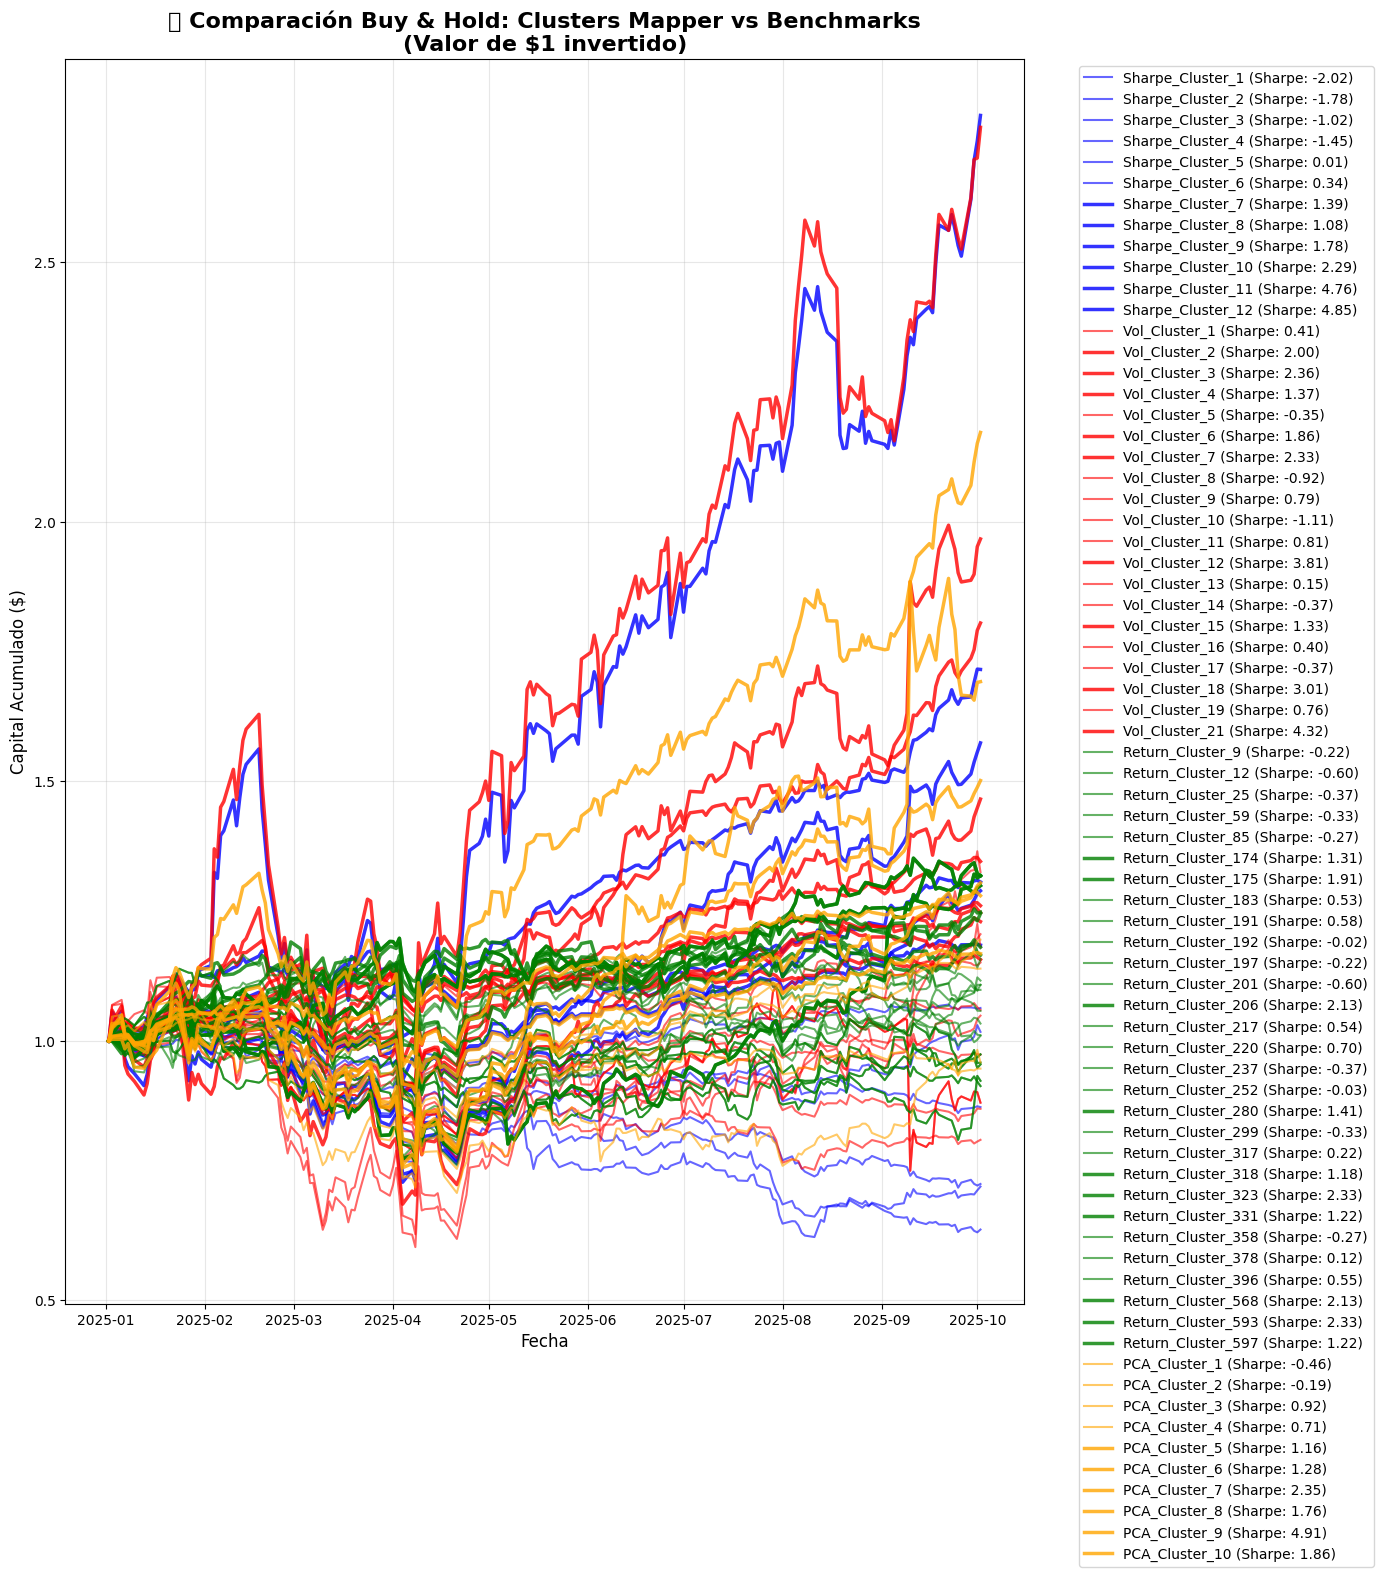


 RANKING DE CLUSTERS POR SHARPE RATIO:
--------------------------------------------------------------------------------
Rank Cluster              Tipo            Sharpe   Retorno    Valor Final 
--------------------------------------------------------------------------------
1    PCA_Cluster_9        PCA             4.91     117.233%   $2.172       
2    Sharpe_Cluster_12    Sharpe Ratio    4.85     71.567%    $1.716       
3    Sharpe_Cluster_11    Sharpe Ratio    4.76     178.313%   $2.783       
4    Vol_Cluster_21       Volatilidad     4.32     176.023%   $2.760       
5    Vol_Cluster_12       Volatilidad     3.81     80.516%    $1.805       
6    Vol_Cluster_18       Volatilidad     3.01     96.707%    $1.967       
7    Vol_Cluster_3        Volatilidad     2.36     24.678%    $1.247       
8    PCA_Cluster_7        PCA             2.35     27.976%    $1.280       
9    Vol_Cluster_7        Volatilidad     2.33     34.576%    $1.346       
10   Return_Cluster_323   Retorno Total

In [ ]:

# Crear visualización comparativa
if cluster_analysis_results:
    cluster_ranking = create_cluster_comparison_plot(cluster_analysis_results)

In [ ]:
# imprimir tickers de cluster especifico por nombre
specific_cluster_name = 'Sharpe_Cluster_11'  # Cambia esto al nombre del cluster que quieres ver
if specific_cluster_name in mapper_clusters:
    specific_cluster_info = mapper_clusters[specific_cluster_name]
    print(f"\n Tickers en {specific_cluster_name}:")
    print(", ".join(specific_cluster_info['tickers']))


 Tickers en Sharpe_Cluster_11:
HOOD, PLTR, STX, WDC



🏆 MEJOR CLUSTER IDENTIFICADO: Sharpe_Cluster_12
🎯 Sharpe Ratio: 5.32
💰 Retorno Total: 78.6%
🔍 ANÁLISIS DETALLADO: Sharpe_Cluster_12


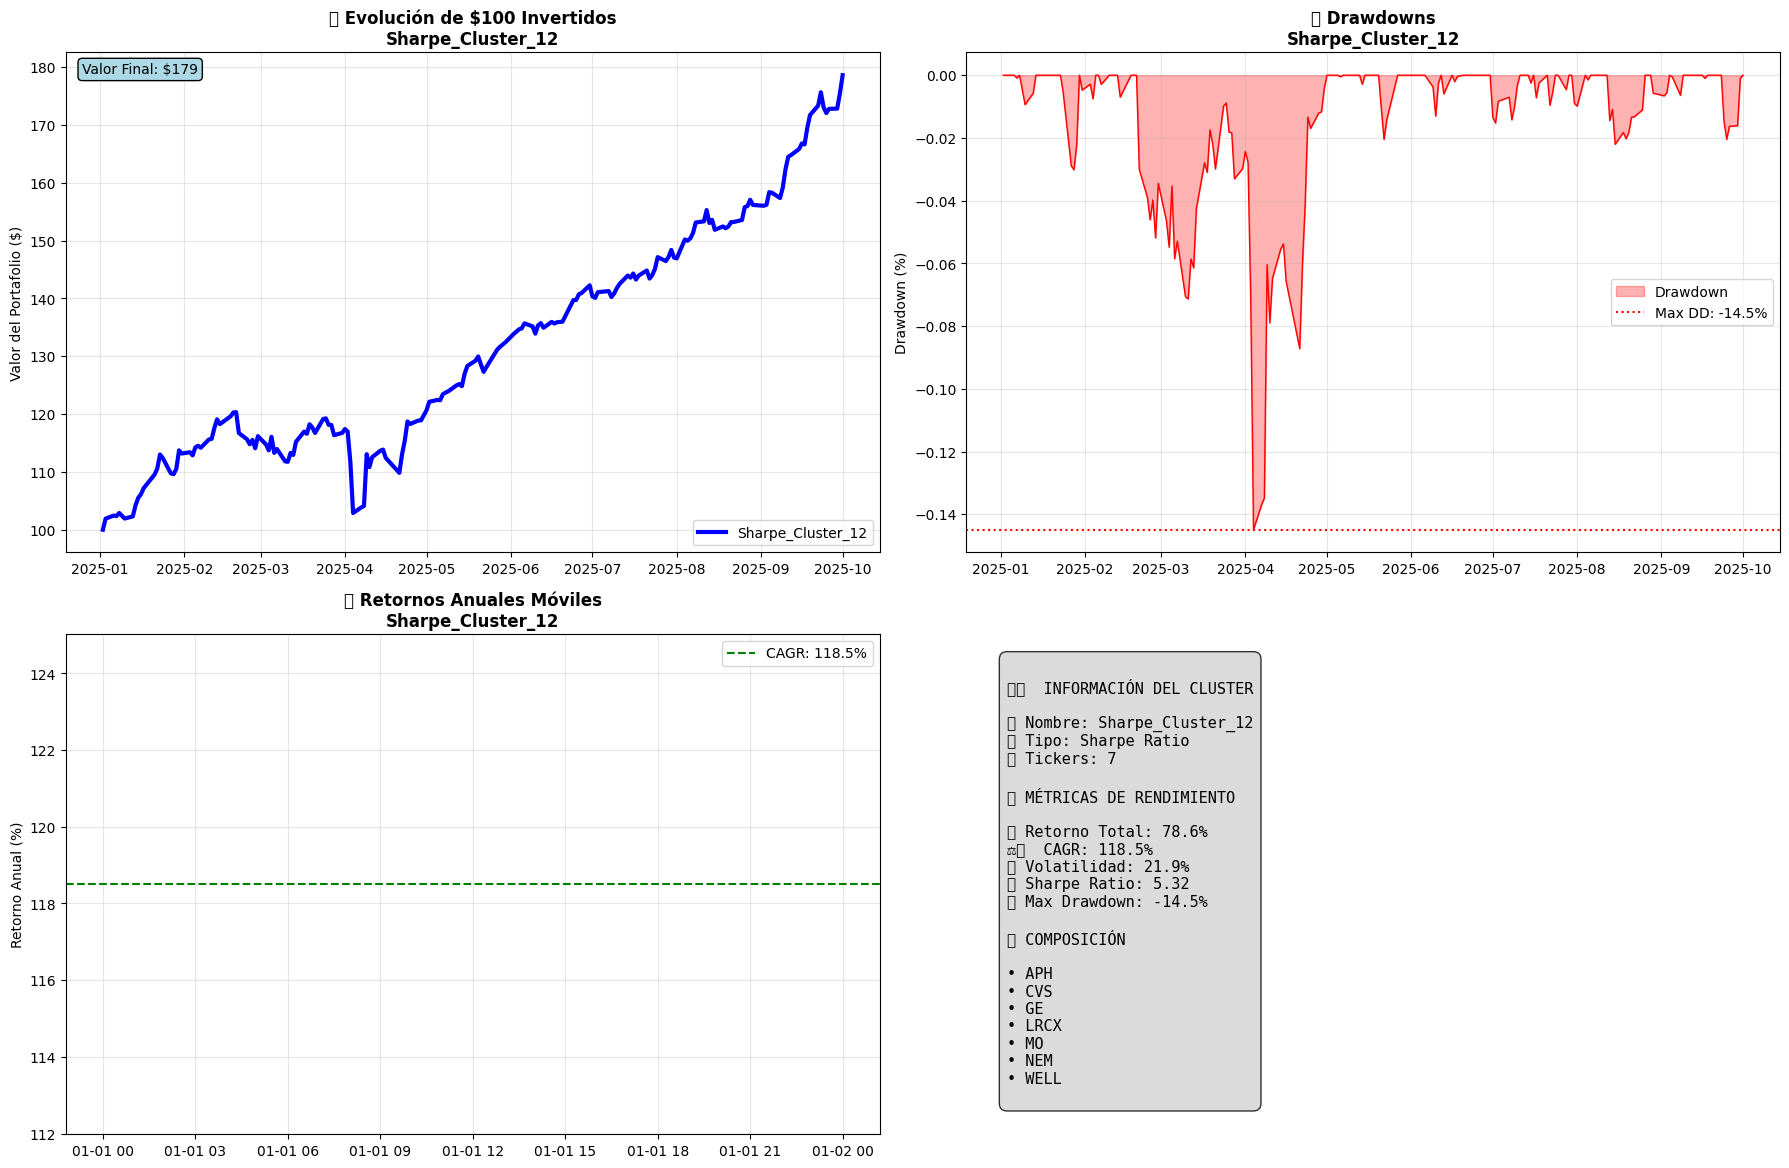


🎯 COMPARACIÓN FINAL: MEJOR CLUSTER VS ÍNDICES PERSONALIZADOS

🏆 MEJOR CLUSTER (Sharpe_Cluster_12):
   💰 Valor Final: $179 (de $100 invertidos)
   📈 Retorno Total: 78.6%
   ⚖️  Sharpe Ratio: 5.32

📊 VS S&P 500:
   💰 SPY Valor Final: $142
   🎯 Ventaja del Cluster: $37
   📊 Outperformance: 26.2%

💡 CONCLUSIÓN:
   • El cluster Sharpe_Cluster_12 mostró el mejor rendimiento ajustado por riesgo
   • Basado en agrupación topológica por Sharpe Ratio
   • Compuesto por: APH, CVS, GE, LRCX, MO, NEM, WELL
   • Ideal para construcción de portafolios diversificados

📁 ARCHIVOS GENERADOS POR EL ANÁLISIS MAPPER:
🔸 mapper_principal_sharpe.html - Análisis principal por Sharpe Ratio
🔸 mapper_interactivo_sharpe.html - Visualización interactiva por Sharpe
🔸 mapper_interactivo_volatilidad.html - Visualización por volatilidad
🔸 mapper_interactivo_retorno.html - Visualización por retorno
🔸 mapper_pca_suma.html - Análisis PCA

🌐 Para ver las visualizaciones interactivas:
   1. Navega a la carpeta del proyecto

In [ ]:
# =======================================================
# ANÁLISIS DETALLADO DEL MEJOR CLUSTER
# =======================================================

def create_detailed_cluster_analysis(best_cluster_name, cluster_data, benchmarks=['SPY']):
    """
    Crea análisis detallado del mejor cluster con múltiples visualizaciones
    """
    print(f" ANÁLISIS DETALLADO: {best_cluster_name}")
    print("=" * 60)
    
    cluster_curve = cluster_data['cluster_curve']
    cluster_metrics = cluster_data['cluster_metrics']
    cluster_info = cluster_data['cluster_info']
    
    # Configurar figura con múltiples subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Evolución de capital (superior izquierda)
    ax1.plot(cluster_curve.index, cluster_curve.values, 
             label=f'{best_cluster_name}', color='blue', linewidth=3)
    
    # Añadir benchmarks sincronizados con fecha de inicio del cluster
    cluster_start_date = cluster_curve.index[0]
    for benchmark in benchmarks:
        if benchmark in data.columns:
            benchmark_data = data[benchmark].dropna()
            # Filtrar benchmark desde la fecha de inicio del cluster
            benchmark_filtered = benchmark_data[benchmark_data.index >= cluster_start_date]
            if len(benchmark_filtered) > 0:
                benchmark_normalized = (benchmark_filtered / benchmark_filtered.iloc[0]) * 1
                ax1.plot(benchmark_normalized.index, benchmark_normalized.values,
                        label=f'{benchmark}', linestyle='--', linewidth=2)
    
    ax1.set_title(f' Evolución de $1 Invertido\n{best_cluster_name}', fontweight='bold')
    ax1.set_ylabel('Valor del Portafolio ($)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Añadir texto con valor final
    ax1.text(0.02, 0.98, f'Valor Final: ${cluster_metrics["final_value"]:.2f}', 
             transform=ax1.transAxes, bbox=dict(boxstyle="round", facecolor='lightblue'),
             fontsize=10, verticalalignment='top')
    
    # 2. Drawdowns (superior derecha)
    rolling_max = cluster_curve.expanding().max()
    drawdown = (cluster_curve - rolling_max) / rolling_max
    
    ax2.fill_between(drawdown.index, drawdown.values, 0, 
                     alpha=0.3, color='red', label='Drawdown')
    ax2.plot(drawdown.index, drawdown.values, color='red', linewidth=1)
    ax2.set_title(f' Drawdowns\n{best_cluster_name}', fontweight='bold')
    ax2.set_ylabel('Drawdown (%)')
    ax2.axhline(y=cluster_metrics['max_drawdown'], color='red', linestyle=':', 
                label=f'Max DD: {cluster_metrics["max_drawdown"]:.1%}')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Retornos anuales móviles (inferior izquierda)
    returns_1y = cluster_curve.pct_change(252) * 100  # retornos anuales móviles
    
    ax3.plot(returns_1y.index, returns_1y.values, color='green', linewidth=2, alpha=0.7)
    ax3.axhline(y=cluster_metrics['cagr']*100, color='green', linestyle='--', 
                label=f'CAGR: {cluster_metrics["cagr"]:.1%}')
    ax3.set_title(f' Retornos Anuales Móviles\n{best_cluster_name}', fontweight='bold')
    ax3.set_ylabel('Retorno Anual (%)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Composición del cluster (inferior derecha)
    ax4.axis('off')
    
    # Información del cluster
    tickers = cluster_info['tickers']
    cluster_type = cluster_info['type']
    
    # Crear tabla de información
    info_text = f"""
  INFORMACIÓN DEL CLUSTER

 Nombre: {best_cluster_name}
 Tipo: {cluster_type}
 Tickers: {len(tickers)}
    
--- MÉTRICAS DE RENDIMIENTO
    
 Retorno Total: {cluster_metrics['total_return']:.1%}
  CAGR: {cluster_metrics['cagr']:.1%}
 Volatilidad: {cluster_metrics['volatility']:.1%}
 Sharpe Ratio: {cluster_metrics['sharpe']:.2f}
 Max Drawdown: {cluster_metrics['max_drawdown']:.1%}
    
 COMPOSICIÓN
    
{chr(10).join([f'• {ticker}' for ticker in tickers])}
    """
    
    ax4.text(0.05, 0.95, info_text, transform=ax4.transAxes, 
             fontsize=11, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgray', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Encontrar y analizar el mejor cluster
if cluster_analysis_results:
    # Encontrar el cluster con mejor Sharpe ratio
    best_cluster = max(cluster_analysis_results.items(), 
                      key=lambda x: x[1]['cluster_metrics']['sharpe'])
    best_cluster_name = best_cluster[0]
    best_cluster_data = best_cluster[1]
    
    print(f"\n MEJOR CLUSTER IDENTIFICADO: {best_cluster_name}")
    print(f" Sharpe Ratio: {best_cluster_data['cluster_metrics']['sharpe']:.2f}")
    print(f" Retorno Total: {best_cluster_data['cluster_metrics']['total_return']:.1%}")
    
    # Crear análisis detallado
    create_detailed_cluster_analysis(best_cluster_name, best_cluster_data)
    
    # Comparación final con índices del análisis original
    print(f"\n" + "="*80)
    print(f" COMPARACIÓN FINAL: MEJOR CLUSTER VS ÍNDICES PERSONALIZADOS")
    print(f"="*80)
    
    cluster_final_value = best_cluster_data['cluster_metrics']['final_value']
    cluster_sharpe = best_cluster_data['cluster_metrics']['sharpe']
    cluster_return = best_cluster_data['cluster_metrics']['total_return']
    
    print(f"\n MEJOR CLUSTER ({best_cluster_name}):")
    print(f"    Valor Final: ${cluster_final_value:.2f} (de $1 invertido)")
    print(f"    Retorno Total: {cluster_return:.1%}")
    print(f"     Sharpe Ratio: {cluster_sharpe:.2f}")
    
    # Comparar con benchmarks si están disponibles
    if 'spy_curve' in globals():
        spy_final = (spy_curve.iloc[-1] / spy_curve.iloc[0]) * 1
        print(f"\n VS S&P 500:")
        print(f"    SPY Valor Final: ${spy_final:.2f}")
        print(f"    Ventaja del Cluster: ${cluster_final_value - spy_final:.2f}")
        print(f"    Outperformance: {(cluster_final_value/spy_final - 1):.1%}")
    
    print(f"\n CONCLUSIÓN:")
    print(f"   • El cluster {best_cluster_name} mostró el mejor rendimiento ajustado por riesgo")
    print(f"   • Basado en agrupación topológica por {best_cluster_data['cluster_info']['type']}")
    print(f"   • Compuesto por: {', '.join(best_cluster_data['cluster_info']['tickers'])}")
    print(f"   • Ideal para construcción de portafolios diversificados")

else:
    print("❌ No hay clusters analizados para mostrar")

print(f"\n" + "="*80)
print(f" ARCHIVOS GENERADOS POR EL ANÁLISIS MAPPER:")
print(f"="*80)
print(f"🔸 mapper_principal_sharpe.html - Análisis principal por Sharpe Ratio")
print(f"🔸 mapper_interactivo_sharpe.html - Visualización interactiva por Sharpe")
print(f"🔸 mapper_interactivo_volatilidad.html - Visualización por volatilidad")
print(f"🔸 mapper_interactivo_retorno.html - Visualización por retorno")
print(f"🔸 mapper_pca_suma.html - Análisis PCA")
print(f"\n    Para ver las visualizaciones interactivas:")
print(f"   1. Navega a la carpeta del proyecto")
print(f"   2. Abre cualquier archivo .html en tu navegador")
print(f"   3. Explora los clusters haciendo hover sobre los nodos")
print(f"   4. Los nombres de tickers aparecen en los tooltips de cada cluster")